In [1]:
from zipfile import ZipFile
from item.calculate_reference_price import (
    CalculateReferencePrice
)

from item.clustering.metrics import (
    calc_distance
)

from item.item_list import (
    ItemList,
    Item
)
import json
import ast
import io
import csv
import numpy as np



from nlp.preprocessing import (
    clean_text,
    preprocess,
    tokenize,
    preprocess_document,
    tokenize_document,
    get_stopwords, 
    lemmatization_document,
    get_canonical_words,
    spellcheck_document)

from item.item_list import (
    ItemList,
    Item
)

from item.clustering.item_representation import (
    get_words_plus_categories_embeddings,
    get_group_embeddings_matrix
)


from nlp.word_embeddings import (
    load_word_embeddings
)

from nlp.pos_tagging import (
    get_tokens_tags
)

from nlp.utils import read_json_file

import pickle
import random
import multiprocessing

from item.clustering.utils import (
    load_clustering_results_pickle,
    load_clustering_results,
    load_models_pickle
)
import pandas as pd

from hdbscan.prediction import approximate_predict
import matplotlib.pyplot as plt

In [3]:
test_items_file_name = "./precificacao/word2vec_cbow50/v3/baseline+embeddings/SUB+MED+unit+num_concat_umap_hdbscan_euclidean/SUB+MED+unit+num_concat_umap_euclidean.json" 


with open(test_items_file_name) as json_file:
    item_vectors = json.load(json_file)


In [4]:
item_vectors

{'32098': [16.96430015563965,
  10.42248821258545,
  12.334443092346191,
  -1.039916753768921,
  16.975812911987305,
  9.020752906799316,
  -1.5883150100708008,
  11.017316818237305,
  7.871587753295898,
  -4.722814559936523,
  0.792602002620697,
  14.51383113861084,
  12.252175331115723,
  -2.6188507080078125,
  -3.567847490310669],
 '51733': [17.414730072021484,
  10.293814659118652,
  12.7584228515625,
  -0.38367128372192383,
  17.01814842224121,
  9.432051658630371,
  -2.1027560234069824,
  11.147838592529297,
  7.6466288566589355,
  -4.809457302093506,
  0.09705756604671478,
  15.172597885131836,
  11.854107856750488,
  -3.1648428440093994,
  -3.369405508041382],
 '52668': [17.492321014404297,
  10.287806510925293,
  12.668292999267578,
  -0.3803102374076843,
  16.880895614624023,
  9.766021728515625,
  -1.8796851634979248,
  11.314436912536621,
  7.479851245880127,
  -4.845517158508301,
  0.2688908278942108,
  15.274876594543457,
  11.94773006439209,
  -3.054424524307251,
  -3.80

In [54]:
len(item_vectors.keys()), 919957+293801

(1139783, 1213758)

In [2]:
price_dir = './precificacao/word2vec_cbow50/v3/baseline+embeddings/SUB+MED+unit+num_concat_umap_hdbscan_euclidean/items_clusters_train.csv'
items_clusters_train = pd.read_csv(price_dir,sep=';')
print(items_clusters_train.shape)
items_clusters_train.head(80)


FileNotFoundError: [Errno 2] File ./precificacao/word2vec_cbow50/v3/baseline+embeddings/SUB+MED+unit+num_concat_umap_hdbscan_euclidean/items_clusters_train.csv does not exist: './precificacao/word2vec_cbow50/v3/baseline+embeddings/SUB+MED+unit+num_concat_umap_hdbscan_euclidean/items_clusters_train.csv'

In [5]:
price_dir = './precificacao/word2vec_cbow50/v3/baseline+embeddings/SUB+MED+unit+num_concat_umap_hdbscan_euclidean/cluster_prices_statistics.csv'
cluster_prices_statistics = pd.read_csv(price_dir,sep=';')
cluster_prices_statistics.head(10)

,cluster,dsc_unidade_medida,mean,count,max,min,median,std,var,quantile_1,quantile_3
0,a3_0,bisnaga,34.0000,1,34.00,34.00,34.000,NaN,NaN,34.0000,34.0000
1,a3_0,tambor,30.2250,2,32.00,28.45,30.225,2.510229,6.301250,29.3375,31.1125
2,a3_0,tubo,45.9000,1,45.90,45.90,45.900,NaN,NaN,45.9000,45.9000
3,a3_0,un,37.4000,2,40.00,34.80,37.400,3.676955,13.520000,36.1000,38.7000
4,a3_0,uni,11.1000,1,11.10,11.10,11.100,NaN,NaN,11.1000,11.1000
5,a3_0,unid,19.5700,5,34.35,9.40,10.350,13.497805,182.190750,9.4000,34.3500
6,a3_0,unid.,13.3000,1,13.30,13.30,13.300,NaN,NaN,13.3000,13.3000
7,a3_0,unida,34.2600,4,34.30,34.22,34.260,0.046188,0.002133,34.2200,34.3000
8,a3_0,unidade,24.7060,20,43.18,9.55,30.095,12.253790,150.155373,11.2400,33.0000
9,a3_1,bisnaga,38.1325,4,44.50,31.10,38.465,6.585202,43.364892,33.2750,43.3225


In [3]:
items_clusters_test_dir = './precificacao/word2vec_cbow50/v3/baseline+embeddings/SUB+MED+unit+num_concat_umap_hdbscan_euclidean/items_clusters_test.csv'
items_clusters_test = pd.read_csv(items_clusters_test_dir,sep=';')
print(items_clusters_test.shape)
items_clusters_test.head(10)

FileNotFoundError: [Errno 2] File ./precificacao/word2vec_cbow50/v3/baseline+embeddings/SUB+MED+unit+num_concat_umap_hdbscan_euclidean/items_clusters_test.csv does not exist: './precificacao/word2vec_cbow50/v3/baseline+embeddings/SUB+MED+unit+num_concat_umap_hdbscan_euclidean/items_clusters_test.csv'

In [77]:
unique_clusters = items_clusters_train['cluster'].unique()
clusters_vectors = {}
cont=0
len_unique_clusters = len(unique_clusters)
for cluster in unique_clusters:
    cont+=1
    if cont%500 == 0:
        print(cont, len_unique_clusters)
    clusters_elements = items_clusters_train[items_clusters_train['cluster']==cluster]['item_id'].tolist()
    cluster_item_vectors = []
    for item in clusters_elements:
        item = str(item)
        if item in item_vectors:
            cluster_item_vectors.append(item_vectors[item])
        else:
            print('\t',cluster, item, 'nao tem vetor')
    if len(cluster_item_vectors)>0:
        clusters_vectors[cluster] = np.mean(cluster_item_vectors, axis=0).tolist()
    else:
        clusters_vectors[cluster] = 0
    


	 cloud 238517 nao tem vetor
	 citalopramcomprimido 595631 nao tem vetor
	 hmb 450003 nao tem vetor
	 liceia 869648 nao tem vetor
	 baygon 173830 nao tem vetor
	 baygon 551741 nao tem vetor
	 baygon 827004 nao tem vetor
	 baygon 1031947 nao tem vetor
	 escovador 50681 nao tem vetor
	 escovador 72778 nao tem vetor
	 escovador 332126 nao tem vetor
	 escovador 544371 nao tem vetor
	 escovador 553696 nao tem vetor
	 escovador 1005035 nao tem vetor
	 escovador 1144621 nao tem vetor
	 varicella 714106 nao tem vetor
	 varicella 1062622 nao tem vetor
	 expandir 86253 nao tem vetor
	 expandir 479788 nao tem vetor
	 expandir 590258 nao tem vetor
	 expandir 773616 nao tem vetor
	 expandir 989348 nao tem vetor
	 dkc 212163 nao tem vetor
	 rei 996561 nao tem vetor
	 niveo 472764 nao tem vetor
	 polimaltosado 145096 nao tem vetor
	 polimaltosado 202547 nao tem vetor
	 polimaltosado 266015 nao tem vetor
	 polimaltosado 609582 nao tem vetor
	 polimaltosado 1098785 nao tem vetor
	 polimaltosado 1109319

	 motopodador 574871 nao tem vetor
	 motopodador 633278 nao tem vetor
	 alistar 231075 nao tem vetor
	 alistar 760678 nao tem vetor
	 alistar 912803 nao tem vetor
	 alistar 957039 nao tem vetor
	 alistar 981175 nao tem vetor
	 alistar 984814 nao tem vetor
	 sul 690961 nao tem vetor
	 ped 958964 nao tem vetor
	 anlodipinobesilato 168329 nao tem vetor
	 anlodipinobesilato 301281 nao tem vetor
	 anlodipinobesilato 447155 nao tem vetor
	 anlodipinobesilato 691960 nao tem vetor
	 anlodipinobesilato 726284 nao tem vetor
	 anlodipinobesilato 812788 nao tem vetor
	 anlodipinobesilato 889192 nao tem vetor
	 item1105 441206 nao tem vetor
	 item1105 637087 nao tem vetor
	 sancho 26718 nao tem vetor
	 exam 1099274 nao tem vetor
	 htlv 40343 nao tem vetor
	 htlv 46291 nao tem vetor
	 htlv 126540 nao tem vetor
	 htlv 147308 nao tem vetor
	 htlv 231069 nao tem vetor
	 htlv 499271 nao tem vetor
	 htlv 556445 nao tem vetor
	 htlv 585822 nao tem vetor
	 htlv 1016608 nao tem vetor
	 htlv 1083386 nao tem 

	 acelga 44368 nao tem vetor
	 acelga 61982 nao tem vetor
	 acelga 76764 nao tem vetor
	 acelga 87205 nao tem vetor
	 acelga 170321 nao tem vetor
	 acelga 212960 nao tem vetor
	 acelga 222727 nao tem vetor
	 acelga 253476 nao tem vetor
	 acelga 254939 nao tem vetor
	 acelga 290852 nao tem vetor
	 acelga 315056 nao tem vetor
	 acelga 318356 nao tem vetor
	 acelga 396183 nao tem vetor
	 acelga 422397 nao tem vetor
	 acelga 424231 nao tem vetor
	 acelga 632964 nao tem vetor
	 acelga 644368 nao tem vetor
	 acelga 682993 nao tem vetor
	 acelga 803066 nao tem vetor
	 acelga 845741 nao tem vetor
	 acelga 886478 nao tem vetor
	 acelga 915213 nao tem vetor
	 acelga 916370 nao tem vetor
	 acelga 921434 nao tem vetor
	 acelga 999744 nao tem vetor
	 acelga 1001775 nao tem vetor
	 acelga 1022113 nao tem vetor
	 acelga 1071180 nao tem vetor
	 acelga 1094864 nao tem vetor
	 acelga 1189076 nao tem vetor
	 oliva 141742 nao tem vetor
	 oliva 172296 nao tem vetor
	 oliva 183174 nao tem vetor
	 oliva 2073

	 multiplicador 80898 nao tem vetor
	 multiplicador 976008 nao tem vetor
	 sindrome 260134 nao tem vetor
	 sindrome 876618 nao tem vetor
	 br0332344 358407 nao tem vetor
	 br0332344 387919 nao tem vetor
	 br0332344 887871 nao tem vetor
	 bobo 11558 nao tem vetor
	 bobo 36260 nao tem vetor
	 bobo 86221 nao tem vetor
	 bobo 93191 nao tem vetor
	 bobo 235781 nao tem vetor
	 bobo 302146 nao tem vetor
	 bobo 332095 nao tem vetor
	 bobo 338686 nao tem vetor
	 bobo 339844 nao tem vetor
	 bobo 383416 nao tem vetor
	 bobo 409665 nao tem vetor
	 bobo 515271 nao tem vetor
	 bobo 537088 nao tem vetor
	 bobo 567242 nao tem vetor
	 bobo 598741 nao tem vetor
	 bobo 640276 nao tem vetor
	 bobo 753556 nao tem vetor
	 bobo 781894 nao tem vetor
	 bobo 827822 nao tem vetor
	 bobo 937219 nao tem vetor
	 bobo 1144253 nao tem vetor
	 bobo 1173284 nao tem vetor
	 coxinho 31216 nao tem vetor
	 coxinho 172594 nao tem vetor
	 coxinho 224765 nao tem vetor
	 coxinho 521855 nao tem vetor
	 coxinho 551889 nao tem ve

	 compost 186 nao tem vetor
	 compost 898448 nao tem vetor
	 cortado 96316 nao tem vetor
	 cortado 106208 nao tem vetor
	 cortado 1109706 nao tem vetor
	 eletroretinografia 934459 nao tem vetor
	 ssa 74719 nao tem vetor
	 ssa 173896 nao tem vetor
	 ssa 290470 nao tem vetor
	 ssa 501844 nao tem vetor
	 ssa 626888 nao tem vetor
	 ssa 710005 nao tem vetor
	 ssa 758785 nao tem vetor
	 ssa 829352 nao tem vetor
	 ssa 907864 nao tem vetor
	 ssa 975360 nao tem vetor
	 dilacoron 316580 nao tem vetor
	 dilacoron 514361 nao tem vetor
	 dilacoron 623969 nao tem vetor
	 dilacoron 634915 nao tem vetor
	 dilacoron 678861 nao tem vetor
	 dilacoron 1054320 nao tem vetor
	 chamequinho 125729 nao tem vetor
	 chamequinho 258350 nao tem vetor
	 chamequinho 599897 nao tem vetor
	 chamequinho 846580 nao tem vetor
	 chamequinho 997484 nao tem vetor
	 chamequinho 1091235 nao tem vetor
	 desimgripante 17215 nao tem vetor
	 afofado 621777 nao tem vetor
	 betatrinta 348213 nao tem vetor
	 betatrinta 379482 nao te

	 reserva 288280 nao tem vetor
	 reserva 408567 nao tem vetor
	 reserva 574387 nao tem vetor
	 reserva 625471 nao tem vetor
	 reserva 753167 nao tem vetor
	 reserva 873723 nao tem vetor
	 reserva 1038601 nao tem vetor
	 item836 263944 nao tem vetor
	 item836 869005 nao tem vetor
	 zirvit 320908 nao tem vetor
	 zirvit 1120175 nao tem vetor
	 nebula 645240 nao tem vetor
	 nebula 936790 nao tem vetor
	 permear 179988 nao tem vetor
	 permear 472058 nao tem vetor
	 permear 634167 nao tem vetor
	 permear 729343 nao tem vetor
	 permear 1185305 nao tem vetor
	 cristalizador 26682 nao tem vetor
	 cristalizador 301518 nao tem vetor
	 cristalizador 313802 nao tem vetor
	 cristalizador 783125 nao tem vetor
	 cristalizador 974426 nao tem vetor
	 cristalizador 1039651 nao tem vetor
	 prista 462490 nao tem vetor
	 hydraporin 863083 nao tem vetor
	 carbide 86944 nao tem vetor
	 carbide 142626 nao tem vetor
	 carbide 247386 nao tem vetor
	 carbide 335095 nao tem vetor
	 carbide 341762 nao tem vetor
	 c

	 fresh 344012 nao tem vetor
	 fresh 405792 nao tem vetor
	 fresh 468044 nao tem vetor
	 fresh 777771 nao tem vetor
	 fresh 1138509 nao tem vetor
	 canutilho 116643 nao tem vetor
	 canutilho 176582 nao tem vetor
	 canutilho 199327 nao tem vetor
	 canutilho 270627 nao tem vetor
	 item1422 766332 nao tem vetor
	 fisiologico 134711 nao tem vetor
	 fisiologico 467676 nao tem vetor
	 fisiologico 623846 nao tem vetor
	 fisiologico 980507 nao tem vetor
	 mueller 14935 nao tem vetor
	 quidute 1125871 nao tem vetor
	 botom 290606 nao tem vetor
	 digital 564787 nao tem vetor
	 aatt 77105 nao tem vetor
	 aatt 105900 nao tem vetor
	 aatt 141422 nao tem vetor
	 aatt 298800 nao tem vetor
	 aatt 576608 nao tem vetor
	 aatt 585890 nao tem vetor
	 aatt 631429 nao tem vetor
	 aatt 778788 nao tem vetor
	 vasopressina 180832 nao tem vetor
	 vasopressina 188231 nao tem vetor
	 vasopressina 188739 nao tem vetor
	 vasopressina 648041 nao tem vetor
	 vasopressina 811647 nao tem vetor
	 inversor 136174 nao tem

	 aderivo 684622 nao tem vetor
	 aderivo 775704 nao tem vetor
	 kavibruscsh 504846 nao tem vetor
	 desig 4893 nao tem vetor
	 desig 60791 nao tem vetor
	 desig 105055 nao tem vetor
	 desig 131697 nao tem vetor
	 desig 218347 nao tem vetor
	 virgem 254393 nao tem vetor
	 virgem 329008 nao tem vetor
	 virgem 356046 nao tem vetor
	 virgem 468166 nao tem vetor
	 virgem 503780 nao tem vetor
	 virgem 692869 nao tem vetor
	 virgem 708123 nao tem vetor
	 virgem 789741 nao tem vetor
	 virgem 823638 nao tem vetor
	 virgem 830074 nao tem vetor
	 virgem 832944 nao tem vetor
	 virgem 881275 nao tem vetor
	 virgem 881512 nao tem vetor
	 virgem 893869 nao tem vetor
	 virgem 978640 nao tem vetor
	 virgem 1040225 nao tem vetor
	 virgem 1081224 nao tem vetor
	 certif 159723 nao tem vetor
	 certif 198757 nao tem vetor
	 certif 478886 nao tem vetor
	 certif 483578 nao tem vetor
	 certif 598847 nao tem vetor
	 certif 877397 nao tem vetor
	 certif 982312 nao tem vetor
	 malten 44763 nao tem vetor
	 malten 2

	 kato 153149 nao tem vetor
	 kato 629453 nao tem vetor
	 kato 742487 nao tem vetor
	 kato 988467 nao tem vetor
	 item731 340014 nao tem vetor
	 item731 456536 nao tem vetor
	 microsystem 135741 nao tem vetor
	 microsystem 451393 nao tem vetor
	 microsystem 467750 nao tem vetor
	 microsystem 691955 nao tem vetor
	 microsystem 725918 nao tem vetor
	 microsystem 1071427 nao tem vetor
	 remador 410132 nao tem vetor
	 remador 887974 nao tem vetor
	 remador 989827 nao tem vetor
	 remador 1021121 nao tem vetor
	 catalago 741 nao tem vetor
	 catalago 73073 nao tem vetor
	 catalago 96726 nao tem vetor
	 catalago 171366 nao tem vetor
	 catalago 268181 nao tem vetor
	 catalago 332601 nao tem vetor
	 catalago 449329 nao tem vetor
	 catalago 520619 nao tem vetor
	 catalago 553339 nao tem vetor
	 catalago 575056 nao tem vetor
	 catalago 634737 nao tem vetor
	 catalago 651571 nao tem vetor
	 catalago 693883 nao tem vetor
	 catalago 731145 nao tem vetor
	 catalago 781145 nao tem vetor
	 catalago 8193

	 toxoplamose 574055 nao tem vetor
	 toxoplamose 1093027 nao tem vetor
	 realizar 431252 nao tem vetor
	 realizar 693531 nao tem vetor
	 suarte 768986 nao tem vetor
	 item897 405170 nao tem vetor
	 compativel 57409 nao tem vetor
	 compativel 225348 nao tem vetor
	 compativel 486204 nao tem vetor
	 compativel 486552 nao tem vetor
	 compativel 531507 nao tem vetor
	 compativel 705023 nao tem vetor
	 compativel 720676 nao tem vetor
	 compativel 760309 nao tem vetor
	 compativel 917217 nao tem vetor
	 compativel 943415 nao tem vetor
	 compativel 974707 nao tem vetor
	 compativel 1001981 nao tem vetor
	 compativel 1032097 nao tem vetor
	 compativel 1132539 nao tem vetor
	 rotavirus 20169 nao tem vetor
	 rotavirus 1067691 nao tem vetor
	 fantil 912892 nao tem vetor
	 levoid 141133 nao tem vetor
	 levoid 363009 nao tem vetor
	 levoid 505349 nao tem vetor
	 levoid 648756 nao tem vetor
	 levoid 660362 nao tem vetor
	 levoid 791473 nao tem vetor
	 levoid 1001470 nao tem vetor
	 biete 236788 nao 

	 centel 514776 nao tem vetor
	 item1550 1093490 nao tem vetor
	 pedestal 43924 nao tem vetor
	 pedestal 52199 nao tem vetor
	 pedestal 102189 nao tem vetor
	 pedestal 120711 nao tem vetor
	 pedestal 183781 nao tem vetor
	 pedestal 192953 nao tem vetor
	 pedestal 398332 nao tem vetor
	 pedestal 465320 nao tem vetor
	 pedestal 476040 nao tem vetor
	 pedestal 518018 nao tem vetor
	 pedestal 594541 nao tem vetor
	 pedestal 630172 nao tem vetor
	 pedestal 857808 nao tem vetor
	 pedestal 891946 nao tem vetor
	 pedestal 902495 nao tem vetor
	 pedestal 954322 nao tem vetor
	 pedestal 1090888 nao tem vetor
	 tecnocris 468785 nao tem vetor
	 tecnocris 742496 nao tem vetor
	 epinefrinaampola 381229 nao tem vetor
	 drepanocitose 263370 nao tem vetor
	 drepanocitose 976598 nao tem vetor
	 ds2 57657 nao tem vetor
	 mythic 31306 nao tem vetor
	 mythic 737535 nao tem vetor
	 claviculario 835452 nao tem vetor
	 aerograma 241044 nao tem vetor
	 aerograma 457036 nao tem vetor
	 premir 8934 nao tem vetor

	 dactil 26138 nao tem vetor
	 dactil 175956 nao tem vetor
	 dactil 176840 nao tem vetor
	 dactil 568958 nao tem vetor
	 dactil 609700 nao tem vetor
	 dactil 679341 nao tem vetor
	 dactil 684353 nao tem vetor
	 dactil 747540 nao tem vetor
	 dactil 818091 nao tem vetor
	 dactil 852129 nao tem vetor
	 dactil 980502 nao tem vetor
	 postero 37545 nao tem vetor
	 postero 758593 nao tem vetor
	 destak 1096038 nao tem vetor
	 descolorante 63901 nao tem vetor
	 descolorante 82825 nao tem vetor
	 descolorante 766354 nao tem vetor
	 teriparatida 216147 nao tem vetor
	 teriparatida 225170 nao tem vetor
	 teriparatida 383162 nao tem vetor
	 teriparatida 442828 nao tem vetor
	 teriparatida 523851 nao tem vetor
	 teriparatida 650326 nao tem vetor
	 teriparatida 824470 nao tem vetor
	 teriparatida 874385 nao tem vetor
	 teriparatida 1009680 nao tem vetor
	 methergin 22117 nao tem vetor
	 methergin 68041 nao tem vetor
	 methergin 207886 nao tem vetor
	 methergin 285116 nao tem vetor
	 methergin 308935

	 colador 87587 nao tem vetor
	 colador 125230 nao tem vetor
	 colador 213346 nao tem vetor
	 colador 241014 nao tem vetor
	 colador 634213 nao tem vetor
	 colador 698763 nao tem vetor
	 colador 820135 nao tem vetor
	 colador 1020712 nao tem vetor
	 colador 1044124 nao tem vetor
	 colador 1190734 nao tem vetor
	 aliment 144579 nao tem vetor
	 aliment 383166 nao tem vetor
	 aliment 499356 nao tem vetor
	 aliment 515728 nao tem vetor
	 aliment 554625 nao tem vetor
	 aliment 772524 nao tem vetor
	 calciocarbonato 213234 nao tem vetor
	 fix 262059 nao tem vetor
	 fix 277892 nao tem vetor
	 fix 525313 nao tem vetor
	 fix 1034297 nao tem vetor
	 capacho 97239 nao tem vetor
	 capacho 121038 nao tem vetor
	 capacho 216917 nao tem vetor
	 capacho 373337 nao tem vetor
	 capacho 398351 nao tem vetor
	 capacho 419499 nao tem vetor
	 capacho 512716 nao tem vetor
	 capacho 775732 nao tem vetor
	 capacho 793496 nao tem vetor
	 capacho 873254 nao tem vetor
	 capacho 908912 nao tem vetor
	 capacho 9521

	 rinse 515411 nao tem vetor
	 rinse 878672 nao tem vetor
	 rinse 1012571 nao tem vetor
	 parafusoroda 590256 nao tem vetor
	 franja 44785 nao tem vetor
	 franja 287324 nao tem vetor
	 franja 381968 nao tem vetor
	 franja 488373 nao tem vetor
	 franja 607747 nao tem vetor
	 franja 798350 nao tem vetor
	 franja 809381 nao tem vetor
	 franja 912297 nao tem vetor
	 franja 912629 nao tem vetor
	 franja 958827 nao tem vetor
	 franja 964060 nao tem vetor
	 franja 1007429 nao tem vetor
	 franja 1044984 nao tem vetor
	 visao 281780 nao tem vetor
	 visao 901987 nao tem vetor
	 visao 1074528 nao tem vetor
	 melzinho 746324 nao tem vetor
	 melzinho 853850 nao tem vetor
	 melzinho 888700 nao tem vetor
	 melzinho 917314 nao tem vetor
	 melzinho 1014828 nao tem vetor
	 melzinho 1099919 nao tem vetor
	 terbinafina 134367 nao tem vetor
	 terbinafina 158448 nao tem vetor
	 terbinafina 525007 nao tem vetor
	 terbinafina 692832 nao tem vetor
	 terbinafina 736472 nao tem vetor
	 terbinafina 802687 nao tem

	 vitaminerals 111409 nao tem vetor
	 vitaminerals 709269 nao tem vetor
	 kanakion 6753 nao tem vetor
	 kanakion 80821 nao tem vetor
	 kanakion 92568 nao tem vetor
	 kanakion 149578 nao tem vetor
	 kanakion 160894 nao tem vetor
	 kanakion 200130 nao tem vetor
	 kanakion 346288 nao tem vetor
	 kanakion 370091 nao tem vetor
	 kanakion 427542 nao tem vetor
	 kanakion 466213 nao tem vetor
	 kanakion 595750 nao tem vetor
	 kanakion 692584 nao tem vetor
	 kanakion 763222 nao tem vetor
	 kanakion 796825 nao tem vetor
	 kanakion 812419 nao tem vetor
	 kanakion 878844 nao tem vetor
	 kanakion 900729 nao tem vetor
	 kanakion 971483 nao tem vetor
	 kanakion 1004927 nao tem vetor
	 kanakion 1047548 nao tem vetor
	 kanakion 1080382 nao tem vetor
	 kanakion 1085144 nao tem vetor
	 kanakion 1092739 nao tem vetor
	 kanakion 1104976 nao tem vetor
	 sobremesa 497826 nao tem vetor
	 sobremesa 630375 nao tem vetor
	 camomila 169479 nao tem vetor
	 camomila 190984 nao tem vetor
	 camomila 283829 nao tem ve

	 conv 599510 nao tem vetor
	 conv 823862 nao tem vetor
	 shaker 58516 nao tem vetor
	 shaker 110817 nao tem vetor
	 shaker 140327 nao tem vetor
	 shaker 289079 nao tem vetor
	 shaker 292415 nao tem vetor
	 shaker 331092 nao tem vetor
	 shaker 672289 nao tem vetor
	 shaker 755817 nao tem vetor
	 shaker 837460 nao tem vetor
	 shaker 878652 nao tem vetor
	 shaker 947796 nao tem vetor
	 shaker 1167049 nao tem vetor
	 nutramigem 291337 nao tem vetor
	 nutramigem 1009563 nao tem vetor
	 orfenadrina 324784 nao tem vetor
	 orfenadrina 801789 nao tem vetor
	 orfenadrina 866703 nao tem vetor
	 comjunto 554242 nao tem vetor
	 jose 624887 nao tem vetor
	 guerra 50783 nao tem vetor
	 florine 1098504 nao tem vetor
	 geniusclean 71645 nao tem vetor
	 geniusclean 359079 nao tem vetor
	 geniusclean 1058488 nao tem vetor
	 geniusclean 1168524 nao tem vetor
	 tubu 1126536 nao tem vetor
	 gm/chevrolet 261469 nao tem vetor
	 erva-de-bicho 164511 nao tem vetor
	 mufla 238232 nao tem vetor
	 mufla 250456 na

	 citoneurin 43190 nao tem vetor
	 citoneurin 78977 nao tem vetor
	 citoneurin 103222 nao tem vetor
	 citoneurin 108205 nao tem vetor
	 citoneurin 132309 nao tem vetor
	 citoneurin 184312 nao tem vetor
	 citoneurin 241421 nao tem vetor
	 citoneurin 294861 nao tem vetor
	 citoneurin 369600 nao tem vetor
	 citoneurin 462197 nao tem vetor
	 citoneurin 485616 nao tem vetor
	 citoneurin 545542 nao tem vetor
	 citoneurin 630656 nao tem vetor
	 citoneurin 632276 nao tem vetor
	 citoneurin 641631 nao tem vetor
	 citoneurin 661072 nao tem vetor
	 citoneurin 697983 nao tem vetor
	 citoneurin 768339 nao tem vetor
	 citoneurin 794785 nao tem vetor
	 citoneurin 838370 nao tem vetor
	 citoneurin 872122 nao tem vetor
	 citoneurin 885338 nao tem vetor
	 citoneurin 896497 nao tem vetor
	 citoneurin 982581 nao tem vetor
	 citoneurin 1087349 nao tem vetor
	 citoneurin 1142565 nao tem vetor
	 fundacao 125607 nao tem vetor
	 fundacao 414394 nao tem vetor
	 fundacao 596322 nao tem vetor
	 fostair 174433 nao

2000 23332
	 o109 130518 nao tem vetor
	 aca 816697 nao tem vetor
	 estelite 486102 nao tem vetor
	 fotopolimerisavel 352898 nao tem vetor
	 fotopolimerisavel 800547 nao tem vetor
	 anterior 263376 nao tem vetor
	 anterior 312600 nao tem vetor
	 anterior 570264 nao tem vetor
	 anterior 934258 nao tem vetor
	 anterior 968853 nao tem vetor
	 anterior 1108541 nao tem vetor
	 item1373 124098 nao tem vetor
	 item1373 417142 nao tem vetor
	 orgao 105676 nao tem vetor
	 orgao 382987 nao tem vetor
	 orgao 754449 nao tem vetor
	 corrimao 4830 nao tem vetor
	 corrimao 154831 nao tem vetor
	 corrimao 175414 nao tem vetor
	 corrimao 277984 nao tem vetor
	 corrimao 285545 nao tem vetor
	 corrimao 384233 nao tem vetor
	 corrimao 399049 nao tem vetor
	 corrimao 892172 nao tem vetor
	 corrimao 945148 nao tem vetor
	 corrimao 1032133 nao tem vetor
	 scapes 531491 nao tem vetor
	 conjuncto 493522 nao tem vetor
	 medicacao 19447 nao tem vetor
	 medicacao 111941 nao tem vetor
	 medicacao 177497 nao tem ve

	 divisor 29326 nao tem vetor
	 divisor 60650 nao tem vetor
	 divisor 89155 nao tem vetor
	 divisor 97152 nao tem vetor
	 divisor 108034 nao tem vetor
	 divisor 227820 nao tem vetor
	 divisor 236386 nao tem vetor
	 divisor 280633 nao tem vetor
	 divisor 325483 nao tem vetor
	 divisor 355188 nao tem vetor
	 divisor 407790 nao tem vetor
	 divisor 468479 nao tem vetor
	 divisor 491943 nao tem vetor
	 divisor 530106 nao tem vetor
	 divisor 618772 nao tem vetor
	 divisor 679719 nao tem vetor
	 divisor 753121 nao tem vetor
	 divisor 805776 nao tem vetor
	 divisor 852758 nao tem vetor
	 divisor 956633 nao tem vetor
	 divisor 997285 nao tem vetor
	 divisor 1003406 nao tem vetor
	 divisor 1023189 nao tem vetor
	 divisor 1025673 nao tem vetor
	 divisor 1057999 nao tem vetor
	 divisor 1064457 nao tem vetor
	 divisor 1072130 nao tem vetor
	 estardiometro 245810 nao tem vetor
	 estardiometro 1177212 nao tem vetor
	 ii 395073 nao tem vetor
	 ii 499309 nao tem vetor
	 ii 788858 nao tem vetor
	 ii 114

	 cromberg 134375 nao tem vetor
	 cromberg 779144 nao tem vetor
	 cromberg 944056 nao tem vetor
	 potinhos 325296 nao tem vetor
	 adesivacao 46709 nao tem vetor
	 adesivacao 195482 nao tem vetor
	 adesivacao 338053 nao tem vetor
	 adesivacao 483526 nao tem vetor
	 adesivacao 761023 nao tem vetor
	 adesivacao 989705 nao tem vetor
	 nutricionista 215266 nao tem vetor
	 nutricionista 286852 nao tem vetor
	 nutricionista 371776 nao tem vetor
	 nutricionista 596612 nao tem vetor
	 nutricionista 948911 nao tem vetor
	 temefos 281702 nao tem vetor
	 temefos 430055 nao tem vetor
	 temefos 1075200 nao tem vetor
	 temefos 1114760 nao tem vetor
	 trifamox 307965 nao tem vetor
	 trifamox 388585 nao tem vetor
	 trifamox 421144 nao tem vetor
	 trifamox 954976 nao tem vetor
	 bateriabateria 79801 nao tem vetor
	 bateriabateria 911698 nao tem vetor
	 mitocondria 35812 nao tem vetor
	 mitocondria 61063 nao tem vetor
	 mitocondria 151191 nao tem vetor
	 mitocondria 1037995 nao tem vetor
	 acerpack 19827

	 montacute 867195 nao tem vetor
	 despertador 95723 nao tem vetor
	 despertador 239496 nao tem vetor
	 despertador 619291 nao tem vetor
	 despertador 919992 nao tem vetor
	 despertador 939631 nao tem vetor
	 despertador 1106972 nao tem vetor
	 ciclobenzaprin 93386 nao tem vetor
	 ciclobenzaprin 819306 nao tem vetor
	 ciclobenzaprin 893931 nao tem vetor
	 onda 165557 nao tem vetor
	 biblioteca 364025 nao tem vetor
	 biblioteca 855170 nao tem vetor
	 cianeto 360038 nao tem vetor
	 escorregadorinfantil 341061 nao tem vetor
	 etanoletanol 297244 nao tem vetor
	 etanoletanol 1110660 nao tem vetor
	 bilirubina 78846 nao tem vetor
	 bilirubina 879139 nao tem vetor
	 diag 231534 nao tem vetor
	 abak 329056 nao tem vetor
	 abak 390374 nao tem vetor
	 abak 489736 nao tem vetor
	 abak 611347 nao tem vetor
	 abak 938503 nao tem vetor
	 abak 1175719 nao tem vetor
	 a53 572975 nao tem vetor
	 cascar 813577 nao tem vetor
	 cascar 829677 nao tem vetor
	 fernobatital 457334 nao tem vetor
	 fernobatita

	 materia 357697 nao tem vetor
	 materia 391016 nao tem vetor
	 materia 453096 nao tem vetor
	 materia 496055 nao tem vetor
	 materia 1192504 nao tem vetor
	 genisom 258726 nao tem vetor
	 genisom 318766 nao tem vetor
	 genisom 526040 nao tem vetor
	 genisom 950074 nao tem vetor
	 soneira 224955 nao tem vetor
	 soneira 435462 nao tem vetor
	 soneira 1141830 nao tem vetor
	 redoxon 18740 nao tem vetor
	 redoxon 526273 nao tem vetor
	 redoxon 701215 nao tem vetor
	 analgesico 889960 nao tem vetor
	 router 4187 nao tem vetor
	 router 135956 nao tem vetor
	 router 312301 nao tem vetor
	 router 671302 nao tem vetor
	 router 826164 nao tem vetor
	 minidose 71168 nao tem vetor
	 minidose 76833 nao tem vetor
	 minidose 251783 nao tem vetor
	 minidose 253509 nao tem vetor
	 minidose 312803 nao tem vetor
	 minidose 373566 nao tem vetor
	 minidose 389320 nao tem vetor
	 minidose 486988 nao tem vetor
	 minidose 592525 nao tem vetor
	 minidose 597253 nao tem vetor
	 minidose 788073 nao tem vetor
	 

	 artest 1071849 nao tem vetor
	 artest 1178675 nao tem vetor
	 coltano 134667 nao tem vetor
	 indicado 28296 nao tem vetor
	 indicado 57540 nao tem vetor
	 indicado 199424 nao tem vetor
	 indicado 996380 nao tem vetor
	 picape 40881 nao tem vetor
	 picape 144528 nao tem vetor
	 picape 379896 nao tem vetor
	 picape 409663 nao tem vetor
	 picape 728588 nao tem vetor
	 picape 785586 nao tem vetor
	 picape 959353 nao tem vetor
	 picape 1046775 nao tem vetor
	 item1523 219578 nao tem vetor
	 item1523 648142 nao tem vetor
	 aplicado 277924 nao tem vetor
	 pega 114344 nao tem vetor
	 pega 132614 nao tem vetor
	 pega 250971 nao tem vetor
	 pega 313601 nao tem vetor
	 pega 452352 nao tem vetor
	 pega 453300 nao tem vetor
	 pega 508286 nao tem vetor
	 pega 553330 nao tem vetor
	 pega 642237 nao tem vetor
	 pega 673878 nao tem vetor
	 pega 741379 nao tem vetor
	 pega 770641 nao tem vetor
	 pega 859243 nao tem vetor
	 pega 906281 nao tem vetor
	 sartid 378837 nao tem vetor
	 sartid 857468 nao tem

	 almofariz 331686 nao tem vetor
	 almofariz 498295 nao tem vetor
	 almofariz 679198 nao tem vetor
	 almofariz 862640 nao tem vetor
	 almofariz 973481 nao tem vetor
	 almofariz 1052811 nao tem vetor
	 deterglass 520582 nao tem vetor
	 parafusar 927348 nao tem vetor
	 nutriger 144433 nao tem vetor
	 poth 129085 nao tem vetor
	 poth 630065 nao tem vetor
	 marmore 113449 nao tem vetor
	 flash 225606 nao tem vetor
	 dobesilato 1146421 nao tem vetor
	 eletrocopia 143138 nao tem vetor
	 eletrocopia 221331 nao tem vetor
	 eletrocopia 492821 nao tem vetor
	 dedetizacao 73668 nao tem vetor
	 dedetizacao 151042 nao tem vetor
	 dedetizacao 160315 nao tem vetor
	 dedetizacao 206813 nao tem vetor
	 dedetizacao 237068 nao tem vetor
	 dedetizacao 272698 nao tem vetor
	 dedetizacao 305075 nao tem vetor
	 dedetizacao 316084 nao tem vetor
	 dedetizacao 338851 nao tem vetor
	 dedetizacao 430972 nao tem vetor
	 dedetizacao 441304 nao tem vetor
	 dedetizacao 463682 nao tem vetor
	 dedetizacao 482654 nao te

	 taipa 106135 nao tem vetor
	 taipa 139378 nao tem vetor
	 taipa 521194 nao tem vetor
	 taipa 533558 nao tem vetor
	 taipa 638209 nao tem vetor
	 taipa 652124 nao tem vetor
	 taipa 683563 nao tem vetor
	 taipa 775959 nao tem vetor
	 taipa 806006 nao tem vetor
	 taipa 860888 nao tem vetor
	 taipa 877040 nao tem vetor
	 taipa 886797 nao tem vetor
	 taipa 892262 nao tem vetor
	 taipa 904890 nao tem vetor
	 taipa 917691 nao tem vetor
	 taipa 925065 nao tem vetor
	 taipa 1040811 nao tem vetor
	 taipa 1056143 nao tem vetor
	 taipa 1111012 nao tem vetor
	 hig 429480 nao tem vetor
	 hig 502627 nao tem vetor
	 hig 802030 nao tem vetor
	 termopolimeriz 186208 nao tem vetor
	 microtech 29072 nao tem vetor
	 microtech 236764 nao tem vetor
	 microtech 590449 nao tem vetor
	 microtech 771910 nao tem vetor
	 poco 45325 nao tem vetor
	 poco 63424 nao tem vetor
	 poco 83863 nao tem vetor
	 poco 85994 nao tem vetor
	 poco 141703 nao tem vetor
	 poco 333203 nao tem vetor
	 poco 347221 nao tem vetor
	 po

	 conduce 155 nao tem vetor
	 conduce 26921 nao tem vetor
	 conduce 56891 nao tem vetor
	 conduce 286064 nao tem vetor
	 conduce 293473 nao tem vetor
	 conduce 432104 nao tem vetor
	 conduce 670567 nao tem vetor
	 conduce 714470 nao tem vetor
	 conduce 718645 nao tem vetor
	 conduce 776988 nao tem vetor
	 conduce 798725 nao tem vetor
	 conduce 938162 nao tem vetor
	 conduce 993873 nao tem vetor
	 conduce 995832 nao tem vetor
	 conduce 1047505 nao tem vetor
	 conduce 1159808 nao tem vetor
	 bci 5423 nao tem vetor
	 conju 521306 nao tem vetor
	 conju 616097 nao tem vetor
	 conju 691421 nao tem vetor
	 conju 1132839 nao tem vetor
	 nescac 247979 nao tem vetor
	 nescac 280172 nao tem vetor
	 nescac 529305 nao tem vetor
	 nescac 662387 nao tem vetor
	 nescac 672280 nao tem vetor
	 nescac 1137836 nao tem vetor
	 proctologia 497110 nao tem vetor
	 rigido 81356 nao tem vetor
	 rigido 163047 nao tem vetor
	 rigido 191331 nao tem vetor
	 rigido 250162 nao tem vetor
	 rigido 252771 nao tem vetor


	 dexclofener 168359 nao tem vetor
	 dexclofener 204298 nao tem vetor
	 dexclofener 611657 nao tem vetor
	 torisel 394982 nao tem vetor
	 0play 55333 nao tem vetor
	 0play 347189 nao tem vetor
	 0play 1042156 nao tem vetor
	 lquida 476734 nao tem vetor
	 lquida 1116404 nao tem vetor
	 classificador 47624 nao tem vetor
	 classificador 1093691 nao tem vetor
	 br0279406 629203 nao tem vetor
	 br0279406 1055391 nao tem vetor
	 mycobacterium 34484 nao tem vetor
	 mycobacterium 1107548 nao tem vetor
	 algy 294331 nao tem vetor
	 algy 360812 nao tem vetor
	 time 28897 nao tem vetor
	 disjuntar 18561 nao tem vetor
	 disjuntar 35923 nao tem vetor
	 disjuntar 154341 nao tem vetor
	 disjuntar 355566 nao tem vetor
	 disjuntar 446497 nao tem vetor
	 disjuntar 453774 nao tem vetor
	 disjuntar 463353 nao tem vetor
	 disjuntar 480929 nao tem vetor
	 disjuntar 596809 nao tem vetor
	 disjuntar 769698 nao tem vetor
	 disjuntar 800090 nao tem vetor
	 disjuntar 814735 nao tem vetor
	 disjuntar 925181 nao t

	 pluma 438674 nao tem vetor
	 pinaverio 15698 nao tem vetor
	 pinaverio 483610 nao tem vetor
	 pinaverio 544205 nao tem vetor
	 pinaverio 557603 nao tem vetor
	 pinaverio 952753 nao tem vetor
	 pinaverio 967833 nao tem vetor
	 pinaverio 1141454 nao tem vetor
	 monobloco 1214 nao tem vetor
	 monobloco 26291 nao tem vetor
	 monobloco 403302 nao tem vetor
	 monobloco 519166 nao tem vetor
	 monobloco 532520 nao tem vetor
	 monobloco 617361 nao tem vetor
	 monobloco 731131 nao tem vetor
	 monobloco 752355 nao tem vetor
	 monobloco 1046161 nao tem vetor
	 monobloco 1105479 nao tem vetor
	 magali 117676 nao tem vetor
	 desintegrador 179092 nao tem vetor
	 desintegrador 662111 nao tem vetor
	 desintegrador 1086753 nao tem vetor
	 indometacina 30409 nao tem vetor
	 indometacina 159298 nao tem vetor
	 indometacina 176184 nao tem vetor
	 indometacina 179486 nao tem vetor
	 indometacina 243151 nao tem vetor
	 indometacina 297547 nao tem vetor
	 indometacina 506003 nao tem vetor
	 indometacina 529

	 flexeira 325561 nao tem vetor
	 ac112 476086 nao tem vetor
	 aureolar 433185 nao tem vetor
	 aureolar 743651 nao tem vetor
	 industrial 155885 nao tem vetor
	 diabinese 121749 nao tem vetor
	 diabinese 565677 nao tem vetor
	 diabinese 651559 nao tem vetor
	 diabinese 896854 nao tem vetor
	 colonoscopia 56729 nao tem vetor
	 colonoscopia 295109 nao tem vetor
	 colonoscopia 308898 nao tem vetor
	 colonoscopia 335965 nao tem vetor
	 colonoscopia 433723 nao tem vetor
	 colonoscopia 506239 nao tem vetor
	 colonoscopia 541447 nao tem vetor
	 colonoscopia 558301 nao tem vetor
	 colonoscopia 570064 nao tem vetor
	 colonoscopia 584807 nao tem vetor
	 colonoscopia 619100 nao tem vetor
	 colonoscopia 698624 nao tem vetor
	 colonoscopia 951727 nao tem vetor
	 colonoscopia 992078 nao tem vetor
	 colonoscopia 1046070 nao tem vetor
	 colonoscopia 1062246 nao tem vetor
	 diu 16820 nao tem vetor
	 diu 26868 nao tem vetor
	 diu 57463 nao tem vetor
	 diu 83554 nao tem vetor
	 diu 103995 nao tem vetor
	

	 selopress 526526 nao tem vetor
	 lisina 70280 nao tem vetor
	 lisina 80803 nao tem vetor
	 lisina 150501 nao tem vetor
	 lisina 448361 nao tem vetor
	 lisina 647683 nao tem vetor
	 masseira 157348 nao tem vetor
	 masseira 225143 nao tem vetor
	 masseira 378880 nao tem vetor
	 masseira 552632 nao tem vetor
	 masseira 622641 nao tem vetor
	 masseira 735407 nao tem vetor
	 masseira 995924 nao tem vetor
	 masseira 1080755 nao tem vetor
	 .tente 69076 nao tem vetor
	 .tente 1135784 nao tem vetor
	 angipress 44657 nao tem vetor
	 angipress 293884 nao tem vetor
	 angipress 1015697 nao tem vetor
	 angipress 1075552 nao tem vetor
	 angipress 1080790 nao tem vetor
	 angipress 1115266 nao tem vetor
	 angipress 1167068 nao tem vetor
	 comedouro 171747 nao tem vetor
	 comedouro 285389 nao tem vetor
	 comedouro 308214 nao tem vetor
	 comedouro 409694 nao tem vetor
	 comedouro 502864 nao tem vetor
	 comedouro 561470 nao tem vetor
	 comedouro 637942 nao tem vetor
	 comedouro 685178 nao tem vetor
	 c

	 nanoparticula 57622 nao tem vetor
	 nanoparticula 85056 nao tem vetor
	 nanoparticula 413099 nao tem vetor
	 nanoparticula 874982 nao tem vetor
	 cavil 512065 nao tem vetor
	 cavil 810864 nao tem vetor
	 cavil 893058 nao tem vetor
	 benzidamina 1031016 nao tem vetor
	 veiculacao 28412 nao tem vetor
	 veiculacao 119763 nao tem vetor
	 veiculacao 292224 nao tem vetor
	 veiculacao 511845 nao tem vetor
	 veiculacao 566410 nao tem vetor
	 veiculacao 566562 nao tem vetor
	 veiculacao 823206 nao tem vetor
	 veiculacao 859000 nao tem vetor
	 veiculacao 1119377 nao tem vetor
	 item1188 462166 nao tem vetor
	 item1188 584235 nao tem vetor
	 nexium 471094 nao tem vetor
	 nexium 551649 nao tem vetor
	 nexium 598388 nao tem vetor
	 nexium 609087 nao tem vetor
	 nexium 636827 nao tem vetor
	 nexium 668067 nao tem vetor
	 nexium 763242 nao tem vetor
	 nexium 772289 nao tem vetor
	 nexium 896654 nao tem vetor
	 nexium 968469 nao tem vetor
	 nexium 1076428 nao tem vetor
	 nexium 1163065 nao tem vetor

	 tentacanulas 43716 nao tem vetor
	 contribuicao 544491 nao tem vetor
	 sakala 234263 nao tem vetor
	 sakala 595705 nao tem vetor
	 pv 1045733 nao tem vetor
	 psf 15504 nao tem vetor
	 psf 34847 nao tem vetor
	 psf 110329 nao tem vetor
	 psf 135118 nao tem vetor
	 psf 138643 nao tem vetor
	 psf 145061 nao tem vetor
	 psf 180404 nao tem vetor
	 psf 186864 nao tem vetor
	 psf 215880 nao tem vetor
	 psf 249260 nao tem vetor
	 psf 259177 nao tem vetor
	 psf 259587 nao tem vetor
	 psf 332290 nao tem vetor
	 psf 500545 nao tem vetor
	 psf 543823 nao tem vetor
	 psf 559198 nao tem vetor
	 psf 717876 nao tem vetor
	 psf 781861 nao tem vetor
	 psf 796350 nao tem vetor
	 psf 824794 nao tem vetor
	 psf 849967 nao tem vetor
	 psf 940795 nao tem vetor
	 psf 971080 nao tem vetor
	 psf 1045517 nao tem vetor
	 psf 1093142 nao tem vetor
	 psf 1112782 nao tem vetor
	 psf 1114634 nao tem vetor
	 psf 1171429 nao tem vetor
	 psf 1178956 nao tem vetor
	 informacao 137936 nao tem vetor
	 informacao 208111 n

	 citilink 88450 nao tem vetor
	 clavicula 43444 nao tem vetor
	 respingar 624603 nao tem vetor
	 ferropolimaltosado 1141608 nao tem vetor
	 fero 130894 nao tem vetor
	 fero 311346 nao tem vetor
	 fero 316198 nao tem vetor
	 co-main 274330 nao tem vetor
	 co-main 1008018 nao tem vetor
	 cedilanilde 488494 nao tem vetor
	 isotretinoina 2306 nao tem vetor
	 isotretinoina 206395 nao tem vetor
	 isotretinoina 295938 nao tem vetor
	 isotretinoina 315321 nao tem vetor
	 isotretinoina 664023 nao tem vetor
	 isotretinoina 670960 nao tem vetor
	 isotretinoina 716624 nao tem vetor
	 isotretinoina 757275 nao tem vetor
	 isotretinoina 854572 nao tem vetor
	 isotretinoina 904971 nao tem vetor
	 isotretinoina 1074688 nao tem vetor
	 isotretinoina 1074803 nao tem vetor
	 isotretinoina 1169188 nao tem vetor
	 enzima 1095107 nao tem vetor
	 unifiapuap 757763 nao tem vetor
	 tandene 865753 nao tem vetor
	 tandene 1017799 nao tem vetor
	 pren 336551 nao tem vetor
	 pren 441573 nao tem vetor
	 esfacelar 3

	 bastane 1010187 nao tem vetor
	 nascer 1069831 nao tem vetor
	 recaada 729189 nao tem vetor
	 atend 242784 nao tem vetor
	 purificar 365840 nao tem vetor
	 turbilhao 19436 nao tem vetor
	 turbilhao 249964 nao tem vetor
	 turbilhao 470301 nao tem vetor
	 turbilhao 472134 nao tem vetor
	 turbilhao 481359 nao tem vetor
	 turbilhao 522879 nao tem vetor
	 turbilhao 577993 nao tem vetor
	 turbilhao 610098 nao tem vetor
	 turbilhao 663200 nao tem vetor
	 turbilhao 1015121 nao tem vetor
	 turbilhao 1062643 nao tem vetor
	 mcg 674245 nao tem vetor
	 mcg 926898 nao tem vetor
	 mcg 1142776 nao tem vetor
	 transfusao 837636 nao tem vetor
	 ch-0 441942 nao tem vetor
	 ch-0 915057 nao tem vetor
	 ferrocarbonila 949200 nao tem vetor
	 still 285698 nao tem vetor
	 still 300339 nao tem vetor
	 still 432126 nao tem vetor
	 still 549339 nao tem vetor
	 still 950418 nao tem vetor
	 anca 188103 nao tem vetor
	 anca 728100 nao tem vetor
	 fotopolimizadora 754552 nao tem vetor
	 pedreira 128623 nao tem vet

	 refrator 128025 nao tem vetor
	 refrator 416568 nao tem vetor
	 refrator 495365 nao tem vetor
	 refrator 561231 nao tem vetor
	 refrator 571468 nao tem vetor
	 refrator 604004 nao tem vetor
	 refrator 624096 nao tem vetor
	 refrator 708011 nao tem vetor
	 refrator 981575 nao tem vetor
	 peitilho 265088 nao tem vetor
	 neomicinabactracina 384178 nao tem vetor
	 item592 46405 nao tem vetor
	 pravit 142619 nao tem vetor
	 pravit 802643 nao tem vetor
	 reler 1115559 nao tem vetor
	 plantaben 126924 nao tem vetor
	 plantaben 1104422 nao tem vetor
	 slide 60871 nao tem vetor
	 waffer 262362 nao tem vetor
	 waffer 515377 nao tem vetor
	 waffer 1148638 nao tem vetor
	 aderico 102967 nao tem vetor
	 aderico 166459 nao tem vetor
	 aderico 686645 nao tem vetor
	 sorbitolcarbomer 994985 nao tem vetor
	 ginkgobiloba 447144 nao tem vetor
	 ginkgobiloba 471177 nao tem vetor
	 ginkgobiloba 811623 nao tem vetor
	 ginkgobiloba 1104589 nao tem vetor
	 onix 453384 nao tem vetor
	 can 1092904 nao tem vet

	 monta 348403 nao tem vetor
	 monta 650457 nao tem vetor
	 monta 969532 nao tem vetor
	 eletromanometria 15444 nao tem vetor
	 eletromanometria 544109 nao tem vetor
	 vithor 33628 nao tem vetor
	 vithor 288216 nao tem vetor
	 vithor 321894 nao tem vetor
	 vithor 660258 nao tem vetor
	 vithor 693911 nao tem vetor
	 vithor 736831 nao tem vetor
	 vithor 1129400 nao tem vetor
	 materal 714611 nao tem vetor
	 sp 660557 nao tem vetor
	 sp 738577 nao tem vetor
	 merdinha 31155 nao tem vetor
	 mta 81777 nao tem vetor
	 mta 82264 nao tem vetor
	 mta 93835 nao tem vetor
	 mta 221787 nao tem vetor
	 mta 432919 nao tem vetor
	 mta 489099 nao tem vetor
	 mta 632468 nao tem vetor
	 0aedicao 71137 nao tem vetor
	 origame 401370 nao tem vetor
	 origame 1011205 nao tem vetor
	 origame 1056783 nao tem vetor
	 toraxextracardiarco 692435 nao tem vetor
	 esteban 651147 nao tem vetor
	 esteban 802596 nao tem vetor
	 eichendorff 253286 nao tem vetor
	 homogeneizador 64126 nao tem vetor
	 homogeneizador 1665

	 arnu 1081188 nao tem vetor
	 item1486 483025 nao tem vetor
	 item1486 730445 nao tem vetor
	 esqueiro 849042 nao tem vetor
	 esqueiro 947006 nao tem vetor
	 contraste 41361 nao tem vetor
	 contraste 51731 nao tem vetor
	 contraste 118682 nao tem vetor
	 contraste 179392 nao tem vetor
	 contraste 198785 nao tem vetor
	 contraste 276989 nao tem vetor
	 contraste 289538 nao tem vetor
	 contraste 315114 nao tem vetor
	 contraste 471767 nao tem vetor
	 contraste 479056 nao tem vetor
	 contraste 568171 nao tem vetor
	 contraste 571126 nao tem vetor
	 contraste 608157 nao tem vetor
	 contraste 669628 nao tem vetor
	 contraste 728176 nao tem vetor
	 contraste 734498 nao tem vetor
	 contraste 752104 nao tem vetor
	 contraste 826179 nao tem vetor
	 contraste 893346 nao tem vetor
	 contraste 1010633 nao tem vetor
	 contraste 1017288 nao tem vetor
	 contraste 1024689 nao tem vetor
	 contraste 1142714 nao tem vetor
	 contraste 1177346 nao tem vetor
	 tolrest 972849 nao tem vetor
	 inflador 193197

	 item1206 57384 nao tem vetor
	 prix 1126661 nao tem vetor
	 pb 406510 nao tem vetor
	 pb 905904 nao tem vetor
	 pb 937604 nao tem vetor
	 colestiramina 326549 nao tem vetor
	 subconjunto 113107 nao tem vetor
	 subconjunto 362367 nao tem vetor
	 subconjunto 385904 nao tem vetor
	 subconjunto 537115 nao tem vetor
	 subconjunto 707923 nao tem vetor
	 subconjunto 737674 nao tem vetor
	 subconjunto 1013868 nao tem vetor
	 subconjunto 1052787 nao tem vetor
	 subconjunto 1053991 nao tem vetor
	 subconjunto 1084033 nao tem vetor
	 terrim 828634 nao tem vetor
	 reticulocitos 24044 nao tem vetor
	 reticulocitos 52579 nao tem vetor
	 reticulocitos 98593 nao tem vetor
	 reticulocitos 209446 nao tem vetor
	 reticulocitos 423903 nao tem vetor
	 reticulocitos 455443 nao tem vetor
	 reticulocitos 543591 nao tem vetor
	 reticulocitos 558688 nao tem vetor
	 reticulocitos 582906 nao tem vetor
	 reticulocitos 692878 nao tem vetor
	 reticulocitos 716197 nao tem vetor
	 reticulocitos 722204 nao tem vetor


	 primebond 911286 nao tem vetor
	 fosfatodissodico 636503 nao tem vetor
	 fosfatodissodico 1084999 nao tem vetor
	 fosfatodissodico 1119215 nao tem vetor
	 plotter 13597 nao tem vetor
	 plotter 131214 nao tem vetor
	 plotter 193586 nao tem vetor
	 plotter 246197 nao tem vetor
	 plotter 247002 nao tem vetor
	 plotter 256272 nao tem vetor
	 plotter 329462 nao tem vetor
	 plotter 340644 nao tem vetor
	 plotter 364586 nao tem vetor
	 plotter 415342 nao tem vetor
	 plotter 449980 nao tem vetor
	 plotter 511700 nao tem vetor
	 plotter 667743 nao tem vetor
	 plotter 693360 nao tem vetor
	 plotter 791609 nao tem vetor
	 plotter 916722 nao tem vetor
	 plotter 975012 nao tem vetor
	 plotter 1170536 nao tem vetor
	 plotter 1172256 nao tem vetor
	 hipofol 100915 nao tem vetor
	 hipofol 141586 nao tem vetor
	 escavacao 897481 nao tem vetor
	 beame 31862 nao tem vetor
	 beame 76290 nao tem vetor
	 beame 140936 nao tem vetor
	 beame 215256 nao tem vetor
	 beame 270702 nao tem vetor
	 beame 591548 na

	 coagulante 37775 nao tem vetor
	 coagulante 96182 nao tem vetor
	 coagulante 869621 nao tem vetor
	 coagulante 1143220 nao tem vetor
	 cumbuco 90514 nao tem vetor
	 cumbuco 162757 nao tem vetor
	 cumbuco 406999 nao tem vetor
	 cumbuco 416111 nao tem vetor
	 cumbuco 419528 nao tem vetor
	 cumbuco 422298 nao tem vetor
	 cumbuco 513201 nao tem vetor
	 cumbuco 535520 nao tem vetor
	 cumbuco 615101 nao tem vetor
	 cumbuco 661424 nao tem vetor
	 cumbuco 686847 nao tem vetor
	 cumbuco 690935 nao tem vetor
	 cumbuco 701585 nao tem vetor
	 cumbuco 711202 nao tem vetor
	 cumbuco 733585 nao tem vetor
	 cumbuco 743480 nao tem vetor
	 cumbuco 884424 nao tem vetor
	 cumbuco 1022112 nao tem vetor
	 cumbuco 1027550 nao tem vetor
	 cumbuco 1116702 nao tem vetor
	 cumbuco 1174735 nao tem vetor
	 pvca 163359 nao tem vetor
	 pvca 255876 nao tem vetor
	 pvca 297537 nao tem vetor
	 pvca 451700 nao tem vetor
	 pvca 460240 nao tem vetor
	 pvca 533182 nao tem vetor
	 pvca 733306 nao tem vetor
	 pvca 746053 n

	 hylo 439734 nao tem vetor
	 hylo 796392 nao tem vetor
	 hylo 814522 nao tem vetor
	 hylo 1048348 nao tem vetor
	 hylo 1052336 nao tem vetor
	 conetor 441289 nao tem vetor
	 conetor 572995 nao tem vetor
	 conetor 595770 nao tem vetor
	 conetor 863410 nao tem vetor
	 disponibilizacao 57891 nao tem vetor
	 disponibilizacao 111236 nao tem vetor
	 disponibilizacao 160837 nao tem vetor
	 disponibilizacao 228521 nao tem vetor
	 disponibilizacao 378416 nao tem vetor
	 disponibilizacao 383928 nao tem vetor
	 disponibilizacao 576108 nao tem vetor
	 disponibilizacao 699597 nao tem vetor
	 disponibilizacao 758456 nao tem vetor
	 disponibilizacao 796440 nao tem vetor
	 disponibilizacao 814227 nao tem vetor
	 disponibilizacao 907897 nao tem vetor
	 disponibilizacao 955728 nao tem vetor
	 disponibilizacao 970386 nao tem vetor
	 disponibilizacao 971011 nao tem vetor
	 disponibilizacao 1060965 nao tem vetor
	 disponibilizacao 1073845 nao tem vetor
	 disponibilizacao 1185812 nao tem vetor
	 diapasao 4

	 plurair 979085 nao tem vetor
	 plurair 1027963 nao tem vetor
	 plurair 1058671 nao tem vetor
	 oiti 42143 nao tem vetor
	 oiti 819240 nao tem vetor
	 oiti 1005071 nao tem vetor
	 ecodoplecardiograma 923119 nao tem vetor
	 cigarrete 193511 nao tem vetor
	 cigarrete 274972 nao tem vetor
	 cigarrete 646078 nao tem vetor
	 cigarrete 654217 nao tem vetor
	 cigarrete 1081445 nao tem vetor
	 hedera 32041 nao tem vetor
	 hedera 78546 nao tem vetor
	 hedera 91516 nao tem vetor
	 hedera 112649 nao tem vetor
	 hedera 278836 nao tem vetor
	 hedera 337518 nao tem vetor
	 hedera 475697 nao tem vetor
	 hedera 496979 nao tem vetor
	 hedera 644752 nao tem vetor
	 hedera 978673 nao tem vetor
	 hedera 1002968 nao tem vetor
	 hedera 1004160 nao tem vetor
	 hedera 1030978 nao tem vetor
	 hedera 1106880 nao tem vetor
	 hedera 1166569 nao tem vetor
	 umidia 770690 nao tem vetor
	 esfera 22595 nao tem vetor
	 esfera 242426 nao tem vetor
	 esfera 306147 nao tem vetor
	 esfera 379212 nao tem vetor
	 esfera 42

	 serigrafar 474 nao tem vetor
	 ff150 176640 nao tem vetor
	 ff150 457388 nao tem vetor
	 ff150 549199 nao tem vetor
	 ff150 785780 nao tem vetor
	 ff150 893909 nao tem vetor
	 ff150 1107700 nao tem vetor
	 oligossac 334450 nao tem vetor
	 oligossac 493724 nao tem vetor
	 oligossac 818187 nao tem vetor
	 oligossac 1172826 nao tem vetor
	 descoladormolt 396359 nao tem vetor
	 ictus 211457 nao tem vetor
	 ictus 574266 nao tem vetor
	 ictus 626675 nao tem vetor
	 ictus 756756 nao tem vetor
	 galpao 117798 nao tem vetor
	 galpao 723800 nao tem vetor
	 galpao 732422 nao tem vetor
	 galpao 813551 nao tem vetor
	 dentadura 237558 nao tem vetor
	 dentadura 322101 nao tem vetor
	 dentadura 631761 nao tem vetor
	 dentadura 669431 nao tem vetor
	 galantamina 3390 nao tem vetor
	 galantamina 65351 nao tem vetor
	 galantamina 84081 nao tem vetor
	 galantamina 109067 nao tem vetor
	 galantamina 150017 nao tem vetor
	 galantamina 151668 nao tem vetor
	 galantamina 173299 nao tem vetor
	 galantamina 

	 acralico 345156 nao tem vetor
	 acralico 681750 nao tem vetor
	 calcular 270429 nao tem vetor
	 calcular 339583 nao tem vetor
	 espermocultura 697485 nao tem vetor
	 diazepamsolucao 432182 nao tem vetor
	 ranhurado 41504 nao tem vetor
	 ranhurado 183518 nao tem vetor
	 ranhurado 785011 nao tem vetor
	 ranhurado 1030905 nao tem vetor
	 ranhurado 1129436 nao tem vetor
	 biscateiro 260237 nao tem vetor
	 biscateiro 912528 nao tem vetor
	 biscateiro 1079971 nao tem vetor
	 biscateiro 1112789 nao tem vetor
	 biscateiro 1168494 nao tem vetor
	 procto 487698 nao tem vetor
	 item1300 160131 nao tem vetor
	 item1300 712162 nao tem vetor
	 seram 53374 nao tem vetor
	 seram 117478 nao tem vetor
	 seram 216378 nao tem vetor
	 seram 227394 nao tem vetor
	 seram 294698 nao tem vetor
	 seram 534500 nao tem vetor
	 seram 629376 nao tem vetor
	 seram 792495 nao tem vetor
	 seram 867201 nao tem vetor
	 seram 1028369 nao tem vetor
	 reposicao 181808 nao tem vetor
	 reposicao 256618 nao tem vetor
	 repo

	 azuleijo 104529 nao tem vetor
	 azuleijo 159817 nao tem vetor
	 azuleijo 296652 nao tem vetor
	 spots 119746 nao tem vetor
	 spots 253895 nao tem vetor
	 spots 487960 nao tem vetor
	 spots 588163 nao tem vetor
	 eppendorf 201041 nao tem vetor
	 eppendorf 228038 nao tem vetor
	 eppendorf 265764 nao tem vetor
	 eppendorf 525726 nao tem vetor
	 eppendorf 1021869 nao tem vetor
	 colinesterase 239547 nao tem vetor
	 colinesterase 494565 nao tem vetor
	 colinesterase 542239 nao tem vetor
	 colinesterase 605939 nao tem vetor
	 colinesterase 645808 nao tem vetor
	 colinesterase 930698 nao tem vetor
	 colinesterase 978429 nao tem vetor
	 colinesterase 998569 nao tem vetor
	 colinesterase 1119278 nao tem vetor
	 colinesterase 1151873 nao tem vetor
	 depo 516825 nao tem vetor
	 cebrilin 404977 nao tem vetor
	 debido 958102 nao tem vetor
	 cyan 844669 nao tem vetor
	 cyan 864824 nao tem vetor
	 cyan 872639 nao tem vetor
	 cyan 934839 nao tem vetor
	 binder 28416 nao tem vetor
	 binder 35585 nao 

	 fotolito 49315 nao tem vetor
	 descontispante 111836 nao tem vetor
	 descontispante 1069564 nao tem vetor
	 item1570 530682 nao tem vetor
	 aquin 900990 nao tem vetor
	 derivacao 222080 nao tem vetor
	 derivacao 264517 nao tem vetor
	 derivacao 288815 nao tem vetor
	 derivacao 298240 nao tem vetor
	 derivacao 398090 nao tem vetor
	 derivacao 408994 nao tem vetor
	 derivacao 507136 nao tem vetor
	 derivacao 786785 nao tem vetor
	 derivacao 795422 nao tem vetor
	 derivacao 814140 nao tem vetor
	 derivacao 875657 nao tem vetor
	 derivacao 938288 nao tem vetor
	 derivacao 945162 nao tem vetor
	 derivacao 1033190 nao tem vetor
	 derivacao 1051490 nao tem vetor
	 derivacao 1088195 nao tem vetor
	 omalizumabe 17941 nao tem vetor
	 omalizumabe 148481 nao tem vetor
	 omalizumabe 175299 nao tem vetor
	 omalizumabe 362009 nao tem vetor
	 omalizumabe 538541 nao tem vetor
	 omalizumabe 660355 nao tem vetor
	 omalizumabe 740936 nao tem vetor
	 omalizumabe 827318 nao tem vetor
	 omalizumabe 1013825

	 aylon 290145 nao tem vetor
	 aylon 318082 nao tem vetor
	 aylon 451419 nao tem vetor
	 aylon 517919 nao tem vetor
	 aylon 676442 nao tem vetor
	 aylon 892492 nao tem vetor
	 aylon 901317 nao tem vetor
	 neve 113953 nao tem vetor
	 neve 268882 nao tem vetor
	 neve 474535 nao tem vetor
	 neve 745289 nao tem vetor
	 potassica 1082138 nao tem vetor
	 prevent 68195 nao tem vetor
	 prevent 898620 nao tem vetor
	 prevent 933478 nao tem vetor
	 atomada 888862 nao tem vetor
	 fertnon 329105 nao tem vetor
	 fertnon 655763 nao tem vetor
	 officejet 169840 nao tem vetor
	 officejet 351201 nao tem vetor
	 officejet 1038340 nao tem vetor
	 sildenafil 1723 nao tem vetor
	 sildenafil 107649 nao tem vetor
	 sildenafil 128903 nao tem vetor
	 sildenafil 170266 nao tem vetor
	 sildenafil 171749 nao tem vetor
	 sildenafil 383841 nao tem vetor
	 sildenafil 677662 nao tem vetor
	 sildenafil 866546 nao tem vetor
	 sildenafil 887504 nao tem vetor
	 sildenafil 996481 nao tem vetor
	 sildenafil 1050594 nao tem

	 diacetil 500412 nao tem vetor
	 diacetil 518659 nao tem vetor
	 diacetil 535695 nao tem vetor
	 diacetil 760471 nao tem vetor
	 losartec 749765 nao tem vetor
	 losartec 1164621 nao tem vetor
5500 23332
	 item1292 848820 nao tem vetor
	 item1292 996541 nao tem vetor
	 manequim 55837 nao tem vetor
	 manequim 80602 nao tem vetor
	 manequim 95510 nao tem vetor
	 manequim 491035 nao tem vetor
	 manequim 940678 nao tem vetor
	 manequim 964885 nao tem vetor
	 manequim 968674 nao tem vetor
	 tensiometro 296119 nao tem vetor
	 propalol 583287 nao tem vetor
	 propalol 820448 nao tem vetor
	 fosfor 466997 nao tem vetor
	 hanseniase 989093 nao tem vetor
	 hanseniase 1081336 nao tem vetor
	 hjm 51505 nao tem vetor
	 omoplata 537343 nao tem vetor
	 curcuma 435155 nao tem vetor
	 curcuma 540126 nao tem vetor
	 cups 397927 nao tem vetor
	 cups 448572 nao tem vetor
	 voltaren 352497 nao tem vetor
	 voltaren 466130 nao tem vetor
	 voltaren 512473 nao tem vetor
	 voltaren 568413 nao tem vetor
	 voltare

	 clopormazina 805510 nao tem vetor
	 clonixinato 30237 nao tem vetor
	 clonixinato 255538 nao tem vetor
	 clonixinato 334852 nao tem vetor
	 clonixinato 385838 nao tem vetor
	 clonixinato 436473 nao tem vetor
	 clonixinato 444709 nao tem vetor
	 clonixinato 453517 nao tem vetor
	 clonixinato 499267 nao tem vetor
	 clonixinato 504745 nao tem vetor
	 clonixinato 518467 nao tem vetor
	 clonixinato 604948 nao tem vetor
	 clonixinato 643341 nao tem vetor
	 clonixinato 651206 nao tem vetor
	 clonixinato 682582 nao tem vetor
	 clonixinato 720832 nao tem vetor
	 clonixinato 764286 nao tem vetor
	 clonixinato 829214 nao tem vetor
	 clonixinato 887280 nao tem vetor
	 clonixinato 912131 nao tem vetor
	 clonixinato 944107 nao tem vetor
	 clonixinato 1004215 nao tem vetor
	 clonixinato 1040578 nao tem vetor
	 clonixinato 1116395 nao tem vetor
	 clonixinato 1121682 nao tem vetor
	 clonixinato 1127673 nao tem vetor
	 clonixinato 1131156 nao tem vetor
	 tubopet 300833 nao tem vetor
	 item1531 26551 n

	 tg 788722 nao tem vetor
	 br0373707 191368 nao tem vetor
	 routerboard 13901 nao tem vetor
	 routerboard 123622 nao tem vetor
	 routerboard 189425 nao tem vetor
	 routerboard 388003 nao tem vetor
	 routerboard 511774 nao tem vetor
	 routerboard 559062 nao tem vetor
	 routerboard 568808 nao tem vetor
	 routerboard 804583 nao tem vetor
	 routerboard 1005964 nao tem vetor
	 routerboard 1069254 nao tem vetor
	 routerboard 1114933 nao tem vetor
	 traseiro 28607 nao tem vetor
	 traseiro 79118 nao tem vetor
	 traseiro 98910 nao tem vetor
	 traseiro 115220 nao tem vetor
	 traseiro 331435 nao tem vetor
	 traseiro 349111 nao tem vetor
	 traseiro 374480 nao tem vetor
	 traseiro 428931 nao tem vetor
	 traseiro 477466 nao tem vetor
	 traseiro 498237 nao tem vetor
	 traseiro 533831 nao tem vetor
	 traseiro 584425 nao tem vetor
	 traseiro 595041 nao tem vetor
	 traseiro 658509 nao tem vetor
	 traseiro 710731 nao tem vetor
	 traseiro 752689 nao tem vetor
	 traseiro 785947 nao tem vetor
	 traseiro 79

	 bata 148168 nao tem vetor
	 bata 718775 nao tem vetor
	 bata 1002793 nao tem vetor
	 bata 1145170 nao tem vetor
	 metanol 163562 nao tem vetor
	 tesar 1167403 nao tem vetor
	 unifenobarb 1007044 nao tem vetor
	 angiografia 772276 nao tem vetor
	 pilot 17664 nao tem vetor
	 pilot 268511 nao tem vetor
	 pilot 609715 nao tem vetor
	 pilot 941416 nao tem vetor
	 pilot 1067815 nao tem vetor
	 pilot 1160889 nao tem vetor
	 veterinario 559866 nao tem vetor
	 veterinario 617203 nao tem vetor
	 benerva 143171 nao tem vetor
	 benerva 230910 nao tem vetor
	 benerva 335739 nao tem vetor
	 benerva 650642 nao tem vetor
	 benerva 680371 nao tem vetor
	 benerva 701329 nao tem vetor
	 benerva 1100681 nao tem vetor
	 benerva 1180035 nao tem vetor
	 pran 5459 nao tem vetor
	 pran 1164106 nao tem vetor
	 valeriane 727557 nao tem vetor
	 valeriane 737152 nao tem vetor
	 valeriane 955173 nao tem vetor
	 metopreno 19718 nao tem vetor
	 metopreno 375841 nao tem vetor
	 item863 46967 nao tem vetor
	 item863 

	 paco 641965 nao tem vetor
	 paco 1069118 nao tem vetor
	 paco 1105530 nao tem vetor
	 paco 1190851 nao tem vetor
	 paco 1191840 nao tem vetor
	 imobilizacao 914330 nao tem vetor
	 imobilizacao 1040257 nao tem vetor
	 elccom 542390 nao tem vetor
	 elccom 1047516 nao tem vetor
	 cefalium 466200 nao tem vetor
	 cefalium 904556 nao tem vetor
	 cefalium 1104257 nao tem vetor
	 fla 72887 nao tem vetor
	 fla 89724 nao tem vetor
	 fla 109373 nao tem vetor
	 fla 393123 nao tem vetor
	 fla 523727 nao tem vetor
	 fla 960101 nao tem vetor
	 fla 976822 nao tem vetor
	 fla 1019413 nao tem vetor
	 hvr 136107 nao tem vetor
	 sociacao 270514 nao tem vetor
	 trompa 364403 nao tem vetor
	 trompa 794455 nao tem vetor
	 trompa 983406 nao tem vetor
	 item785 245101 nao tem vetor
	 item785 286336 nao tem vetor
	 sicronizado 404634 nao tem vetor
	 sicronizado 494894 nao tem vetor
	 sicronizado 962684 nao tem vetor
	 co2 111794 nao tem vetor
	 co2 205622 nao tem vetor
	 co2 233948 nao tem vetor
	 co2 943944 

	 texturado 142649 nao tem vetor
	 texturado 356511 nao tem vetor
	 cimelide 884770 nao tem vetor
	 cimelide 976837 nao tem vetor
	 maid 394435 nao tem vetor
	 maid 479861 nao tem vetor
	 maid 814060 nao tem vetor
	 latanoprostasolucao 59675 nao tem vetor
	 videa 839892 nao tem vetor
	 monofasico 59118 nao tem vetor
	 monofasico 91534 nao tem vetor
	 monofasico 307311 nao tem vetor
	 monofasico 332978 nao tem vetor
	 monofasico 372853 nao tem vetor
	 monofasico 388499 nao tem vetor
	 monofasico 389727 nao tem vetor
	 monofasico 403607 nao tem vetor
	 monofasico 447835 nao tem vetor
	 monofasico 504740 nao tem vetor
	 monofasico 559738 nao tem vetor
	 monofasico 599521 nao tem vetor
	 monofasico 740977 nao tem vetor
	 monofasico 779043 nao tem vetor
	 monofasico 807927 nao tem vetor
	 monofasico 848588 nao tem vetor
	 monofasico 1071239 nao tem vetor
	 monofasico 1186157 nao tem vetor
	 zolpaz 884952 nao tem vetor
	 benfotiamina 223609 nao tem vetor
	 benfotiamina 230221 nao tem vetor
	

	 passagempara 9827 nao tem vetor
	 passagempara 832226 nao tem vetor
	 dalsy 15939 nao tem vetor
	 dalsy 965987 nao tem vetor
	 laranjalaranja 119275 nao tem vetor
	 nafazolina 17438 nao tem vetor
	 nafazolina 55675 nao tem vetor
	 nafazolina 288263 nao tem vetor
	 nafazolina 412854 nao tem vetor
	 nafazolina 615811 nao tem vetor
	 nafazolina 878305 nao tem vetor
	 nafazolina 902948 nao tem vetor
	 nafazolina 1034329 nao tem vetor
	 nafazolina 1056577 nao tem vetor
	 nafazolina 1185519 nao tem vetor
	 velvalloy 568252 nao tem vetor
	 velvalloy 1040813 nao tem vetor
	 hy 60810 nao tem vetor
	 hy 452989 nao tem vetor
	 hy 581448 nao tem vetor
	 hy 873759 nao tem vetor
	 hy 990562 nao tem vetor
	 hy 997705 nao tem vetor
	 hy 1059093 nao tem vetor
	 hy 1151190 nao tem vetor
	 canaveira 304758 nao tem vetor
	 cuia 38735 nao tem vetor
	 cuia 220574 nao tem vetor
	 cuia 919408 nao tem vetor
	 cuia 1118255 nao tem vetor
	 item656 766571 nao tem vetor
	 vertix 172581 nao tem vetor
	 vertix 328

	 listar 572318 nao tem vetor
	 dialisador 86645 nao tem vetor
	 dialisador 172428 nao tem vetor
	 dialisador 175430 nao tem vetor
	 dialisador 243283 nao tem vetor
	 dialisador 268504 nao tem vetor
	 dialisador 386369 nao tem vetor
	 dialisador 458862 nao tem vetor
	 dialisador 535138 nao tem vetor
	 dialisador 824646 nao tem vetor
	 dialisador 1103541 nao tem vetor
	 dialisador 1108732 nao tem vetor
	 dialisador 1113921 nao tem vetor
	 dialisador 1121312 nao tem vetor
	 dialisador 1180513 nao tem vetor
	 neutralizador 62681 nao tem vetor
	 neutralizador 99408 nao tem vetor
	 neutralizador 151917 nao tem vetor
	 neutralizador 216204 nao tem vetor
	 neutralizador 243119 nao tem vetor
	 neutralizador 261583 nao tem vetor
	 neutralizador 336492 nao tem vetor
	 neutralizador 358653 nao tem vetor
	 neutralizador 379083 nao tem vetor
	 neutralizador 495231 nao tem vetor
	 neutralizador 530569 nao tem vetor
	 neutralizador 558835 nao tem vetor
	 neutralizador 585779 nao tem vetor
	 neutraliz

	 queimadinha 979195 nao tem vetor
	 lactobacilo 36816 nao tem vetor
	 lactobacilo 416943 nao tem vetor
	 lactobacilo 965183 nao tem vetor
	 polimixina 16948 nao tem vetor
	 polimixina 52016 nao tem vetor
	 polimixina 102935 nao tem vetor
	 polimixina 133082 nao tem vetor
	 polimixina 137100 nao tem vetor
	 polimixina 159655 nao tem vetor
	 polimixina 244086 nao tem vetor
	 polimixina 244372 nao tem vetor
	 polimixina 284301 nao tem vetor
	 polimixina 286532 nao tem vetor
	 polimixina 346292 nao tem vetor
	 polimixina 359471 nao tem vetor
	 polimixina 366090 nao tem vetor
	 polimixina 444048 nao tem vetor
	 polimixina 514394 nao tem vetor
	 polimixina 524467 nao tem vetor
	 polimixina 529113 nao tem vetor
	 polimixina 814109 nao tem vetor
	 polimixina 835031 nao tem vetor
	 polimixina 959276 nao tem vetor
	 polimixina 1009909 nao tem vetor
	 polimixina 1021856 nao tem vetor
	 polimixina 1038964 nao tem vetor
	 polimixina 1075746 nao tem vetor
	 polimixina 1090149 nao tem vetor
	 polimi

	 redacao 363160 nao tem vetor
	 anil 23128 nao tem vetor
	 anil 31465 nao tem vetor
	 anil 40367 nao tem vetor
	 anil 95830 nao tem vetor
	 anil 116835 nao tem vetor
	 anil 144841 nao tem vetor
	 anil 190991 nao tem vetor
	 anil 210389 nao tem vetor
	 anil 243682 nao tem vetor
	 anil 250880 nao tem vetor
	 anil 265145 nao tem vetor
	 anil 272001 nao tem vetor
	 anil 379464 nao tem vetor
	 anil 382735 nao tem vetor
	 anil 426420 nao tem vetor
	 anil 524674 nao tem vetor
	 anil 541656 nao tem vetor
	 anil 551320 nao tem vetor
	 anil 655825 nao tem vetor
	 anil 662872 nao tem vetor
	 anil 752855 nao tem vetor
	 anil 911705 nao tem vetor
	 anil 925391 nao tem vetor
	 anil 955158 nao tem vetor
	 anil 967750 nao tem vetor
	 anil 973545 nao tem vetor
	 anil 998161 nao tem vetor
	 anil 1125883 nao tem vetor
	 item237 582496 nao tem vetor
	 item237 1174480 nao tem vetor
	 bevacizumabe 285913 nao tem vetor
	 bevacizumabe 744395 nao tem vetor
	 bevacizumabe 1015204 nao tem vetor
	 ziledon 100146

	 sorinan 573628 nao tem vetor
	 fixacao 5598 nao tem vetor
	 fixacao 117248 nao tem vetor
	 fixacao 343060 nao tem vetor
	 fixacao 343941 nao tem vetor
	 fixacao 360191 nao tem vetor
	 fixacao 428868 nao tem vetor
	 fixacao 492159 nao tem vetor
	 fixacao 503834 nao tem vetor
	 fixacao 620162 nao tem vetor
	 fixacao 631172 nao tem vetor
	 fixacao 767255 nao tem vetor
	 fixacao 794966 nao tem vetor
	 fixacao 827100 nao tem vetor
	 fixacao 914423 nao tem vetor
	 fixacao 923389 nao tem vetor
	 fixacao 1082053 nao tem vetor
	 item1082 26273 nao tem vetor
	 item1082 652541 nao tem vetor
	 conta 15542 nao tem vetor
	 conta 195702 nao tem vetor
	 conta 376718 nao tem vetor
	 conta 522203 nao tem vetor
	 conta 582602 nao tem vetor
	 conta 586171 nao tem vetor
	 conta 672996 nao tem vetor
	 conta 679825 nao tem vetor
	 conta 715719 nao tem vetor
	 conta 736870 nao tem vetor
	 conta 932859 nao tem vetor
	 conta 939044 nao tem vetor
	 conta 981367 nao tem vetor
	 conta 1195026 nao tem vetor
	 jac

	 avibus 433029 nao tem vetor
	 avibus 1108800 nao tem vetor
	 boltro 792694 nao tem vetor
	 eletrofila 336227 nao tem vetor
	 eletrofila 1116522 nao tem vetor
	 item638 1122722 nao tem vetor
	 item638 1139995 nao tem vetor
	 frademicina 213904 nao tem vetor
	 frademicina 337866 nao tem vetor
	 frademicina 1019295 nao tem vetor
	 frademicina 1126582 nao tem vetor
	 varicela 99167 nao tem vetor
	 varicela 257668 nao tem vetor
	 item1051 127988 nao tem vetor
	 item1051 474822 nao tem vetor
	 kobuk 184888 nao tem vetor
	 kobuk 215200 nao tem vetor
	 kobuk 486482 nao tem vetor
	 kobuk 825370 nao tem vetor
	 rotoscopio 949184 nao tem vetor
	 cetrimida 722504 nao tem vetor
	 soldar 32678 nao tem vetor
	 soldar 367317 nao tem vetor
	 soldar 374720 nao tem vetor
	 soldar 524621 nao tem vetor
	 soldar 649623 nao tem vetor
	 soldar 664072 nao tem vetor
	 soldar 665231 nao tem vetor
	 soldar 687670 nao tem vetor
	 soldar 706480 nao tem vetor
	 soldar 724474 nao tem vetor
	 soldar 785993 nao tem v

	 dihidroxivitamina 3387 nao tem vetor
	 o-toluidina 452668 nao tem vetor
	 marcana 257953 nao tem vetor
	 marcana 401408 nao tem vetor
	 marcana 1102608 nao tem vetor
	 marcana 1111950 nao tem vetor
	 habitar 15272 nao tem vetor
	 habitar 80783 nao tem vetor
	 habitar 146611 nao tem vetor
	 habitar 185905 nao tem vetor
	 habitar 583685 nao tem vetor
	 habitar 631469 nao tem vetor
	 habitar 648112 nao tem vetor
	 habitar 1150756 nao tem vetor
	 marias 11853 nao tem vetor
	 marias 150389 nao tem vetor
	 dinfor 333574 nao tem vetor
	 dinfor 384326 nao tem vetor
	 dinfor 594454 nao tem vetor
	 piaata 322169 nao tem vetor
	 piaata 433302 nao tem vetor
	 bloquear 28132 nao tem vetor
	 bloquear 37233 nao tem vetor
	 bloquear 201533 nao tem vetor
	 bloquear 213753 nao tem vetor
	 bloquear 529758 nao tem vetor
	 bloquear 1018762 nao tem vetor
	 verificacao 341114 nao tem vetor
	 verificacao 364397 nao tem vetor
	 verificacao 750849 nao tem vetor
	 verificacao 1048862 nao tem vetor
	 oximetria 

	 item695 950025 nao tem vetor
	 radiadorhnh0388 447391 nao tem vetor
	 topline 2544 nao tem vetor
	 topline 131277 nao tem vetor
	 topline 893636 nao tem vetor
	 topline 1046323 nao tem vetor
	 confirmacao 233009 nao tem vetor
	 confirmacao 575495 nao tem vetor
	 confirmacao 700692 nao tem vetor
	 confirmacao 849876 nao tem vetor
	 confirmacao 924316 nao tem vetor
	 cafeteria 345104 nao tem vetor
	 cafeteria 848270 nao tem vetor
	 cafeteria 1125908 nao tem vetor
	 fenol 210526 nao tem vetor
	 translucidar 372179 nao tem vetor
	 translucidar 1093255 nao tem vetor
	 moto-bomba 976761 nao tem vetor
	 tropinom 338227 nao tem vetor
	 triclesol 98244 nao tem vetor
	 triclesol 233659 nao tem vetor
	 triclesol 376679 nao tem vetor
	 triclesol 542782 nao tem vetor
	 triclesol 611966 nao tem vetor
	 triclesol 693709 nao tem vetor
	 triclesol 858053 nao tem vetor
	 caico 10975 nao tem vetor
	 celmillise 937116 nao tem vetor
	 demolir 319135 nao tem vetor
	 voltar 355192 nao tem vetor
	 voltar 84

	 fl 380583 nao tem vetor
	 fl 412260 nao tem vetor
	 fl 929486 nao tem vetor
	 fl 1097470 nao tem vetor
	 ciclopentolato 119193 nao tem vetor
	 ciclopentolato 191399 nao tem vetor
	 ciclopentolato 205953 nao tem vetor
	 ciclopentolato 220416 nao tem vetor
	 ciclopentolato 319182 nao tem vetor
	 ciclopentolato 373406 nao tem vetor
	 ciclopentolato 427787 nao tem vetor
	 ciclopentolato 472642 nao tem vetor
	 ciclopentolato 476156 nao tem vetor
	 ciclopentolato 483318 nao tem vetor
	 ciclopentolato 558749 nao tem vetor
	 ciclopentolato 586775 nao tem vetor
	 ciclopentolato 615692 nao tem vetor
	 ciclopentolato 646318 nao tem vetor
	 ciclopentolato 647449 nao tem vetor
	 ciclopentolato 790803 nao tem vetor
	 ciclopentolato 792353 nao tem vetor
	 ciclopentolato 854904 nao tem vetor
	 ciclopentolato 874200 nao tem vetor
	 ciclopentolato 921827 nao tem vetor
	 ciclopentolato 952078 nao tem vetor
	 ciclopentolato 957576 nao tem vetor
	 ciclopentolato 1010476 nao tem vetor
	 ciclopentolato 101

	 cemei 1179375 nao tem vetor
	 betnovate 146168 nao tem vetor
	 betnovate 208938 nao tem vetor
	 betnovate 708761 nao tem vetor
	 sombrio 116850 nao tem vetor
	 forrador 225854 nao tem vetor
	 forrador 322174 nao tem vetor
	 forrador 323270 nao tem vetor
	 forrador 481605 nao tem vetor
	 forrador 568756 nao tem vetor
	 forrador 663785 nao tem vetor
	 forrador 688344 nao tem vetor
	 forrador 821869 nao tem vetor
	 forrador 870885 nao tem vetor
	 forrador 899696 nao tem vetor
	 forrador 952156 nao tem vetor
	 forrador 1106685 nao tem vetor
	 forrador 1124176 nao tem vetor
	 esmeralda 113653 nao tem vetor
	 esmeralda 198018 nao tem vetor
	 esmeralda 245527 nao tem vetor
	 esmeralda 279479 nao tem vetor
	 esmeralda 323913 nao tem vetor
	 esmeralda 324924 nao tem vetor
	 esmeralda 360233 nao tem vetor
	 esmeralda 550292 nao tem vetor
	 esmeralda 848146 nao tem vetor
	 esmeralda 854179 nao tem vetor
	 esmeralda 936054 nao tem vetor
	 esmeralda 996193 nao tem vetor
	 esmeralda 1002480 nao te

	 item1457 1122906 nao tem vetor
	 ticolquicosido 97390 nao tem vetor
	 ticolquicosido 991643 nao tem vetor
	 milupa 76841 nao tem vetor
	 milupa 195066 nao tem vetor
	 milupa 221235 nao tem vetor
	 milupa 289821 nao tem vetor
	 milupa 315521 nao tem vetor
	 milupa 395407 nao tem vetor
	 milupa 474551 nao tem vetor
	 milupa 587054 nao tem vetor
	 milupa 723233 nao tem vetor
	 milupa 1098453 nao tem vetor
	 rebif 36561 nao tem vetor
	 rebif 186743 nao tem vetor
	 rebif 944421 nao tem vetor
	 loctite 308931 nao tem vetor
	 loctite 588082 nao tem vetor
	 loctite 939637 nao tem vetor
	 loctite 1004392 nao tem vetor
	 cohalar 1012321 nao tem vetor
	 etinil 130556 nao tem vetor
	 etinil 331258 nao tem vetor
	 etinil 513705 nao tem vetor
	 etinil 664244 nao tem vetor
	 etinil 912766 nao tem vetor
	 etinil 1081832 nao tem vetor
	 chop 95406 nao tem vetor
	 puerperio 126159 nao tem vetor
	 puerperio 191714 nao tem vetor
	 puerperio 238077 nao tem vetor
	 puerperio 377317 nao tem vetor
	 puerper

	 item1358 761470 nao tem vetor
	 item1358 847994 nao tem vetor
	 lancador 47494 nao tem vetor
	 lancador 88275 nao tem vetor
	 lancador 781315 nao tem vetor
	 lancador 791446 nao tem vetor
	 lancador 852995 nao tem vetor
	 lancador 1080135 nao tem vetor
	 lancador 1102197 nao tem vetor
	 lancador 1119255 nao tem vetor
	 lancador 1132983 nao tem vetor
	 fingidor 634560 nao tem vetor
	 item1429 162677 nao tem vetor
	 item1429 737650 nao tem vetor
	 lornoxicam 310550 nao tem vetor
	 lornoxicam 713335 nao tem vetor
	 eido 1033884 nao tem vetor
	 eido 1172107 nao tem vetor
	 hacane 156022 nao tem vetor
	 hacane 326731 nao tem vetor
	 hacane 786460 nao tem vetor
	 hacane 911394 nao tem vetor
	 vascase 93140 nao tem vetor
	 retangular 36659 nao tem vetor
	 retangular 63850 nao tem vetor
	 retangular 75142 nao tem vetor
	 retangular 137092 nao tem vetor
	 retangular 148407 nao tem vetor
	 retangular 208324 nao tem vetor
	 retangular 277513 nao tem vetor
	 retangular 300151 nao tem vetor
	 ret

	 dementador 41420 nao tem vetor
	 servic o 418641 nao tem vetor
	 servic o 434585 nao tem vetor
	 tarceva 590673 nao tem vetor
	 inj 170511 nao tem vetor
	 inj 707917 nao tem vetor
	 cromazurol 318164 nao tem vetor
	 cizax 450544 nao tem vetor
	 cizax 495112 nao tem vetor
	 cizax 738274 nao tem vetor
	 cizax 824692 nao tem vetor
	 cizax 944214 nao tem vetor
	 dispneitrat 671544 nao tem vetor
	 arm 485633 nao tem vetor
	 multiplay 1004629 nao tem vetor
	 hla 195841 nao tem vetor
	 hla 986670 nao tem vetor
	 impermeavel 5275 nao tem vetor
	 impermeavel 593048 nao tem vetor
	 impermeavel 873794 nao tem vetor
	 impermeavel 936317 nao tem vetor
	 impermeavel 1058927 nao tem vetor
	 paralelepipedo 350942 nao tem vetor
	 paralelepipedo 581461 nao tem vetor
	 paralelepipedo 699020 nao tem vetor
	 paralelepipedo 737944 nao tem vetor
	 gaxeta 80960 nao tem vetor
	 gaxeta 88714 nao tem vetor
	 gaxeta 91080 nao tem vetor
	 gaxeta 105089 nao tem vetor
	 gaxeta 179140 nao tem vetor
	 gaxeta 328435 

	 endophasys 254655 nao tem vetor
	 ambro 25568 nao tem vetor
	 ambro 380854 nao tem vetor
	 ambro 573219 nao tem vetor
	 ambro 598836 nao tem vetor
	 ambro 811626 nao tem vetor
	 ambro 1191593 nao tem vetor
	 pencier 720160 nao tem vetor
	 item1043 670448 nao tem vetor
	 mylanta 79302 nao tem vetor
	 mylanta 169961 nao tem vetor
	 mylanta 260509 nao tem vetor
	 mylanta 331042 nao tem vetor
	 mylanta 492485 nao tem vetor
	 mylanta 827641 nao tem vetor
	 humalog 17284 nao tem vetor
	 humalog 165316 nao tem vetor
	 humalog 167561 nao tem vetor
	 humalog 213661 nao tem vetor
	 humalog 264881 nao tem vetor
	 humalog 385791 nao tem vetor
	 humalog 405381 nao tem vetor
	 humalog 407629 nao tem vetor
	 humalog 485244 nao tem vetor
	 humalog 499265 nao tem vetor
	 humalog 503808 nao tem vetor
	 humalog 665042 nao tem vetor
	 humalog 708979 nao tem vetor
	 humalog 849060 nao tem vetor
	 humalog 1043616 nao tem vetor
	 humalog 1081294 nao tem vetor
	 humalog 1123412 nao tem vetor
	 humalog 11299

	 chevrolet 100283 nao tem vetor
	 chevrolet 511585 nao tem vetor
	 solido 18446 nao tem vetor
	 solido 301592 nao tem vetor
	 solido 359750 nao tem vetor
	 solido 444091 nao tem vetor
	 solido 481045 nao tem vetor
	 solido 548681 nao tem vetor
	 solido 572462 nao tem vetor
	 solido 603575 nao tem vetor
	 solido 1169011 nao tem vetor
	 item1342 199443 nao tem vetor
	 item1342 498866 nao tem vetor
	 a150 34299 nao tem vetor
	 a150 286405 nao tem vetor
	 a150 540454 nao tem vetor
	 a150 554846 nao tem vetor
	 a150 719048 nao tem vetor
	 a150 847504 nao tem vetor
	 hidrocoria 164535 nao tem vetor
	 hidrocoria 357055 nao tem vetor
	 hidrocoria 636255 nao tem vetor
	 hidrocoria 1042573 nao tem vetor
	 desinstalacao 185731 nao tem vetor
	 desinstalacao 619049 nao tem vetor
	 desfribilador 12383 nao tem vetor
	 desfribilador 34987 nao tem vetor
	 desfribilador 105825 nao tem vetor
	 desfribilador 208262 nao tem vetor
	 desfribilador 295188 nao tem vetor
	 desfribilador 326796 nao tem vetor
	 

	 clara 892536 nao tem vetor
	 clara 957671 nao tem vetor
	 expansor 243191 nao tem vetor
	 expansor 250993 nao tem vetor
	 expansor 363192 nao tem vetor
	 expansor 384855 nao tem vetor
	 expansor 866857 nao tem vetor
	 expansor 881267 nao tem vetor
	 expansor 890189 nao tem vetor
	 expansor 940154 nao tem vetor
	 expansor 1033298 nao tem vetor
	 expansor 1055772 nao tem vetor
	 expansor 1083699 nao tem vetor
	 expansor 1107346 nao tem vetor
	 expansor 1111969 nao tem vetor
	 expansor 1169104 nao tem vetor
	 show 1018609 nao tem vetor
	 tuber 97600 nao tem vetor
	 tuber 898174 nao tem vetor
	 fludilat 548192 nao tem vetor
	 zk 320732 nao tem vetor
	 silvar 801536 nao tem vetor
	 planejamento 121009 nao tem vetor
	 planejamento 212010 nao tem vetor
	 planejamento 240943 nao tem vetor
	 planejamento 443358 nao tem vetor
	 planejamento 489851 nao tem vetor
	 planejamento 648909 nao tem vetor
	 planejamento 661190 nao tem vetor
	 planejamento 753434 nao tem vetor
	 planejamento 768201 nao 

	 trapo 293684 nao tem vetor
	 trapo 934528 nao tem vetor
	 glifage 8960 nao tem vetor
	 glifage 101826 nao tem vetor
	 glifage 115707 nao tem vetor
	 glifage 203811 nao tem vetor
	 glifage 214618 nao tem vetor
	 glifage 372767 nao tem vetor
	 glifage 432903 nao tem vetor
	 glifage 489556 nao tem vetor
	 glifage 502070 nao tem vetor
	 glifage 517864 nao tem vetor
	 glifage 523407 nao tem vetor
	 glifage 524866 nao tem vetor
	 glifage 533325 nao tem vetor
	 glifage 724607 nao tem vetor
	 glifage 732106 nao tem vetor
	 glifage 741249 nao tem vetor
	 glifage 748774 nao tem vetor
	 glifage 797404 nao tem vetor
	 glifage 848722 nao tem vetor
	 glifage 869719 nao tem vetor
	 glifage 943320 nao tem vetor
	 glifage 955004 nao tem vetor
	 glifage 994588 nao tem vetor
	 glifage 1029825 nao tem vetor
	 glifage 1075830 nao tem vetor
	 aterogrel 1072127 nao tem vetor
	 duplicador 480321 nao tem vetor
	 duplicador 867319 nao tem vetor
	 latir 232339 nao tem vetor
	 latir 1177423 nao tem vetor
	 sika

	 fazer 94782 nao tem vetor
	 verutex 154049 nao tem vetor
	 verutex 895751 nao tem vetor
	 verutex 975773 nao tem vetor
	 eletromiografia 454877 nao tem vetor
	 dermacerium 342273 nao tem vetor
	 dermacerium 826803 nao tem vetor
	 dermacerium 1156567 nao tem vetor
	 cincao 560830 nao tem vetor
	 petrolato 620542 nao tem vetor
	 petrolato 647189 nao tem vetor
	 petrolato 782781 nao tem vetor
	 gelado 453368 nao tem vetor
	 oil 949453 nao tem vetor
	 oil 1010120 nao tem vetor
	 derme 449157 nao tem vetor
	 derme 570060 nao tem vetor
	 derme 841847 nao tem vetor
	 norvasc 245970 nao tem vetor
	 cleaner 393345 nao tem vetor
	 cleaner 403215 nao tem vetor
	 cleaner 767044 nao tem vetor
	 cleaner 1148081 nao tem vetor
	 lidojet 773662 nao tem vetor
	 lidojet 1064685 nao tem vetor
	 sloper 478924 nao tem vetor
	 buddy 1156108 nao tem vetor
	 labonte 60760 nao tem vetor
	 labonte 312710 nao tem vetor
	 labonte 320946 nao tem vetor
	 labonte 411919 nao tem vetor
	 labonte 701665 nao tem vetor


	 alquil 358528 nao tem vetor
	 conteiner 28340 nao tem vetor
	 conteiner 150567 nao tem vetor
	 conteiner 187361 nao tem vetor
	 conteiner 613998 nao tem vetor
	 conteiner 793276 nao tem vetor
	 conteiner 1126068 nao tem vetor
	 conteiner 1152333 nao tem vetor
	 dorene 1166 nao tem vetor
	 dorene 487952 nao tem vetor
	 dorene 877849 nao tem vetor
	 item1120 359950 nao tem vetor
	 item1120 744166 nao tem vetor
	 interrupt 815864 nao tem vetor
	 interrupt 842554 nao tem vetor
	 tomatao 239905 nao tem vetor
	 tomatao 891986 nao tem vetor
	 sulfatamexazol 199355 nao tem vetor
	 sulfatamexazol 680423 nao tem vetor
	 stand 209354 nao tem vetor
	 stand 295446 nao tem vetor
	 stand 403608 nao tem vetor
	 stand 411059 nao tem vetor
	 stand 429913 nao tem vetor
	 stand 625397 nao tem vetor
	 ocre 108728 nao tem vetor
	 ocre 179586 nao tem vetor
	 ocre 199517 nao tem vetor
	 ocre 217229 nao tem vetor
	 ocre 911212 nao tem vetor
	 ocre 969569 nao tem vetor
	 ocre 1104570 nao tem vetor
	 ocre 1188

	 pimozida 44979 nao tem vetor
	 pimozida 64175 nao tem vetor
	 pimozida 78175 nao tem vetor
	 pimozida 122336 nao tem vetor
	 pimozida 132076 nao tem vetor
	 pimozida 143167 nao tem vetor
	 pimozida 169281 nao tem vetor
	 pimozida 270178 nao tem vetor
	 pimozida 303744 nao tem vetor
	 pimozida 340626 nao tem vetor
	 pimozida 408590 nao tem vetor
	 pimozida 462956 nao tem vetor
	 pimozida 466516 nao tem vetor
	 pimozida 511125 nao tem vetor
	 pimozida 571763 nao tem vetor
	 pimozida 573595 nao tem vetor
	 pimozida 582648 nao tem vetor
	 pimozida 610748 nao tem vetor
	 pimozida 619821 nao tem vetor
	 pimozida 704283 nao tem vetor
	 pimozida 804832 nao tem vetor
	 pimozida 1093115 nao tem vetor
	 pimozida 1128441 nao tem vetor
	 miocardio 1016986 nao tem vetor
	 concertina 196305 nao tem vetor
	 concertina 203082 nao tem vetor
	 concertina 243733 nao tem vetor
	 concertina 303133 nao tem vetor
	 concertina 319793 nao tem vetor
	 concertina 480124 nao tem vetor
	 concertina 509268 nao tem

	 nam 780041 nao tem vetor
	 propes 472972 nao tem vetor
	 propes 779179 nao tem vetor
	 propes 1060720 nao tem vetor
	 propes 1073375 nao tem vetor
	 bassul 664542 nao tem vetor
	 revestido 75571 nao tem vetor
	 revestido 184902 nao tem vetor
	 revestido 215153 nao tem vetor
	 revestido 1082696 nao tem vetor
	 costura 839702 nao tem vetor
	 guttalax 656196 nao tem vetor
	 guttalax 799740 nao tem vetor
	 guttalax 907424 nao tem vetor
	 guttalax 918572 nao tem vetor
	 guttalax 951887 nao tem vetor
	 guttalax 1021418 nao tem vetor
	 manhao 645869 nao tem vetor
	 siderar 534383 nao tem vetor
	 doepler 1077585 nao tem vetor
	 in 148494 nao tem vetor
	 in 260466 nao tem vetor
	 in 398046 nao tem vetor
	 in 438322 nao tem vetor
	 in 490269 nao tem vetor
	 in 666171 nao tem vetor
	 in 678070 nao tem vetor
	 in 773706 nao tem vetor
	 in 777165 nao tem vetor
	 in 779515 nao tem vetor
	 in 903948 nao tem vetor
	 in 1018845 nao tem vetor
	 in 1041897 nao tem vetor
	 in 1095157 nao tem vetor
	 in 

	 mikrotik 494915 nao tem vetor
	 mikrotik 590750 nao tem vetor
	 mikrotik 694130 nao tem vetor
	 mikrotik 860453 nao tem vetor
	 mikrotik 963874 nao tem vetor
	 mikrotik 1101245 nao tem vetor
	 a111 358222 nao tem vetor
	 a111 473103 nao tem vetor
	 a111 613783 nao tem vetor
	 clorexidinasolucao 179174 nao tem vetor
	 usinagem 1019453 nao tem vetor
	 usinagem 1090688 nao tem vetor
	 gensa 163517 nao tem vetor
	 gensa 721257 nao tem vetor
	 gensa 1069663 nao tem vetor
	 alet 32109 nao tem vetor
	 alet 194762 nao tem vetor
	 alet 562326 nao tem vetor
	 alet 610945 nao tem vetor
	 levometionina 448974 nao tem vetor
	 pinet 278526 nao tem vetor
	 pinet 651677 nao tem vetor
	 pinet 1173604 nao tem vetor
	 lantejolas 11412 nao tem vetor
	 lantejolas 30036 nao tem vetor
	 lantejolas 69366 nao tem vetor
	 lantejolas 74753 nao tem vetor
	 lantejolas 83901 nao tem vetor
	 lantejolas 90738 nao tem vetor
	 lantejolas 129730 nao tem vetor
	 lantejolas 138430 nao tem vetor
	 lantejolas 146603 nao t

	 zh 1040127 nao tem vetor
	 adacne 974081 nao tem vetor
	 ciclopirox 203363 nao tem vetor
	 ciclopirox 344405 nao tem vetor
	 ciclopirox 480246 nao tem vetor
	 ciclopirox 663416 nao tem vetor
	 ciclopirox 1044374 nao tem vetor
	 ciclopirox 1084524 nao tem vetor
	 ciclopirox 1098814 nao tem vetor
	 estensiomentro 11787 nao tem vetor
	 estensiomentro 399589 nao tem vetor
	 conjuncao 1170858 nao tem vetor
	 cuidado 58618 nao tem vetor
	 cuidado 104488 nao tem vetor
	 cuidado 173585 nao tem vetor
	 cuidado 233572 nao tem vetor
	 cuidado 259026 nao tem vetor
	 cuidado 302282 nao tem vetor
	 cuidado 387820 nao tem vetor
	 cuidado 443415 nao tem vetor
	 cuidado 515775 nao tem vetor
	 cuidado 519585 nao tem vetor
	 cuidado 573040 nao tem vetor
	 cuidado 584819 nao tem vetor
	 cuidado 722452 nao tem vetor
	 cuidado 782842 nao tem vetor
	 cuidado 1093407 nao tem vetor
	 fts 75706 nao tem vetor
	 circulacao 1155798 nao tem vetor
	 item337 222029 nao tem vetor
	 item337 737972 nao tem vetor
	 lar

	 deroo 113918 nao tem vetor
	 item1455 314122 nao tem vetor
	 papelaria 78425 nao tem vetor
	 papelaria 488686 nao tem vetor
	 moving 360374 nao tem vetor
	 brochura 91980 nao tem vetor
	 brochura 317453 nao tem vetor
	 brochura 447184 nao tem vetor
	 brochura 627055 nao tem vetor
	 brochura 669840 nao tem vetor
	 brochura 724171 nao tem vetor
	 brochura 771758 nao tem vetor
	 saleiro 65987 nao tem vetor
	 saleiro 83202 nao tem vetor
	 saleiro 115647 nao tem vetor
	 saleiro 354656 nao tem vetor
	 saleiro 397266 nao tem vetor
	 saleiro 462424 nao tem vetor
	 saleiro 602198 nao tem vetor
	 saleiro 896787 nao tem vetor
	 saleiro 978785 nao tem vetor
	 saleiro 1140734 nao tem vetor
	 saleiro 1141752 nao tem vetor
	 saleiro 1176158 nao tem vetor
	 saleiro 1186596 nao tem vetor
	 criptograma 205677 nao tem vetor
	 criptograma 528678 nao tem vetor
	 criptograma 732830 nao tem vetor
	 criptograma 943887 nao tem vetor
	 floximed 244263 nao tem vetor
	 perna 13965 nao tem vetor
	 perna 230936 n

	 consultoria 5773 nao tem vetor
	 consultoria 195094 nao tem vetor
	 consultoria 356473 nao tem vetor
	 consultoria 433112 nao tem vetor
	 consultoria 677822 nao tem vetor
	 consultoria 724995 nao tem vetor
	 alinhador 954826 nao tem vetor
	 conferir 3429 nao tem vetor
	 conferir 264358 nao tem vetor
	 conferir 393216 nao tem vetor
	 conferir 920299 nao tem vetor
	 conferir 966438 nao tem vetor
	 conferir 1037734 nao tem vetor
	 conferir 1181094 nao tem vetor
	 conferir 1181906 nao tem vetor
	 macroescala 170951 nao tem vetor
	 macroescala 208519 nao tem vetor
	 macroescala 1021511 nao tem vetor
	 macroescala 1056789 nao tem vetor
	 escaner 636139 nao tem vetor
	 esticar 182474 nao tem vetor
	 esticar 768357 nao tem vetor
	 item1503 105371 nao tem vetor
	 item1503 986377 nao tem vetor
	 comunicar 532426 nao tem vetor
	 micronebilizador 265819 nao tem vetor
	 micronebilizador 956290 nao tem vetor
	 corredico 7094 nao tem vetor
	 corredico 232847 nao tem vetor
	 corredico 318611 nao tem

	 br0279767 3673 nao tem vetor
	 br0279767 1128857 nao tem vetor
	 telemetro 719561 nao tem vetor
	 mytedom 184277 nao tem vetor
	 mytedom 874888 nao tem vetor
	 mytedom 1074053 nao tem vetor
	 rotulador 45234 nao tem vetor
	 rotulador 200490 nao tem vetor
	 rotulador 354804 nao tem vetor
	 rotulador 408821 nao tem vetor
	 rotulador 552318 nao tem vetor
	 rotulador 689626 nao tem vetor
	 rotulador 1058759 nao tem vetor
	 secao 166076 nao tem vetor
	 secao 564986 nao tem vetor
	 triay 369770 nao tem vetor
	 prend 470707 nao tem vetor
	 prend 1031964 nao tem vetor
	 propolis 703561 nao tem vetor
	 propolis 1185729 nao tem vetor
	 esquistossomose 121051 nao tem vetor
	 esquistossomose 133602 nao tem vetor
	 esquistossomose 328034 nao tem vetor
	 esquistossomose 458027 nao tem vetor
	 esquistossomose 766018 nao tem vetor
	 esquistossomose 824268 nao tem vetor
	 esquistossomose 1080296 nao tem vetor
	 acamia 397179 nao tem vetor
	 soy 613502 nao tem vetor
	 bigode 664687 nao tem vetor
	 big

	 mascar 497515 nao tem vetor
	 mascar 708839 nao tem vetor
	 mascar 799144 nao tem vetor
	 mascar 1134799 nao tem vetor
	 diublok 708998 nao tem vetor
	 ludico 955402 nao tem vetor
	 piquete 368753 nao tem vetor
	 piquete 646418 nao tem vetor
	 dorsal 1041783 nao tem vetor
	 artesanato 501437 nao tem vetor
	 artesanato 856454 nao tem vetor
	 dadose 998106 nao tem vetor
	 tireoide 127333 nao tem vetor
	 tireoide 161949 nao tem vetor
	 tireoide 245485 nao tem vetor
	 tireoide 443932 nao tem vetor
	 tireoide 612469 nao tem vetor
	 tireoide 1171917 nao tem vetor
	 x186 201779 nao tem vetor
	 shallon 375674 nao tem vetor
	 shallon 710829 nao tem vetor
	 shallon 743016 nao tem vetor
	 shallon 781574 nao tem vetor
	 shallon 887185 nao tem vetor
	 shallon 993736 nao tem vetor
	 br0279750 167902 nao tem vetor
	 br0279750 839895 nao tem vetor
	 embrear 349625 nao tem vetor
	 comodato 1076805 nao tem vetor
	 cardeneta 68730 nao tem vetor
	 cardeneta 94362 nao tem vetor
	 cardeneta 98321 nao tem 

	 item1095 513024 nao tem vetor
	 item1095 946367 nao tem vetor
	 bejamim 474456 nao tem vetor
	 bejamim 479954 nao tem vetor
	 bejamim 553390 nao tem vetor
	 bejamim 863304 nao tem vetor
	 bejamim 1034080 nao tem vetor
	 item815 685397 nao tem vetor
	 item815 708520 nao tem vetor
	 intinerario 48842 nao tem vetor
	 intinerario 167961 nao tem vetor
	 intinerario 180232 nao tem vetor
	 intinerario 449949 nao tem vetor
	 intinerario 781380 nao tem vetor
	 intinerario 884529 nao tem vetor
	 intinerario 900638 nao tem vetor
	 intinerario 1079383 nao tem vetor
	 dogmatil 12168 nao tem vetor
	 dogmatil 198282 nao tem vetor
	 dogmatil 255979 nao tem vetor
	 dogmatil 277228 nao tem vetor
	 dogmatil 295207 nao tem vetor
	 dogmatil 594324 nao tem vetor
	 dogmatil 1088348 nao tem vetor
9500 23332
	 multi-ano 459574 nao tem vetor
	 urodensimetro 264033 nao tem vetor
	 canagliflozina 128880 nao tem vetor
	 canagliflozina 987304 nao tem vetor
	 cardan 137410 nao tem vetor
	 cardan 300382 nao tem vet

	 glicofisiologico 63603 nao tem vetor
	 glicofisiologico 81034 nao tem vetor
	 glicofisiologico 106001 nao tem vetor
	 glicofisiologico 126884 nao tem vetor
	 glicofisiologico 182542 nao tem vetor
	 glicofisiologico 367007 nao tem vetor
	 glicofisiologico 620856 nao tem vetor
	 glicofisiologico 711958 nao tem vetor
	 glicofisiologico 868866 nao tem vetor
	 glicofisiologico 875770 nao tem vetor
	 glicofisiologico 956976 nao tem vetor
	 glicofisiologico 1011029 nao tem vetor
	 embolo 3186 nao tem vetor
	 embolo 9424 nao tem vetor
	 embolo 20620 nao tem vetor
	 embolo 31733 nao tem vetor
	 embolo 70099 nao tem vetor
	 embolo 82444 nao tem vetor
	 embolo 84167 nao tem vetor
	 embolo 315318 nao tem vetor
	 embolo 356334 nao tem vetor
	 embolo 408900 nao tem vetor
	 embolo 433870 nao tem vetor
	 embolo 602723 nao tem vetor
	 embolo 675661 nao tem vetor
	 embolo 681837 nao tem vetor
	 embolo 704369 nao tem vetor
	 embolo 710515 nao tem vetor
	 embolo 718687 nao tem vetor
	 embolo 737255 nao 

	 velcade 1019960 nao tem vetor
	 velcade 1044605 nao tem vetor
	 oclusao 144155 nao tem vetor
	 oclusao 329097 nao tem vetor
	 br0282690 242223 nao tem vetor
	 citrs 859184 nao tem vetor
	 citrs 1158319 nao tem vetor
	 condenar 14552 nao tem vetor
	 condenar 20907 nao tem vetor
	 condenar 100766 nao tem vetor
	 condenar 204566 nao tem vetor
	 condenar 213759 nao tem vetor
	 condenar 241657 nao tem vetor
	 condenar 252059 nao tem vetor
	 condenar 260777 nao tem vetor
	 condenar 438439 nao tem vetor
	 condenar 637283 nao tem vetor
	 condenar 641280 nao tem vetor
	 condenar 670523 nao tem vetor
	 condenar 876681 nao tem vetor
	 condenar 885979 nao tem vetor
	 condenar 1075802 nao tem vetor
	 condenar 1123134 nao tem vetor
	 condenar 1168193 nao tem vetor
	 centrum 43587 nao tem vetor
	 centrum 113394 nao tem vetor
	 centrum 285192 nao tem vetor
	 centrum 489357 nao tem vetor
	 centrum 606631 nao tem vetor
	 centrum 629633 nao tem vetor
	 centrum 816312 nao tem vetor
	 centrum 901945 nao 

	 amalgada 192411 nao tem vetor
	 amalgada 322778 nao tem vetor
	 amalgada 364767 nao tem vetor
	 amalgada 769341 nao tem vetor
	 amalgada 1102443 nao tem vetor
	 item1377 428522 nao tem vetor
	 item1377 681989 nao tem vetor
	 item655 137879 nao tem vetor
	 item655 735689 nao tem vetor
	 arutin 1175517 nao tem vetor
	 protetor1000 750890 nao tem vetor
	 mant 1163685 nao tem vetor
	 mant 1176085 nao tem vetor
	 doxazosinamesilato 856951 nao tem vetor
10000 23332
	 tuberculose 340997 nao tem vetor
	 tuberculose 444975 nao tem vetor
	 plataforma 14544 nao tem vetor
	 plataforma 30262 nao tem vetor
	 plataforma 232734 nao tem vetor
	 plataforma 238033 nao tem vetor
	 plataforma 362373 nao tem vetor
	 plataforma 362800 nao tem vetor
	 plataforma 399171 nao tem vetor
	 plataforma 432185 nao tem vetor
	 plataforma 787603 nao tem vetor
	 plataforma 1191657 nao tem vetor
	 plataforma 1194669 nao tem vetor
	 pistons 384741 nao tem vetor
	 pistons 400026 nao tem vetor
	 pistons 619718 nao tem vet

	 lingueta 507251 nao tem vetor
	 headset 12001 nao tem vetor
	 headset 340923 nao tem vetor
	 headset 591638 nao tem vetor
	 headset 632452 nao tem vetor
	 headset 687430 nao tem vetor
	 headset 829018 nao tem vetor
	 headset 997433 nao tem vetor
	 headset 1101018 nao tem vetor
	 mijotro 165748 nao tem vetor
	 mijotro 210447 nao tem vetor
	 mijotro 223857 nao tem vetor
	 mijotro 232765 nao tem vetor
	 mijotro 719550 nao tem vetor
	 mijotro 757645 nao tem vetor
	 mijotro 804497 nao tem vetor
	 mijotro 1137130 nao tem vetor
	 vast 1190641 nao tem vetor
	 recarregavel 168222 nao tem vetor
	 recarregavel 305076 nao tem vetor
	 recarregavel 433203 nao tem vetor
	 recarregavel 576464 nao tem vetor
	 recarregavel 732418 nao tem vetor
	 recarregavel 784437 nao tem vetor
	 recarregavel 840514 nao tem vetor
	 recarregavel 933340 nao tem vetor
	 recarregavel 1086809 nao tem vetor
	 flanar 430591 nao tem vetor
	 bojo 424875 nao tem vetor
	 bojo 554980 nao tem vetor
	 bojo 591703 nao tem vetor
	 b

	 betametasonafosfato 451119 nao tem vetor
	 surfactante 884024 nao tem vetor
	 surfactante 989113 nao tem vetor
	 surfactante 1071873 nao tem vetor
	 metroon 1003741 nao tem vetor
	 arca 223288 nao tem vetor
	 hervirax 1188373 nao tem vetor
	 balar 130046 nao tem vetor
	 colin 1075288 nao tem vetor
	 item1505 337186 nao tem vetor
	 incutir 118276 nao tem vetor
	 fragmento 867453 nao tem vetor
	 fresubin 43731 nao tem vetor
	 fresubin 52117 nao tem vetor
	 fresubin 67315 nao tem vetor
	 fresubin 139911 nao tem vetor
	 fresubin 183054 nao tem vetor
	 fresubin 221501 nao tem vetor
	 fresubin 233496 nao tem vetor
	 fresubin 238758 nao tem vetor
	 fresubin 244284 nao tem vetor
	 fresubin 245273 nao tem vetor
	 fresubin 299389 nao tem vetor
	 fresubin 443887 nao tem vetor
	 fresubin 447451 nao tem vetor
	 fresubin 454531 nao tem vetor
	 fresubin 526088 nao tem vetor
	 fresubin 590743 nao tem vetor
	 fresubin 634700 nao tem vetor
	 fresubin 650639 nao tem vetor
	 fresubin 846372 nao tem veto

	 desintometria 75307 nao tem vetor
	 desintometria 333057 nao tem vetor
	 desintometria 536851 nao tem vetor
	 desintometria 658460 nao tem vetor
	 desintometria 1080492 nao tem vetor
	 desintometria 1187492 nao tem vetor
	 brassica 1103900 nao tem vetor
	 katrine 194045 nao tem vetor
	 katrine 764310 nao tem vetor
	 motosseras 271389 nao tem vetor
	 motosseras 275326 nao tem vetor
	 motosseras 443334 nao tem vetor
	 motosseras 460614 nao tem vetor
	 motosseras 461780 nao tem vetor
	 motosseras 471196 nao tem vetor
	 motosseras 485681 nao tem vetor
	 motosseras 498838 nao tem vetor
	 motosseras 990326 nao tem vetor
	 motosseras 1137509 nao tem vetor
	 motosseras 1162481 nao tem vetor
	 trigliceridios 42247 nao tem vetor
	 trigliceridios 296242 nao tem vetor
	 trigliceridios 377757 nao tem vetor
	 trigliceridios 563364 nao tem vetor
	 trigliceridios 810719 nao tem vetor
	 trigliceridios 1011360 nao tem vetor
	 primario 630754 nao tem vetor
	 cassete 90395 nao tem vetor
	 cassete 137076

	 escoacao 869977 nao tem vetor
	 ceol 933320 nao tem vetor
	 ceol 1165755 nao tem vetor
	 fenital 1115781 nao tem vetor
	 miniboreal 320124 nao tem vetor
	 miniboreal 1139717 nao tem vetor
	 fledoid 934218 nao tem vetor
	 frequencia 458209 nao tem vetor
	 frequencia 557292 nao tem vetor
	 frequencia 618866 nao tem vetor
	 frequencia 784523 nao tem vetor
	 frequencia 1112679 nao tem vetor
	 frequencia 1174324 nao tem vetor
	 distribuido 841008 nao tem vetor
	 distribuido 1033848 nao tem vetor
	 termohigrometros 524861 nao tem vetor
	 monoidrato 225748 nao tem vetor
	 monoidrato 236322 nao tem vetor
	 monoidrato 345574 nao tem vetor
	 monoidrato 470802 nao tem vetor
	 monoidrato 582350 nao tem vetor
	 monoidrato 637568 nao tem vetor
	 monoidrato 643827 nao tem vetor
	 monoidrato 751443 nao tem vetor
	 monoidrato 953920 nao tem vetor
	 hgo 381275 nao tem vetor
	 ub0 355649 nao tem vetor
	 ub0 901022 nao tem vetor
	 baciloscopia 50222 nao tem vetor
	 baciloscopia 294954 nao tem vetor
	 ba

	 zp 69838 nao tem vetor
	 brutus 54456 nao tem vetor
	 comumgesso 777543 nao tem vetor
	 gengibre 7150 nao tem vetor
	 gengibre 67344 nao tem vetor
	 gengibre 70078 nao tem vetor
	 gengibre 70455 nao tem vetor
	 gengibre 270794 nao tem vetor
	 gengibre 305021 nao tem vetor
	 gengibre 360774 nao tem vetor
	 gengibre 364777 nao tem vetor
	 gengibre 369555 nao tem vetor
	 gengibre 373987 nao tem vetor
	 gengibre 387482 nao tem vetor
	 gengibre 402093 nao tem vetor
	 gengibre 466870 nao tem vetor
	 gengibre 512751 nao tem vetor
	 gengibre 686234 nao tem vetor
	 gengibre 785622 nao tem vetor
	 gengibre 814295 nao tem vetor
	 gengibre 819295 nao tem vetor
	 gengibre 829890 nao tem vetor
	 gengibre 858560 nao tem vetor
	 gengibre 897365 nao tem vetor
	 gengibre 1016308 nao tem vetor
	 gengibre 1062111 nao tem vetor
	 gengibre 1124388 nao tem vetor
	 gengibre 1191828 nao tem vetor
	 item1547 392591 nao tem vetor
	 item1547 516458 nao tem vetor
	 fg 106705 nao tem vetor
	 fg 369648 nao tem vet

	 stelazine 215569 nao tem vetor
	 stelazine 228113 nao tem vetor
	 stelazine 418789 nao tem vetor
	 stelazine 422887 nao tem vetor
	 stelazine 489947 nao tem vetor
	 stelazine 524267 nao tem vetor
	 stelazine 537862 nao tem vetor
	 stelazine 847389 nao tem vetor
	 stelazine 1046480 nao tem vetor
	 stelazine 1066889 nao tem vetor
	 stelazine 1086573 nao tem vetor
	 stelazine 1124543 nao tem vetor
	 stelazine 1126534 nao tem vetor
	 multivias 21639 nao tem vetor
	 multivias 34603 nao tem vetor
	 multivias 46422 nao tem vetor
	 multivias 269161 nao tem vetor
	 multivias 305252 nao tem vetor
	 multivias 311586 nao tem vetor
	 multivias 320196 nao tem vetor
	 multivias 332406 nao tem vetor
	 multivias 358282 nao tem vetor
	 multivias 453138 nao tem vetor
	 multivias 530969 nao tem vetor
	 multivias 631370 nao tem vetor
	 multivias 666767 nao tem vetor
	 multivias 832072 nao tem vetor
	 multivias 1026115 nao tem vetor
	 multivias 1059491 nao tem vetor
	 multivias 1114811 nao tem vetor
	 mul

	 mmx 143460 nao tem vetor
	 mmx 369710 nao tem vetor
	 mmx 597687 nao tem vetor
	 mmx 626290 nao tem vetor
	 mmx 642828 nao tem vetor
	 quantinorm 129575 nao tem vetor
	 quantinorm 926696 nao tem vetor
	 endofrost 655345 nao tem vetor
	 largo 11019 nao tem vetor
	 largo 110929 nao tem vetor
	 largo 312747 nao tem vetor
	 largo 346671 nao tem vetor
	 largo 426389 nao tem vetor
	 largo 1057971 nao tem vetor
	 largo 1139144 nao tem vetor
	 c1 854 nao tem vetor
	 c1 213051 nao tem vetor
	 c1 264974 nao tem vetor
	 c1 282725 nao tem vetor
	 c1 372962 nao tem vetor
	 c1 418400 nao tem vetor
	 c1 430080 nao tem vetor
	 c1 746727 nao tem vetor
	 c1 923229 nao tem vetor
	 c1 955930 nao tem vetor
	 c1 1006640 nao tem vetor
	 callen 314231 nao tem vetor
	 callen 927226 nao tem vetor
	 callen 951036 nao tem vetor
	 item1451 4669 nao tem vetor
	 item1451 163531 nao tem vetor
	 xinofoato 448598 nao tem vetor
	 xinofoato 724197 nao tem vetor
	 xinofoato 860222 nao tem vetor
	 item1010 886450 nao tem

	 cefoxitina 284023 nao tem vetor
	 cefoxitina 474791 nao tem vetor
	 cefoxitina 690217 nao tem vetor
	 cefoxitina 855716 nao tem vetor
	 cefoxitina 990570 nao tem vetor
	 jujuba 737556 nao tem vetor
	 jujuba 994715 nao tem vetor
	 plastia 383174 nao tem vetor
	 propanol 7087 nao tem vetor
	 propanol 257714 nao tem vetor
	 propanol 325460 nao tem vetor
	 propanol 705271 nao tem vetor
	 propanol 740716 nao tem vetor
	 propanol 1013465 nao tem vetor
	 propanol 1109027 nao tem vetor
	 item232 244555 nao tem vetor
	 item232 1098482 nao tem vetor
	 cortril 72172 nao tem vetor
	 cortril 531869 nao tem vetor
	 cortril 746321 nao tem vetor
	 torno 40425 nao tem vetor
	 torno 353327 nao tem vetor
	 torno 410625 nao tem vetor
	 torno 541112 nao tem vetor
	 torno 761032 nao tem vetor
	 torno 785833 nao tem vetor
	 torno 829918 nao tem vetor
	 torno 891766 nao tem vetor
	 torno 936282 nao tem vetor
	 torno 941138 nao tem vetor
	 torno 1004004 nao tem vetor
	 torno 1078902 nao tem vetor
	 torno 111

	 alv 76707 nao tem vetor
	 alv 228531 nao tem vetor
	 alv 280375 nao tem vetor
	 alv 374073 nao tem vetor
	 alv 384593 nao tem vetor
	 alv 388281 nao tem vetor
	 alv 395409 nao tem vetor
	 alv 447049 nao tem vetor
	 alv 491522 nao tem vetor
	 alv 500345 nao tem vetor
	 alv 503173 nao tem vetor
	 alv 554039 nao tem vetor
	 alv 579665 nao tem vetor
	 alv 592075 nao tem vetor
	 alv 607352 nao tem vetor
	 alv 622770 nao tem vetor
	 alv 651107 nao tem vetor
	 alv 718637 nao tem vetor
	 alv 737378 nao tem vetor
	 alv 968636 nao tem vetor
	 alv 1065438 nao tem vetor
	 alv 1171828 nao tem vetor
	 alv 1187786 nao tem vetor
	 quetamina 28572 nao tem vetor
	 quetamina 287269 nao tem vetor
	 quetamina 387359 nao tem vetor
	 quetamina 636190 nao tem vetor
	 quetamina 723862 nao tem vetor
	 quetamina 785387 nao tem vetor
	 quetamina 839799 nao tem vetor
	 conceber 46024 nao tem vetor
	 conceber 116100 nao tem vetor
	 conceber 199866 nao tem vetor
	 conceber 325395 nao tem vetor
	 conceber 343828 na

	 contrac 1036596 nao tem vetor
	 netcat 170287 nao tem vetor
	 multicentro 330255 nao tem vetor
	 multicentro 782812 nao tem vetor
	 multicentro 973168 nao tem vetor
	 motocompressores 83367 nao tem vetor
	 motocompressores 102663 nao tem vetor
	 motocompressores 166764 nao tem vetor
	 motocompressores 357577 nao tem vetor
	 motocompressores 369879 nao tem vetor
	 motocompressores 370424 nao tem vetor
	 motocompressores 525309 nao tem vetor
	 motocompressores 645468 nao tem vetor
	 motocompressores 686982 nao tem vetor
	 motocompressores 687428 nao tem vetor
	 motocompressores 1004555 nao tem vetor
	 motocompressores 1004778 nao tem vetor
	 motocompressores 1046585 nao tem vetor
	 triaxin 146958 nao tem vetor
	 triaxin 532920 nao tem vetor
	 formulaario 582885 nao tem vetor
	 formulaario 1024806 nao tem vetor
	 grampear 37199 nao tem vetor
	 grampear 402725 nao tem vetor
	 pol 400405 nao tem vetor
	 pol 607432 nao tem vetor
	 pol 648371 nao tem vetor
	 pol 742442 nao tem vetor
	 pol 8

	 kita 440520 nao tem vetor
	 penvir 826598 nao tem vetor
	 pagamento 62708 nao tem vetor
	 novorapid 54342 nao tem vetor
	 novorapid 63001 nao tem vetor
	 novorapid 196244 nao tem vetor
	 novorapid 251921 nao tem vetor
	 novorapid 570543 nao tem vetor
	 novorapid 881079 nao tem vetor
	 novorapid 910412 nao tem vetor
	 novorapid 918893 nao tem vetor
	 novorapid 928077 nao tem vetor
	 novorapid 993694 nao tem vetor
	 perimetro 858446 nao tem vetor
	 perimetro 1131023 nao tem vetor
	 aquivo 52722 nao tem vetor
	 aquivo 126066 nao tem vetor
	 aquivo 223233 nao tem vetor
	 aquivo 253530 nao tem vetor
	 aquivo 574906 nao tem vetor
	 aquivo 592413 nao tem vetor
	 aquivo 633666 nao tem vetor
	 aquivo 885390 nao tem vetor
	 aquivo 990885 nao tem vetor
	 aquivo 1031219 nao tem vetor
	 aquivo 1124866 nao tem vetor
	 aquivo 1166098 nao tem vetor
	 prefeitura 275619 nao tem vetor
	 prefeitura 388343 nao tem vetor
	 prefeitura 558934 nao tem vetor
	 prefeitura 824072 nao tem vetor
	 prefeitura 1096

	 dexador 635434 nao tem vetor
	 dexador 656229 nao tem vetor
	 dexador 1148206 nao tem vetor
	 fornir 431732 nao tem vetor
	 item718 518801 nao tem vetor
	 diet 296188 nao tem vetor
	 diet 708731 nao tem vetor
	 gatilho 168620 nao tem vetor
	 gatilho 308861 nao tem vetor
	 gatilho 945729 nao tem vetor
	 gatilho 1005733 nao tem vetor
	 belo 46535 nao tem vetor
	 belo 156541 nao tem vetor
	 belo 407601 nao tem vetor
	 belo 678025 nao tem vetor
	 belo 979924 nao tem vetor
	 microonibus 214965 nao tem vetor
	 microonibus 244684 nao tem vetor
	 microonibus 342014 nao tem vetor
	 microonibus 388737 nao tem vetor
	 microonibus 464472 nao tem vetor
	 microonibus 560770 nao tem vetor
	 microonibus 834921 nao tem vetor
	 copons 387241 nao tem vetor
	 copons 1143680 nao tem vetor
	 glipizida 757762 nao tem vetor
	 glipizida 788463 nao tem vetor
	 congelador 85729 nao tem vetor
	 congelador 110582 nao tem vetor
	 congelador 113573 nao tem vetor
	 congelador 245051 nao tem vetor
	 congelador 48484

	 cewin 103949 nao tem vetor
	 cewin 180708 nao tem vetor
	 cewin 441587 nao tem vetor
	 cewin 646887 nao tem vetor
	 cewin 1141286 nao tem vetor
	 dielo 455018 nao tem vetor
	 dielo 1006270 nao tem vetor
	 guidao 27122 nao tem vetor
	 guidao 97117 nao tem vetor
	 guidao 191703 nao tem vetor
	 guidao 260793 nao tem vetor
	 guidao 375785 nao tem vetor
	 guidao 437364 nao tem vetor
	 guidao 466313 nao tem vetor
	 guidao 539611 nao tem vetor
	 guidao 664177 nao tem vetor
	 guidao 667364 nao tem vetor
	 guidao 799380 nao tem vetor
	 guidao 1029556 nao tem vetor
	 guidao 1124579 nao tem vetor
	 planfetos 68785 nao tem vetor
	 planfetos 391971 nao tem vetor
	 planfetos 489893 nao tem vetor
	 planfetos 754823 nao tem vetor
	 planfetos 1013904 nao tem vetor
	 planfetos 1026724 nao tem vetor
	 planfetos 1048972 nao tem vetor
	 aella 1145360 nao tem vetor
	 tbi 512107 nao tem vetor
	 tbi 524774 nao tem vetor
	 tbi 1012224 nao tem vetor
	 tbi 1023607 nao tem vetor
	 aleanca 14209 nao tem vetor
	 

	 mastoide 648271 nao tem vetor
	 amoxil 8839 nao tem vetor
	 amoxil 11153 nao tem vetor
	 amoxil 43226 nao tem vetor
	 amoxil 47714 nao tem vetor
	 amoxil 96187 nao tem vetor
	 amoxil 100205 nao tem vetor
	 amoxil 128118 nao tem vetor
	 amoxil 197282 nao tem vetor
	 amoxil 246874 nao tem vetor
	 amoxil 390022 nao tem vetor
	 amoxil 426460 nao tem vetor
	 amoxil 463576 nao tem vetor
	 amoxil 494687 nao tem vetor
	 amoxil 581398 nao tem vetor
	 amoxil 626058 nao tem vetor
	 amoxil 654839 nao tem vetor
	 amoxil 662020 nao tem vetor
	 amoxil 669785 nao tem vetor
	 amoxil 679819 nao tem vetor
	 amoxil 684873 nao tem vetor
	 amoxil 876215 nao tem vetor
	 amoxil 1028335 nao tem vetor
	 amoxil 1060382 nao tem vetor
	 amoxil 1114115 nao tem vetor
	 amoxil 1118792 nao tem vetor
	 amoxil 1134702 nao tem vetor
	 amoxil 1186812 nao tem vetor
	 elage 306578 nao tem vetor
	 elage 959397 nao tem vetor
	 neurontin 2743 nao tem vetor
	 neurontin 465430 nao tem vetor
	 neurontin 736584 nao tem vetor
	 n

	 caivin 502856 nao tem vetor
	 spot 30365 nao tem vetor
	 spot 49334 nao tem vetor
	 spot 85496 nao tem vetor
	 spot 166480 nao tem vetor
	 spot 196890 nao tem vetor
	 spot 250905 nao tem vetor
	 spot 310690 nao tem vetor
	 spot 370507 nao tem vetor
	 spot 380465 nao tem vetor
	 spot 403117 nao tem vetor
	 spot 553765 nao tem vetor
	 spot 642446 nao tem vetor
	 spot 680922 nao tem vetor
	 spot 695537 nao tem vetor
	 spot 701898 nao tem vetor
	 spot 710863 nao tem vetor
	 spot 714586 nao tem vetor
	 spot 751083 nao tem vetor
	 spot 860945 nao tem vetor
	 spot 887342 nao tem vetor
	 spot 960580 nao tem vetor
	 spot 963930 nao tem vetor
	 spot 969181 nao tem vetor
	 spot 1014452 nao tem vetor
	 spot 1062118 nao tem vetor
	 spot 1140948 nao tem vetor
	 spot 1145856 nao tem vetor
	 spot 1154167 nao tem vetor
	 spot 1173942 nao tem vetor
	 lubre 599450 nao tem vetor
	 lubre 747717 nao tem vetor
	 lubre 1041173 nao tem vetor
	 lubre 1141534 nao tem vetor
	 abc 881654 nao tem vetor
	 cupula 3

	 item1390 134751 nao tem vetor
	 item1390 334519 nao tem vetor
	 pregabalina150 71646 nao tem vetor
	 pregabalina150 231459 nao tem vetor
	 pregabalina150 336598 nao tem vetor
	 pregabalina150 487638 nao tem vetor
	 unizinco 511366 nao tem vetor
	 unizinco 1066530 nao tem vetor
	 polemcia 1087365 nao tem vetor
	 lopevi 1055764 nao tem vetor
	 k136 713361 nao tem vetor
	 brochurinha 13700 nao tem vetor
	 brochurinha 668204 nao tem vetor
	 piraju 1003170 nao tem vetor
	 caralha 307176 nao tem vetor
	 dispensa 89730 nao tem vetor
	 densitometria 33402 nao tem vetor
	 densitometria 307571 nao tem vetor
	 densitometria 421966 nao tem vetor
	 densitometria 439418 nao tem vetor
	 densitometria 459355 nao tem vetor
	 densitometria 548305 nao tem vetor
	 densitometria 659961 nao tem vetor
	 densitometria 662169 nao tem vetor
	 densitometria 699519 nao tem vetor
	 densitometria 1164037 nao tem vetor
	 tambo 160710 nao tem vetor
	 tambo 705774 nao tem vetor
	 abominar 205620 nao tem vetor
	 abom

	 danca 1107621 nao tem vetor
	 corar 123542 nao tem vetor
	 corar 307373 nao tem vetor
	 corar 380878 nao tem vetor
	 corar 498372 nao tem vetor
	 corar 535923 nao tem vetor
	 corar 916014 nao tem vetor
	 corar 1084990 nao tem vetor
	 endoscopio 342869 nao tem vetor
	 endoscopio 1006775 nao tem vetor
	 endoscopio 1057707 nao tem vetor
	 cozinha 84383 nao tem vetor
	 cozinha 352306 nao tem vetor
	 cozinha 396536 nao tem vetor
	 cozinha 490343 nao tem vetor
	 cozinha 550324 nao tem vetor
	 cozinha 694573 nao tem vetor
	 cozinha 782564 nao tem vetor
	 cozinha 864322 nao tem vetor
	 cozinha 879214 nao tem vetor
	 cozinha 932138 nao tem vetor
	 cozinha 937026 nao tem vetor
	 cozinha 956287 nao tem vetor
	 cozinha 1092043 nao tem vetor
	 cozinha 1117882 nao tem vetor
	 cozinha 1131866 nao tem vetor
	 desing 236451 nao tem vetor
	 desing 1155927 nao tem vetor
	 lactobacillus 409379 nao tem vetor
	 lactobacillus 489577 nao tem vetor
	 lactobacillus 864031 nao tem vetor
	 lactobacillus 1035194

	 cit 1057781 nao tem vetor
	 denuncia 43681 nao tem vetor
	 denuncia 61297 nao tem vetor
	 denuncia 68350 nao tem vetor
	 denuncia 176161 nao tem vetor
	 denuncia 464103 nao tem vetor
	 denuncia 609084 nao tem vetor
	 denuncia 649164 nao tem vetor
	 denuncia 774592 nao tem vetor
	 denuncia 1045527 nao tem vetor
	 denuncia 1136669 nao tem vetor
	 denuncia 1191077 nao tem vetor
	 transf 174119 nao tem vetor
	 transf 304366 nao tem vetor
	 transf 567189 nao tem vetor
	 transf 593403 nao tem vetor
	 transf 787554 nao tem vetor
	 transf 950670 nao tem vetor
	 soluvel 145128 nao tem vetor
	 soluvel 413130 nao tem vetor
	 soluvel 1106433 nao tem vetor
	 ecator 449981 nao tem vetor
	 ecator 549159 nao tem vetor
	 ecator 588255 nao tem vetor
	 pastoso 57707 nao tem vetor
	 pastoso 115221 nao tem vetor
	 pastoso 192203 nao tem vetor
	 pastoso 361365 nao tem vetor
	 pastoso 385806 nao tem vetor
	 pastoso 409410 nao tem vetor
	 pastoso 440341 nao tem vetor
	 pastoso 570007 nao tem vetor
	 pastoso

	 colpocitologia 549516 nao tem vetor
	 colpocitologia 698435 nao tem vetor
	 colpocitologia 1114078 nao tem vetor
12000 23332
	 coverter 279718 nao tem vetor
	 diatermia 84274 nao tem vetor
	 nestogeno1 384645 nao tem vetor
	 antifungico 509581 nao tem vetor
	 bultilbrom 449211 nao tem vetor
	 oxicarbamazepina 362195 nao tem vetor
	 oxicarbamazepina 454768 nao tem vetor
	 oxicarbamazepina 462172 nao tem vetor
	 oxicarbamazepina 1169012 nao tem vetor
	 cetoconozanol 141452 nao tem vetor
	 item1465 301928 nao tem vetor
	 item1465 620034 nao tem vetor
	 generico 519607 nao tem vetor
	 tick 483159 nao tem vetor
	 tick 955596 nao tem vetor
	 adifenina 1132443 nao tem vetor
	 bolso 13124 nao tem vetor
	 calculadeira 675111 nao tem vetor
	 vigamox 372559 nao tem vetor
	 vigamox 995231 nao tem vetor
	 vigamox 1032213 nao tem vetor
	 burriburrina 88121 nao tem vetor
	 cirad 143371 nao tem vetor
	 butileno 16375 nao tem vetor
	 butileno 437824 nao tem vetor
	 butileno 634981 nao tem vetor
	 but

	 gotejador 390980 nao tem vetor
	 gotejador 1097736 nao tem vetor
	 gotejador 1171735 nao tem vetor
	 metaclasse 673749 nao tem vetor
	 cuspideira 657437 nao tem vetor
	 cuspideira 666579 nao tem vetor
	 cuspideira 723493 nao tem vetor
	 cuspideira 1028140 nao tem vetor
	 grao 171801 nao tem vetor
	 grao 283790 nao tem vetor
	 grao 284323 nao tem vetor
	 grao 311069 nao tem vetor
	 grao 483644 nao tem vetor
	 grao 500257 nao tem vetor
	 grao 542994 nao tem vetor
	 grao 636604 nao tem vetor
	 grao 678483 nao tem vetor
	 grao 770893 nao tem vetor
	 grao 787302 nao tem vetor
	 grao 819083 nao tem vetor
	 grao 858877 nao tem vetor
	 grao 912203 nao tem vetor
	 grao 917667 nao tem vetor
	 grao 1038577 nao tem vetor
	 grao 1180713 nao tem vetor
	 grao 1184372 nao tem vetor
	 grao 1188377 nao tem vetor
	 coloridoacrilico 569211 nao tem vetor
	 buret 926783 nao tem vetor
	 sobotta 75399 nao tem vetor
	 item743 360711 nao tem vetor
	 item743 847488 nao tem vetor
	 arros 494238 nao tem vetor
	 

	 frisium 158479 nao tem vetor
	 frisium 172892 nao tem vetor
	 frisium 214669 nao tem vetor
	 frisium 220797 nao tem vetor
	 frisium 284345 nao tem vetor
	 frisium 286043 nao tem vetor
	 frisium 289918 nao tem vetor
	 frisium 363773 nao tem vetor
	 frisium 376145 nao tem vetor
	 frisium 405744 nao tem vetor
	 frisium 414329 nao tem vetor
	 frisium 429752 nao tem vetor
	 frisium 488700 nao tem vetor
	 frisium 517258 nao tem vetor
	 frisium 685415 nao tem vetor
	 frisium 701984 nao tem vetor
	 frisium 730211 nao tem vetor
	 frisium 842784 nao tem vetor
	 frisium 924029 nao tem vetor
	 frisium 959121 nao tem vetor
	 frisium 960909 nao tem vetor
	 frisium 967032 nao tem vetor
	 frisium 1102691 nao tem vetor
	 item1290 489389 nao tem vetor
	 item1078 221864 nao tem vetor
	 item1078 356658 nao tem vetor
	 valpakine 63606 nao tem vetor
	 valpakine 123126 nao tem vetor
	 valpakine 231554 nao tem vetor
	 valpakine 267025 nao tem vetor
	 valpakine 691115 nao tem vetor
	 valpakine 879525 nao tem

	 peitoral 416748 nao tem vetor
	 peitoral 561981 nao tem vetor
	 peitoral 762669 nao tem vetor
	 prada 468003 nao tem vetor
	 caixaplastica 524058 nao tem vetor
	 descarpacks 962539 nao tem vetor
	 pegajoso 192077 nao tem vetor
	 pegajoso 632437 nao tem vetor
	 pegajoso 1013522 nao tem vetor
	 item1446 798518 nao tem vetor
	 item1446 1146342 nao tem vetor
	 cloratadd 11791 nao tem vetor
	 glicopirronio 460295 nao tem vetor
	 item1516 287498 nao tem vetor
	 informatizacao 674405 nao tem vetor
	 pedraria 171817 nao tem vetor
	 pedraria 436887 nao tem vetor
	 pedraria 784538 nao tem vetor
	 pedraria 912731 nao tem vetor
	 k219 87886 nao tem vetor
	 tarjeta 116393 nao tem vetor
	 tarjeta 341665 nao tem vetor
	 tarjeta 516086 nao tem vetor
	 tarjeta 552999 nao tem vetor
	 tarjeta 579561 nao tem vetor
	 tarjeta 696594 nao tem vetor
	 tarjeta 795358 nao tem vetor
	 tarjeta 959926 nao tem vetor
	 tarjeta 985680 nao tem vetor
	 tarjeta 1052019 nao tem vetor
	 tarjeta 1099776 nao tem vetor
	 ta

	 delineador 85122 nao tem vetor
	 delineador 284299 nao tem vetor
	 delineador 477492 nao tem vetor
	 delineador 930010 nao tem vetor
	 ciproflonax 168709 nao tem vetor
	 ciproflonax 1089223 nao tem vetor
	 pill 73394 nao tem vetor
	 tianeptina 392209 nao tem vetor
	 tianeptina 438856 nao tem vetor
	 clenil 13979 nao tem vetor
	 clenil 21603 nao tem vetor
	 clenil 53433 nao tem vetor
	 clenil 157815 nao tem vetor
	 clenil 174090 nao tem vetor
	 clenil 227814 nao tem vetor
	 clenil 358976 nao tem vetor
	 clenil 362486 nao tem vetor
	 clenil 383958 nao tem vetor
	 clenil 486413 nao tem vetor
	 clenil 488959 nao tem vetor
	 clenil 506521 nao tem vetor
	 clenil 543064 nao tem vetor
	 clenil 598631 nao tem vetor
	 clenil 696728 nao tem vetor
	 clenil 759855 nao tem vetor
	 clenil 822413 nao tem vetor
	 clenil 924585 nao tem vetor
	 clenil 973646 nao tem vetor
	 clenil 1178734 nao tem vetor
	 clenil 1179055 nao tem vetor
	 ermin 93146 nao tem vetor
	 encaminhar 183188 nao tem vetor
	 pyr 71

	 item833 473378 nao tem vetor
	 item833 893428 nao tem vetor
	 gestodeno 11996 nao tem vetor
	 gestodeno 265950 nao tem vetor
	 gestodeno 313911 nao tem vetor
	 gestodeno 713007 nao tem vetor
	 gestodeno 851454 nao tem vetor
	 gestodeno 1090115 nao tem vetor
	 neurodym 469353 nao tem vetor
	 maxapran 587670 nao tem vetor
	 maxapran 619652 nao tem vetor
	 maxapran 865066 nao tem vetor
	 soldavelcom 879372 nao tem vetor
	 soldavelcom 997157 nao tem vetor
	 giroflex 178178 nao tem vetor
	 giroflex 530589 nao tem vetor
	 giroflex 699815 nao tem vetor
	 giroflex 743423 nao tem vetor
	 giroflex 909151 nao tem vetor
	 giroflex 1185572 nao tem vetor
	 cefalexina250 434896 nao tem vetor
	 arioca 709112 nao tem vetor
	 arioca 942111 nao tem vetor
	 arioca 1002278 nao tem vetor
	 cada 80417 nao tem vetor
	 cada 138158 nao tem vetor
	 cada 209635 nao tem vetor
	 cada 287103 nao tem vetor
	 cada 455113 nao tem vetor
	 cada 735441 nao tem vetor
	 cada 1097586 nao tem vetor
	 pivalato 487295 nao tem

	 tofranil 3880 nao tem vetor
	 tofranil 177289 nao tem vetor
	 tofranil 308572 nao tem vetor
	 tofranil 370267 nao tem vetor
	 tofranil 823473 nao tem vetor
	 tofranil 956821 nao tem vetor
	 tofranil 969619 nao tem vetor
	 tofranil 1055217 nao tem vetor
	 secuquinumabe 95323 nao tem vetor
	 laca 5277 nao tem vetor
	 laca 707998 nao tem vetor
	 laca 845498 nao tem vetor
	 laca 856353 nao tem vetor
	 laca 1028103 nao tem vetor
	 atencao 107848 nao tem vetor
	 atencao 449029 nao tem vetor
	 atencao 819509 nao tem vetor
	 atencao 840911 nao tem vetor
	 atencao 953806 nao tem vetor
	 maisena 15724 nao tem vetor
	 maisena 165177 nao tem vetor
	 maisena 357802 nao tem vetor
	 maisena 943437 nao tem vetor
	 maisena 972288 nao tem vetor
	 maisena 1022191 nao tem vetor
	 hav 117679 nao tem vetor
	 hav 180206 nao tem vetor
	 hav 212868 nao tem vetor
	 hav 292823 nao tem vetor
	 hav 364516 nao tem vetor
	 hav 415932 nao tem vetor
	 hav 424021 nao tem vetor
	 hav 428912 nao tem vetor
	 hav 506444 

	 gergelim 405156 nao tem vetor
	 gergelim 461722 nao tem vetor
	 gergelim 846945 nao tem vetor
	 portifolio 1014982 nao tem vetor
	 item1296 103279 nao tem vetor
	 item1296 340984 nao tem vetor
	 plaketar 622640 nao tem vetor
	 plaketar 933401 nao tem vetor
	 masc 350903 nao tem vetor
	 masc 351007 nao tem vetor
	 masc 482176 nao tem vetor
	 masc 663046 nao tem vetor
	 masc 711439 nao tem vetor
	 masc 740386 nao tem vetor
	 masc 804039 nao tem vetor
	 masc 868325 nao tem vetor
	 masc 924039 nao tem vetor
	 masc 983025 nao tem vetor
	 masc 1186717 nao tem vetor
	 czk 1094859 nao tem vetor
	 leonor 14240 nao tem vetor
	 leonor 130531 nao tem vetor
	 leonor 133521 nao tem vetor
	 leonor 158236 nao tem vetor
	 leonor 376375 nao tem vetor
	 leonor 402454 nao tem vetor
	 leonor 496061 nao tem vetor
	 leonor 509264 nao tem vetor
	 leonor 611960 nao tem vetor
	 leonor 636378 nao tem vetor
	 leonor 994194 nao tem vetor
	 leonor 1010201 nao tem vetor
	 leonor 1025440 nao tem vetor
	 leonor 1192

	 melhorar 1114932 nao tem vetor
	 neutrofilo 106725 nao tem vetor
	 neutrofilo 121996 nao tem vetor
	 neutrofilo 287806 nao tem vetor
	 neutrofilo 307842 nao tem vetor
	 holter 30600 nao tem vetor
	 holter 419780 nao tem vetor
	 holter 567429 nao tem vetor
	 holter 604579 nao tem vetor
	 holter 628589 nao tem vetor
	 holter 984318 nao tem vetor
	 aicl 498861 nao tem vetor
	 aicl 507270 nao tem vetor
	 aicl 577820 nao tem vetor
	 aicl 977207 nao tem vetor
	 plumiferos 689551 nao tem vetor
	 soprador 35779 nao tem vetor
	 soprador 132795 nao tem vetor
	 soprador 203172 nao tem vetor
	 soprador 430215 nao tem vetor
	 soprador 526480 nao tem vetor
	 soprador 531476 nao tem vetor
	 soprador 640177 nao tem vetor
	 soprador 717057 nao tem vetor
	 soprador 736397 nao tem vetor
	 soprador 795886 nao tem vetor
	 soprador 827927 nao tem vetor
	 soprador 838225 nao tem vetor
	 soprador 1031229 nao tem vetor
	 voal 111352 nao tem vetor
	 voal 175690 nao tem vetor
	 voal 323684 nao tem vetor
	 voal

	 tylenol 109166 nao tem vetor
	 tylenol 203068 nao tem vetor
	 tylenol 221642 nao tem vetor
	 tylenol 326668 nao tem vetor
	 tylenol 406343 nao tem vetor
	 tylenol 990196 nao tem vetor
	 tylenol 1121997 nao tem vetor
	 desolador 32784 nao tem vetor
	 eletrolito 252111 nao tem vetor
	 hercule 907340 nao tem vetor
	 atrac 161049 nao tem vetor
	 atrac 170432 nao tem vetor
	 tocilizumabe 245346 nao tem vetor
	 tocilizumabe 600329 nao tem vetor
	 floculacao 1030739 nao tem vetor
	 antihiv 266747 nao tem vetor
	 antihiv 523734 nao tem vetor
	 sulfatrimetropina 379417 nao tem vetor
	 sulfatrimetropina 967983 nao tem vetor
	 desempoladeria 708658 nao tem vetor
	 fiscalizacao 263082 nao tem vetor
	 fiscalizacao 357822 nao tem vetor
	 fiscalizacao 692174 nao tem vetor
	 maxixe 348 nao tem vetor
	 maxixe 69427 nao tem vetor
	 maxixe 206305 nao tem vetor
	 maxixe 297204 nao tem vetor
	 maxixe 338983 nao tem vetor
	 maxixe 603217 nao tem vetor
	 maxixe 741653 nao tem vetor
	 maxixe 771085 nao tem 

	 ester 234050 nao tem vetor
	 ester 348981 nao tem vetor
	 ester 390511 nao tem vetor
	 ester 657484 nao tem vetor
	 ester 1045308 nao tem vetor
	 ester 1057075 nao tem vetor
	 proprioceptivo 408780 nao tem vetor
	 proprioceptivo 450163 nao tem vetor
	 proprioceptivo 728369 nao tem vetor
	 0-hidroxi 402714 nao tem vetor
	 jucileide 925804 nao tem vetor
	 sobre 56238 nao tem vetor
	 sobre 60927 nao tem vetor
	 sobre 301570 nao tem vetor
	 sobre 328623 nao tem vetor
	 sobre 334684 nao tem vetor
	 sobre 384802 nao tem vetor
	 sobre 395601 nao tem vetor
	 sobre 412976 nao tem vetor
	 sobre 451641 nao tem vetor
	 sobre 468652 nao tem vetor
	 sobre 513076 nao tem vetor
	 sobre 525510 nao tem vetor
	 sobre 533275 nao tem vetor
	 sobre 619098 nao tem vetor
	 sobre 673276 nao tem vetor
	 sobre 717325 nao tem vetor
	 sobre 748502 nao tem vetor
	 sobre 787301 nao tem vetor
	 sobre 840212 nao tem vetor
	 sobre 869973 nao tem vetor
	 sobre 963429 nao tem vetor
	 sobre 997541 nao tem vetor
	 sobre 

	 cetozol 753046 nao tem vetor
	 cetozol 784349 nao tem vetor
	 coenzima 9689 nao tem vetor
	 coenzima 118330 nao tem vetor
	 coenzima 199865 nao tem vetor
	 coenzima 245194 nao tem vetor
	 coenzima 251761 nao tem vetor
	 coenzima 261329 nao tem vetor
	 coenzima 392634 nao tem vetor
	 coenzima 782203 nao tem vetor
	 coenzima 815702 nao tem vetor
	 coenzima 818068 nao tem vetor
	 coenzima 877419 nao tem vetor
	 coenzima 889057 nao tem vetor
	 coenzima 918735 nao tem vetor
	 coenzima 1014150 nao tem vetor
	 coenzima 1038710 nao tem vetor
	 coenzima 1038836 nao tem vetor
	 coenzima 1108261 nao tem vetor
	 bras 445569 nao tem vetor
	 bras 540993 nao tem vetor
	 re 147795 nao tem vetor
	 re 254193 nao tem vetor
	 re 261813 nao tem vetor
	 re 292506 nao tem vetor
	 re 314605 nao tem vetor
	 re 443175 nao tem vetor
	 re 478113 nao tem vetor
	 re 480837 nao tem vetor
	 re 489146 nao tem vetor
	 re 541516 nao tem vetor
	 re 1028293 nao tem vetor
	 re 1124712 nao tem vetor
	 re 1157961 nao tem v

	 composito 25542 nao tem vetor
	 composito 42136 nao tem vetor
	 composito 71175 nao tem vetor
	 composito 106002 nao tem vetor
	 composito 199863 nao tem vetor
	 composito 208804 nao tem vetor
	 composito 212522 nao tem vetor
	 composito 419828 nao tem vetor
	 composito 438202 nao tem vetor
	 composito 459216 nao tem vetor
	 composito 539095 nao tem vetor
	 composito 707475 nao tem vetor
	 composito 757507 nao tem vetor
	 composito 926154 nao tem vetor
	 composito 960060 nao tem vetor
	 composito 967187 nao tem vetor
	 composito 977908 nao tem vetor
	 composito 1157457 nao tem vetor
	 tiroxina 33400 nao tem vetor
	 tiroxina 142939 nao tem vetor
	 tiroxina 391209 nao tem vetor
	 tiroxina 677812 nao tem vetor
	 tiroxina 782570 nao tem vetor
	 tiroxina 935892 nao tem vetor
	 tiroxina 968745 nao tem vetor
	 tiroxina 1049744 nao tem vetor
	 piuriahematuria 322459 nao tem vetor
	 piuriahematuria 798102 nao tem vetor
	 tenoxil 684008 nao tem vetor
	 esterelizacao 151542 nao tem vetor
	 este

	 macarico 518086 nao tem vetor
	 macarico 531817 nao tem vetor
	 macarico 762279 nao tem vetor
	 macarico 884691 nao tem vetor
	 recondicionador 267798 nao tem vetor
	 recondicionador 1158670 nao tem vetor
	 fechatrinca 233538 nao tem vetor
	 fechatrinca 450032 nao tem vetor
	 bycal 28000 nao tem vetor
	 bycal 86819 nao tem vetor
	 bycal 266270 nao tem vetor
	 bycal 698355 nao tem vetor
	 bycal 858695 nao tem vetor
	 bycal 987203 nao tem vetor
	 ancora 656167 nao tem vetor
	 ancora 803159 nao tem vetor
	 ancora 917222 nao tem vetor
	 nuvem 94002 nao tem vetor
	 nuvem 418580 nao tem vetor
	 nuvem 528088 nao tem vetor
	 nuvem 1154954 nao tem vetor
	 esquilinhos 846499 nao tem vetor
	 ataduracrepe 623411 nao tem vetor
	 ataduracrepe 1176934 nao tem vetor
	 helmilab 11065 nao tem vetor
	 helmilab 990511 nao tem vetor
	 helmilab 1076876 nao tem vetor
	 butilbrom 10764 nao tem vetor
	 butilbrom 113830 nao tem vetor
	 butilbrom 698357 nao tem vetor
	 cocha 247955 nao tem vetor
	 expansivo 26

	 jardim 938475 nao tem vetor
	 item1168 335626 nao tem vetor
	 item1168 862615 nao tem vetor
	 angiocath 88392 nao tem vetor
	 angiocath 202280 nao tem vetor
	 angiocath 205752 nao tem vetor
	 angiocath 334232 nao tem vetor
	 angiocath 360084 nao tem vetor
	 angiocath 469434 nao tem vetor
	 angiocath 492559 nao tem vetor
	 angiocath 496162 nao tem vetor
	 angiocath 518533 nao tem vetor
	 angiocath 525194 nao tem vetor
	 angiocath 538314 nao tem vetor
	 angiocath 543060 nao tem vetor
	 angiocath 559522 nao tem vetor
	 angiocath 576579 nao tem vetor
	 angiocath 709609 nao tem vetor
	 angiocath 755993 nao tem vetor
	 angiocath 783806 nao tem vetor
	 angiocath 816840 nao tem vetor
	 angiocath 817078 nao tem vetor
	 angiocath 824888 nao tem vetor
	 angiocath 830986 nao tem vetor
	 angiocath 894908 nao tem vetor
	 angiocath 923175 nao tem vetor
	 angiocath 958263 nao tem vetor
	 angiocath 1051574 nao tem vetor
	 angiocath 1066781 nao tem vetor
	 angiocath 1068649 nao tem vetor
	 angiocath 1

	 tst 901378 nao tem vetor
	 tst 1127500 nao tem vetor
	 encadeacao 73672 nao tem vetor
	 encadeacao 604730 nao tem vetor
	 encadeacao 738107 nao tem vetor
	 encadeacao 789385 nao tem vetor
	 clav 275916 nao tem vetor
	 vulcanizacao 25181 nao tem vetor
	 vulcanizacao 100650 nao tem vetor
	 vulcanizacao 175105 nao tem vetor
	 vulcanizacao 215848 nao tem vetor
	 vulcanizacao 233618 nao tem vetor
	 vulcanizacao 259643 nao tem vetor
	 vulcanizacao 293894 nao tem vetor
	 vulcanizacao 506439 nao tem vetor
	 vulcanizacao 632322 nao tem vetor
	 vulcanizacao 667418 nao tem vetor
	 vulcanizacao 721267 nao tem vetor
	 vulcanizacao 739898 nao tem vetor
	 vulcanizacao 779164 nao tem vetor
	 vulcanizacao 802488 nao tem vetor
	 vulcanizacao 864178 nao tem vetor
	 vulcanizacao 913833 nao tem vetor
	 vulcanizacao 920295 nao tem vetor
	 vulcanizacao 923698 nao tem vetor
	 vulcanizacao 1139504 nao tem vetor
	 vulcanizacao 1165149 nao tem vetor
	 basculo 672653 nao tem vetor
	 modificacao 667344 nao tem v

	 sopa 569249 nao tem vetor
	 sopa 643778 nao tem vetor
	 sopa 696382 nao tem vetor
	 sopa 855503 nao tem vetor
	 sopa 1176637 nao tem vetor
	 dexclorfeniaramina 679849 nao tem vetor
	 esmerilhamento 812705 nao tem vetor
	 gracil 684339 nao tem vetor
	 aristab 12971 nao tem vetor
	 aristab 84153 nao tem vetor
	 aristab 327924 nao tem vetor
	 aristab 365630 nao tem vetor
	 aristab 400077 nao tem vetor
	 aristab 407179 nao tem vetor
	 aristab 558711 nao tem vetor
	 aristab 571700 nao tem vetor
	 aristab 594978 nao tem vetor
	 aristab 637201 nao tem vetor
	 aristab 637429 nao tem vetor
	 aristab 638786 nao tem vetor
	 aristab 648159 nao tem vetor
	 aristab 697711 nao tem vetor
	 aristab 783280 nao tem vetor
	 aristab 784167 nao tem vetor
	 aristab 819455 nao tem vetor
	 aristab 937907 nao tem vetor
	 aristab 957121 nao tem vetor
	 aristab 989353 nao tem vetor
	 aristab 1019602 nao tem vetor
	 aristab 1031076 nao tem vetor
	 aristab 1093704 nao tem vetor
	 aristab 1115257 nao tem vetor
	 a

	 metabissulfito 59112 nao tem vetor
	 metabissulfito 81126 nao tem vetor
	 metabissulfito 81728 nao tem vetor
	 metabissulfito 218255 nao tem vetor
	 metabissulfito 975273 nao tem vetor
	 metabissulfito 1006795 nao tem vetor
	 metabissulfito 1128031 nao tem vetor
	 operador 168212 nao tem vetor
	 sepituba 1039952 nao tem vetor
	 esfignomametro 49058 nao tem vetor
	 esfignomametro 437395 nao tem vetor
	 blister 479011 nao tem vetor
	 blister 1029827 nao tem vetor
	 hidroxivitamina 184506 nao tem vetor
	 hidroxivitamina 669272 nao tem vetor
	 starte 34796 nao tem vetor
	 starte 1075611 nao tem vetor
	 abracar 647510 nao tem vetor
	 abracar 902506 nao tem vetor
	 abracar 921006 nao tem vetor
	 abracar 958396 nao tem vetor
	 antiespumante 374684 nao tem vetor
	 antiespumante 480483 nao tem vetor
	 antiespumante 971560 nao tem vetor
	 androgen 684944 nao tem vetor
	 reflet 548492 nao tem vetor
	 reflet 960436 nao tem vetor
	 reflet 1003500 nao tem vetor
	 sucralfato 866079 nao tem vetor
	 

	 vimpocetina 685299 nao tem vetor
	 vimpocetina 1124157 nao tem vetor
	 vimpocetina 1138183 nao tem vetor
	 viral 16608 nao tem vetor
	 viral 462436 nao tem vetor
	 viral 573973 nao tem vetor
	 viral 833605 nao tem vetor
	 viral 1188030 nao tem vetor
	 amendoa 913810 nao tem vetor
	 pimecrolimo 488186 nao tem vetor
	 pimecrolimo 690099 nao tem vetor
	 vecuronio 38845 nao tem vetor
	 vecuronio 402247 nao tem vetor
	 vecuronio 491336 nao tem vetor
	 vecuronio 809459 nao tem vetor
	 vecuronio 868224 nao tem vetor
	 nasf 64486 nao tem vetor
	 nasf 69598 nao tem vetor
	 nasf 131766 nao tem vetor
	 nasf 144731 nao tem vetor
	 nasf 146467 nao tem vetor
	 nasf 153876 nao tem vetor
	 nasf 224093 nao tem vetor
	 nasf 297235 nao tem vetor
	 nasf 319879 nao tem vetor
	 nasf 365307 nao tem vetor
	 nasf 453908 nao tem vetor
	 nasf 477817 nao tem vetor
	 nasf 567067 nao tem vetor
	 nasf 608160 nao tem vetor
	 nasf 642902 nao tem vetor
	 nasf 873605 nao tem vetor
	 nasf 887027 nao tem vetor
	 nasf 89

	 cartazformato 753143 nao tem vetor
	 celmis 239177 nao tem vetor
	 celmis 661344 nao tem vetor
	 celmis 969685 nao tem vetor
	 alccol 99095 nao tem vetor
	 alccol 245189 nao tem vetor
	 alccol 312347 nao tem vetor
	 alccol 344287 nao tem vetor
	 alccol 358890 nao tem vetor
	 alccol 563537 nao tem vetor
	 alccol 622524 nao tem vetor
	 alccol 802734 nao tem vetor
	 alccol 811009 nao tem vetor
	 acool 333035 nao tem vetor
	 acool 338589 nao tem vetor
	 acool 439816 nao tem vetor
	 acool 561657 nao tem vetor
	 acool 704325 nao tem vetor
	 acool 955195 nao tem vetor
	 acool 1009654 nao tem vetor
	 acool 1016556 nao tem vetor
	 acool 1031793 nao tem vetor
	 acool 1031915 nao tem vetor
	 acool 1043572 nao tem vetor
	 acool 1101560 nao tem vetor
	 esf 21578 nao tem vetor
	 esf 85304 nao tem vetor
	 esf 344386 nao tem vetor
	 esf 655174 nao tem vetor
	 esf 737892 nao tem vetor
	 esf 826339 nao tem vetor
	 esf 940464 nao tem vetor
	 esf 988657 nao tem vetor
	 esf 991783 nao tem vetor
	 micardi

	 item745 354311 nao tem vetor
	 br0405505 1143909 nao tem vetor
	 mediastan 42378 nao tem vetor
	 mediastan 42591 nao tem vetor
	 mediastan 49932 nao tem vetor
	 mediastan 65198 nao tem vetor
	 mediastan 504558 nao tem vetor
	 mediastan 524181 nao tem vetor
	 mediastan 528959 nao tem vetor
	 mediastan 559746 nao tem vetor
	 mediastan 569078 nao tem vetor
	 mediastan 593332 nao tem vetor
	 mediastan 603162 nao tem vetor
	 mediastan 756978 nao tem vetor
	 mediastan 950507 nao tem vetor
	 mediastan 1002889 nao tem vetor
	 mediastan 1053573 nao tem vetor
	 mediastan 1152656 nao tem vetor
	 mediastan 1154815 nao tem vetor
	 mediastan 1162110 nao tem vetor
	 anfetamina 1168553 nao tem vetor
	 dimensao 345290 nao tem vetor
	 dimensao 371868 nao tem vetor
	 dimensao 568992 nao tem vetor
	 dimensao 877538 nao tem vetor
	 dimensao 994442 nao tem vetor
	 dimensao 1044644 nao tem vetor
	 dimensao 1185372 nao tem vetor
	 item234 448050 nao tem vetor
	 zetia 58601 nao tem vetor
	 zetia 84785 nao te

	 tridil 54863 nao tem vetor
	 tridil 208032 nao tem vetor
	 tridil 663491 nao tem vetor
	 tridil 671691 nao tem vetor
	 tridil 763202 nao tem vetor
	 tridil 774740 nao tem vetor
	 tridil 855297 nao tem vetor
	 tridil 979081 nao tem vetor
	 tridil 1048202 nao tem vetor
	 tridil 1138697 nao tem vetor
	 d1 128015 nao tem vetor
	 d1 202615 nao tem vetor
	 d1 532091 nao tem vetor
	 neocaina 111920 nao tem vetor
	 neocaina 149918 nao tem vetor
	 neocaina 411703 nao tem vetor
	 neocaina 642050 nao tem vetor
	 neocaina 658695 nao tem vetor
	 neocaina 666657 nao tem vetor
	 neocaina 733087 nao tem vetor
	 neocaina 793806 nao tem vetor
	 neocaina 936347 nao tem vetor
	 neocaina 1030599 nao tem vetor
	 neocaina 1045750 nao tem vetor
	 neocaina 1084250 nao tem vetor
	 neocaina 1094592 nao tem vetor
	 neocaina 1124743 nao tem vetor
	 neocaina 1162874 nao tem vetor
	 diabel 122103 nao tem vetor
	 diabel 248644 nao tem vetor
	 diabel 838676 nao tem vetor
	 neom 83146 nao tem vetor
	 tem00 224520 nao

	 cepilho 94453 nao tem vetor
	 cepilho 117499 nao tem vetor
	 cepilho 167293 nao tem vetor
	 cepilho 278643 nao tem vetor
	 cepilho 356153 nao tem vetor
	 cepilho 388308 nao tem vetor
	 cepilho 423014 nao tem vetor
	 cepilho 446584 nao tem vetor
	 cepilho 644507 nao tem vetor
	 cepilho 668360 nao tem vetor
	 cepilho 697124 nao tem vetor
	 cepilho 831035 nao tem vetor
	 cepilho 869098 nao tem vetor
	 cepilho 1050528 nao tem vetor
	 cepilho 1138372 nao tem vetor
	 neurologista 554222 nao tem vetor
	 autobrilho 29679 nao tem vetor
	 autobrilho 526457 nao tem vetor
	 autobrilho 778265 nao tem vetor
	 autobrilho 939913 nao tem vetor
	 jatoba 228053 nao tem vetor
	 keferim 573113 nao tem vetor
	 resistor 173382 nao tem vetor
	 resistor 885957 nao tem vetor
	 resistor 1122416 nao tem vetor
	 eletrocardiografia 1162209 nao tem vetor
	 glucovance 540294 nao tem vetor
	 item1573 859031 nao tem vetor
	 item1573 892330 nao tem vetor
	 estojoperfurado 841357 nao tem vetor
	 lesdexanfetatamina 4976

	 item1542 570768 nao tem vetor
	 item1542 657481 nao tem vetor
	 item1265 640532 nao tem vetor
	 item1265 765927 nao tem vetor
	 webcam 3217 nao tem vetor
	 webcam 27690 nao tem vetor
	 webcam 37629 nao tem vetor
	 webcam 49632 nao tem vetor
	 webcam 84472 nao tem vetor
	 webcam 87151 nao tem vetor
	 webcam 140977 nao tem vetor
	 webcam 156473 nao tem vetor
	 webcam 179452 nao tem vetor
	 webcam 437876 nao tem vetor
	 webcam 522663 nao tem vetor
	 webcam 524257 nao tem vetor
	 webcam 590921 nao tem vetor
	 webcam 831250 nao tem vetor
	 webcam 845699 nao tem vetor
	 webcam 846245 nao tem vetor
	 webcam 847230 nao tem vetor
	 webcam 931375 nao tem vetor
	 webcam 953217 nao tem vetor
	 webcam 961133 nao tem vetor
	 webcam 1042983 nao tem vetor
	 webcam 1046986 nao tem vetor
	 webcam 1154320 nao tem vetor
	 webcam 1158563 nao tem vetor
	 webcam 1161545 nao tem vetor
	 webcam 1169245 nao tem vetor
	 remifentanil 224754 nao tem vetor
	 remifentanil 464730 nao tem vetor
	 remifentanil 100711

	 antopometro 32775 nao tem vetor
	 antopometro 185352 nao tem vetor
	 antopometro 347235 nao tem vetor
	 antopometro 453211 nao tem vetor
	 antopometro 783890 nao tem vetor
	 antopometro 1191732 nao tem vetor
	 silesia 98691 nao tem vetor
	 silesia 813322 nao tem vetor
	 implanon 379895 nao tem vetor
	 implanon 1100356 nao tem vetor
	 mordedor 12363 nao tem vetor
	 mordedor 387980 nao tem vetor
	 mordedor 423376 nao tem vetor
	 mordedor 459192 nao tem vetor
	 mordedor 512098 nao tem vetor
	 mordedor 565950 nao tem vetor
	 mordedor 573369 nao tem vetor
	 mordedor 578330 nao tem vetor
	 mordedor 687652 nao tem vetor
	 mordedor 861645 nao tem vetor
	 mordedor 1036215 nao tem vetor
	 mordedor 1089242 nao tem vetor
	 mordedor 1131759 nao tem vetor
	 isosource15 809712 nao tem vetor
	 aames 409610 nao tem vetor
	 bolar 96768 nao tem vetor
	 bolar 380927 nao tem vetor
	 paraopeba 454343 nao tem vetor
	 paraopeba 1100793 nao tem vetor
	 condicao 52396 nao tem vetor
	 condicao 413666 nao tem v

	 item1585 1033028 nao tem vetor
	 risedronato 22200 nao tem vetor
	 risedronato 151396 nao tem vetor
	 risedronato 174647 nao tem vetor
	 risedronato 209491 nao tem vetor
	 risedronato 350971 nao tem vetor
	 risedronato 360301 nao tem vetor
	 risedronato 395122 nao tem vetor
	 risedronato 445015 nao tem vetor
	 risedronato 483881 nao tem vetor
	 risedronato 491893 nao tem vetor
	 risedronato 500568 nao tem vetor
	 risedronato 505694 nao tem vetor
	 risedronato 800418 nao tem vetor
	 risedronato 830793 nao tem vetor
	 risedronato 831044 nao tem vetor
	 risedronato 951832 nao tem vetor
	 risedronato 996934 nao tem vetor
	 risedronato 1093070 nao tem vetor
	 risedronato 1113989 nao tem vetor
	 risedronato 1148152 nao tem vetor
	 risedronato 1160107 nao tem vetor
	 risedronato 1187745 nao tem vetor
	 jaqueta 4724 nao tem vetor
	 jaqueta 120335 nao tem vetor
	 jaqueta 382396 nao tem vetor
	 jaqueta 479141 nao tem vetor
	 jaqueta 492872 nao tem vetor
	 jaqueta 494295 nao tem vetor
	 jaqueta

	 dimetilpolidixane 1043547 nao tem vetor
	 agnadel 587204 nao tem vetor
	 aval 211172 nao tem vetor
	 aval 659365 nao tem vetor
	 motocilceta 883675 nao tem vetor
	 canoplas 858483 nao tem vetor
	 seaspray 190905 nao tem vetor
	 sndesmotomo 758278 nao tem vetor
	 prover 841178 nao tem vetor
	 kid 870736 nao tem vetor
	 kid 1106813 nao tem vetor
	 empresa 523313 nao tem vetor
	 empresa 733542 nao tem vetor
	 empresa 819396 nao tem vetor
	 det 165383 nao tem vetor
	 det 216080 nao tem vetor
	 det 223873 nao tem vetor
	 det 323632 nao tem vetor
	 det 531601 nao tem vetor
	 det 817565 nao tem vetor
	 det 828489 nao tem vetor
	 det 979706 nao tem vetor
	 det 1080697 nao tem vetor
	 urbanil 37246 nao tem vetor
	 urbanil 144230 nao tem vetor
	 urbanil 214541 nao tem vetor
	 urbanil 256575 nao tem vetor
	 urbanil 438432 nao tem vetor
	 urbanil 473242 nao tem vetor
	 urbanil 478439 nao tem vetor
	 urbanil 521810 nao tem vetor
	 urbanil 616120 nao tem vetor
	 urbanil 626586 nao tem vetor
	 urba

	 pilocan 799462 nao tem vetor
	 pilocan 948047 nao tem vetor
	 tesouro 642051 nao tem vetor
	 tesouro 681481 nao tem vetor
	 tesouro 774707 nao tem vetor
	 tesouro 871972 nao tem vetor
	 tesouro 965986 nao tem vetor
	 cinarizinacomprimido 406772 nao tem vetor
	 item1584 527967 nao tem vetor
	 item1584 765932 nao tem vetor
	 silesio 575634 nao tem vetor
	 amaciador 110453 nao tem vetor
	 glucose 404186 nao tem vetor
	 glucose 493346 nao tem vetor
	 tuli 107278 nao tem vetor
	 tuli 301991 nao tem vetor
	 flisol 401069 nao tem vetor
	 cetilplex 403162 nao tem vetor
	 tradicional 351637 nao tem vetor
	 item1391 94649 nao tem vetor
	 item1391 501213 nao tem vetor
	 ist 46655 nao tem vetor
	 ist 378166 nao tem vetor
	 ist 663305 nao tem vetor
	 amapa 756955 nao tem vetor
	 eosinofilo 98624 nao tem vetor
	 eosinofilo 221310 nao tem vetor
	 eosinofilo 952747 nao tem vetor
	 acular 138169 nao tem vetor
	 acular 150439 nao tem vetor
	 acular 285524 nao tem vetor
	 acular 567062 nao tem vetor
	 

	 galocha 237183 nao tem vetor
	 galocha 457617 nao tem vetor
	 galocha 831744 nao tem vetor
	 galocha 884016 nao tem vetor
	 alimen 161764 nao tem vetor
	 alimen 710096 nao tem vetor
	 alimen 800917 nao tem vetor
	 alimen 1069285 nao tem vetor
	 valdoxan 171497 nao tem vetor
	 valdoxan 202586 nao tem vetor
	 valdoxan 304452 nao tem vetor
	 valdoxan 332966 nao tem vetor
	 valdoxan 357929 nao tem vetor
	 valdoxan 383976 nao tem vetor
	 actisorb 873444 nao tem vetor
	 propark 1008561 nao tem vetor
	 marfim 693422 nao tem vetor
	 urucum 60018 nao tem vetor
	 urucum 530472 nao tem vetor
	 urucum 679814 nao tem vetor
	 urucum 902496 nao tem vetor
	 urucum 1146860 nao tem vetor
	 densidade 127712 nao tem vetor
	 densidade 873830 nao tem vetor
	 betacortazol 196933 nao tem vetor
	 incontinencia 112240 nao tem vetor
	 incontinencia 251604 nao tem vetor
	 incontinencia 447337 nao tem vetor
	 incontinencia 1074706 nao tem vetor
	 incontinencia 1105709 nao tem vetor
	 incontinencia 1140012 nao te

	 licro 405838 nao tem vetor
	 miquitorio 302070 nao tem vetor
	 pni 348886 nao tem vetor
	 pni 816423 nao tem vetor
	 pni 998613 nao tem vetor
	 micras 43390 nao tem vetor
	 micras 74956 nao tem vetor
	 micras 152567 nao tem vetor
	 micras 293086 nao tem vetor
	 micras 316977 nao tem vetor
	 micras 371381 nao tem vetor
	 micras 461274 nao tem vetor
	 micras 477624 nao tem vetor
	 micras 484480 nao tem vetor
	 micras 554699 nao tem vetor
	 micras 580958 nao tem vetor
	 micras 592190 nao tem vetor
	 micras 641646 nao tem vetor
	 micras 730449 nao tem vetor
	 micras 733076 nao tem vetor
	 micras 744753 nao tem vetor
	 micras 754427 nao tem vetor
	 micras 798313 nao tem vetor
	 micras 819032 nao tem vetor
	 micras 840358 nao tem vetor
	 micras 847128 nao tem vetor
	 micras 852821 nao tem vetor
	 micras 939643 nao tem vetor
	 micras 956859 nao tem vetor
	 micras 980939 nao tem vetor
	 micras 1082307 nao tem vetor
	 micras 1099853 nao tem vetor
	 micras 1103706 nao tem vetor
	 micras 114971

	 dexclorferinamim 827306 nao tem vetor
	 dexclorferinamim 879235 nao tem vetor
	 dexclorferinamim 979431 nao tem vetor
	 aast 621930 nao tem vetor
	 aast 668734 nao tem vetor
	 aast 880993 nao tem vetor
	 aast 911717 nao tem vetor
	 bloqueira 98335 nao tem vetor
	 bloqueira 266681 nao tem vetor
	 bloqueira 354289 nao tem vetor
	 gibao 30345 nao tem vetor
	 gibao 419933 nao tem vetor
	 endodontia 66124 nao tem vetor
	 endodontia 77146 nao tem vetor
	 endodontia 85580 nao tem vetor
	 endodontia 369170 nao tem vetor
	 endodontia 374864 nao tem vetor
	 endodontia 585681 nao tem vetor
	 endodontia 832894 nao tem vetor
	 endodontia 896533 nao tem vetor
	 alfabetar 749396 nao tem vetor
	 aldactone 269769 nao tem vetor
	 aldactone 294118 nao tem vetor
	 aldactone 333000 nao tem vetor
	 aldactone 467448 nao tem vetor
	 aldactone 494392 nao tem vetor
	 aldactone 573198 nao tem vetor
	 aldactone 800236 nao tem vetor
	 aldactone 856347 nao tem vetor
	 aldactone 860191 nao tem vetor
	 aldactone 87

	 calota 66254 nao tem vetor
	 calota 116929 nao tem vetor
	 calota 184467 nao tem vetor
	 calota 203183 nao tem vetor
	 calota 275605 nao tem vetor
	 calota 332398 nao tem vetor
	 calota 355050 nao tem vetor
	 calota 444183 nao tem vetor
	 calota 522205 nao tem vetor
	 calota 539089 nao tem vetor
	 calota 624011 nao tem vetor
	 calota 631590 nao tem vetor
	 calota 757136 nao tem vetor
	 calota 759161 nao tem vetor
	 calota 871548 nao tem vetor
	 calota 903813 nao tem vetor
	 calota 919608 nao tem vetor
	 calota 1014158 nao tem vetor
	 calota 1071572 nao tem vetor
	 calota 1107063 nao tem vetor
	 calota 1108360 nao tem vetor
	 concor 59915 nao tem vetor
	 concor 151164 nao tem vetor
	 concor 180674 nao tem vetor
	 concor 239863 nao tem vetor
	 concor 261268 nao tem vetor
	 concor 281417 nao tem vetor
	 concor 331920 nao tem vetor
	 concor 340457 nao tem vetor
	 concor 457088 nao tem vetor
	 concor 476410 nao tem vetor
	 concor 529935 nao tem vetor
	 concor 559319 nao tem vetor
	 concor

	 rouparia 380802 nao tem vetor
	 rouparia 1047967 nao tem vetor
	 demorar 166379 nao tem vetor
	 opinar 1004342 nao tem vetor
	 combo 22437 nao tem vetor
	 apoiador 1007292 nao tem vetor
	 van 153712 nao tem vetor
	 van 159423 nao tem vetor
	 van 221804 nao tem vetor
	 van 240520 nao tem vetor
	 van 303739 nao tem vetor
	 van 319584 nao tem vetor
	 van 370957 nao tem vetor
	 van 441022 nao tem vetor
	 van 549471 nao tem vetor
	 van 588377 nao tem vetor
	 van 609527 nao tem vetor
	 van 620449 nao tem vetor
	 van 621076 nao tem vetor
	 van 781953 nao tem vetor
	 van 924421 nao tem vetor
	 van 932885 nao tem vetor
	 van 971910 nao tem vetor
	 van 974178 nao tem vetor
	 van 1009524 nao tem vetor
	 van 1054300 nao tem vetor
	 van 1059251 nao tem vetor
	 van 1119652 nao tem vetor
	 van 1144389 nao tem vetor
	 pipoqueiro 37078 nao tem vetor
	 pipoqueiro 49205 nao tem vetor
	 pipoqueiro 115946 nao tem vetor
	 pipoqueiro 180427 nao tem vetor
	 pipoqueiro 194133 nao tem vetor
	 pipoqueiro 23279

	 excitadores 83887 nao tem vetor
	 excitadores 148517 nao tem vetor
	 excitadores 268726 nao tem vetor
	 excitadores 544298 nao tem vetor
	 excitadores 840129 nao tem vetor
	 excitadores 1018379 nao tem vetor
	 excitadores 1180086 nao tem vetor
	 excitadores 1192376 nao tem vetor
	 caninho 502592 nao tem vetor
	 item1462 654866 nao tem vetor
	 remoto 278529 nao tem vetor
	 remoto 862514 nao tem vetor
	 remoto 1074076 nao tem vetor
	 sulfatar 26647 nao tem vetor
	 sulfatar 366359 nao tem vetor
	 sulfatar 462663 nao tem vetor
	 source 242052 nao tem vetor
	 source 484399 nao tem vetor
	 source 814277 nao tem vetor
	 lagarto 119995 nao tem vetor
	 lagarto 327773 nao tem vetor
	 lagarto 351773 nao tem vetor
	 lagarto 428969 nao tem vetor
	 lagarto 520488 nao tem vetor
	 lagarto 695570 nao tem vetor
	 lagarto 763620 nao tem vetor
	 lagarto 818354 nao tem vetor
	 lagarto 884699 nao tem vetor
	 lagarto 1002250 nao tem vetor
	 lagarto 1008267 nao tem vetor
	 lagarto 1060126 nao tem vetor
	 la

	 femea 420081 nao tem vetor
	 femea 616509 nao tem vetor
	 femea 680447 nao tem vetor
	 femea 1136856 nao tem vetor
	 serrinha 8372 nao tem vetor
	 serrinha 63848 nao tem vetor
	 serrinha 70433 nao tem vetor
	 serrinha 100786 nao tem vetor
	 serrinha 282282 nao tem vetor
	 serrinha 397708 nao tem vetor
	 serrinha 441306 nao tem vetor
	 serrinha 454722 nao tem vetor
	 serrinha 481504 nao tem vetor
	 serrinha 487956 nao tem vetor
	 serrinha 558571 nao tem vetor
	 serrinha 588020 nao tem vetor
	 serrinha 595666 nao tem vetor
	 serrinha 600468 nao tem vetor
	 serrinha 607950 nao tem vetor
	 serrinha 651663 nao tem vetor
	 serrinha 787552 nao tem vetor
	 serrinha 797459 nao tem vetor
	 serrinha 800307 nao tem vetor
	 serrinha 909114 nao tem vetor
	 serrinha 931927 nao tem vetor
	 serrinha 1002386 nao tem vetor
	 serrinha 1043491 nao tem vetor
	 serrinha 1151621 nao tem vetor
	 serrinha 1164204 nao tem vetor
	 serrinha 1175316 nao tem vetor
	 serrinha 1177008 nao tem vetor
	 motocicieta 305

	 zzz 61910 nao tem vetor
	 zzz 478644 nao tem vetor
	 zzz 822808 nao tem vetor
	 zzz 830749 nao tem vetor
	 zzz 1034192 nao tem vetor
	 zzz 1118243 nao tem vetor
	 zzz 1160989 nao tem vetor
	 forcepesadulto 774695 nao tem vetor
	 soroglicosado 90625 nao tem vetor
	 soroglicosado 279832 nao tem vetor
	 soroglicosado 781036 nao tem vetor
	 soroglicosado 1117109 nao tem vetor
	 saibro 111465 nao tem vetor
	 saibro 279821 nao tem vetor
	 saibro 308883 nao tem vetor
	 saibro 310926 nao tem vetor
	 saibro 537624 nao tem vetor
	 saibro 547351 nao tem vetor
	 saibro 600226 nao tem vetor
	 saibro 614763 nao tem vetor
	 saibro 780053 nao tem vetor
	 saibro 869635 nao tem vetor
	 saibro 1102808 nao tem vetor
	 pan 661455 nao tem vetor
	 synthroid 171014 nao tem vetor
	 synthroid 190254 nao tem vetor
	 synthroid 398984 nao tem vetor
	 synthroid 411069 nao tem vetor
	 synthroid 754978 nao tem vetor
	 synthroid 918456 nao tem vetor
	 synthroid 936904 nao tem vetor
	 synthroid 956652 nao tem vetor
	

	 abrafix 215673 nao tem vetor
	 a363 165658 nao tem vetor
	 a363 720754 nao tem vetor
	 a363 905288 nao tem vetor
	 plastificacoes 351163 nao tem vetor
	 engaterabicho 980999 nao tem vetor
	 item829 7053 nao tem vetor
	 item829 858507 nao tem vetor
	 fotopilimerizavel 295380 nao tem vetor
	 fotopilimerizavel 1163372 nao tem vetor
	 cabiros 209276 nao tem vetor
	 cabiros 514860 nao tem vetor
	 varao 3330 nao tem vetor
	 varao 9045 nao tem vetor
	 varao 47492 nao tem vetor
	 varao 85676 nao tem vetor
	 varao 137764 nao tem vetor
	 varao 170068 nao tem vetor
	 varao 188466 nao tem vetor
	 varao 192748 nao tem vetor
	 varao 197825 nao tem vetor
	 varao 206706 nao tem vetor
	 varao 227672 nao tem vetor
	 varao 245036 nao tem vetor
	 varao 253287 nao tem vetor
	 varao 428926 nao tem vetor
	 varao 548667 nao tem vetor
	 varao 742086 nao tem vetor
	 varao 759813 nao tem vetor
	 varao 761325 nao tem vetor
	 varao 823901 nao tem vetor
	 varao 850530 nao tem vetor
	 varao 957204 nao tem vetor
	 

	 alveostesin 313498 nao tem vetor
	 alveostesin 320410 nao tem vetor
	 inter 30586 nao tem vetor
	 inter 55661 nao tem vetor
	 inter 141153 nao tem vetor
	 inter 1152742 nao tem vetor
	 item1423 1106212 nao tem vetor
	 levodopacarbidopa 240469 nao tem vetor
	 levodopacarbidopa 343957 nao tem vetor
	 levodopacarbidopa 384982 nao tem vetor
	 sr 61544 nao tem vetor
	 sr 181784 nao tem vetor
	 sr 347604 nao tem vetor
	 sr 390322 nao tem vetor
	 sr 430330 nao tem vetor
	 sr 559159 nao tem vetor
	 sr 716309 nao tem vetor
	 sr 895686 nao tem vetor
	 sr 1055413 nao tem vetor
	 sr 1192027 nao tem vetor
	 hap 237326 nao tem vetor
	 hap 494099 nao tem vetor
	 stilnox 162605 nao tem vetor
	 stilnox 234693 nao tem vetor
	 stilnox 306192 nao tem vetor
	 stilnox 555091 nao tem vetor
	 stilnox 598906 nao tem vetor
	 stilnox 719203 nao tem vetor
	 stilnox 743463 nao tem vetor
	 stilnox 775750 nao tem vetor
	 stilnox 793017 nao tem vetor
	 stilnox 827908 nao tem vetor
	 stilnox 926567 nao tem vetor
	 s

	 valerian 505941 nao tem vetor
	 giens 358991 nao tem vetor
	 cambril 840107 nao tem vetor
	 eletroima 659985 nao tem vetor
	 sisprenatal 28747 nao tem vetor
	 sisprenatal 50840 nao tem vetor
	 sisprenatal 434236 nao tem vetor
	 sisprenatal 447297 nao tem vetor
	 sisprenatal 609756 nao tem vetor
	 sisprenatal 924495 nao tem vetor
	 sisprenatal 1049307 nao tem vetor
	 sisprenatal 1145768 nao tem vetor
	 tiocolquicosido 53282 nao tem vetor
	 organoneuro 709251 nao tem vetor
	 pror 73168 nao tem vetor
	 monitoracao 53722 nao tem vetor
	 monitoracao 117647 nao tem vetor
	 monitoracao 129744 nao tem vetor
	 monitoracao 241525 nao tem vetor
	 monitoracao 245152 nao tem vetor
	 monitoracao 251905 nao tem vetor
	 monitoracao 428318 nao tem vetor
	 monitoracao 459819 nao tem vetor
	 monitoracao 691885 nao tem vetor
	 monitoracao 775252 nao tem vetor
	 monitoracao 795016 nao tem vetor
	 monitoracao 811294 nao tem vetor
	 monitoracao 1084816 nao tem vetor
	 demedrox 1154829 nao tem vetor
	 accuv

	 tolterodina 62095 nao tem vetor
	 tolterodina 80477 nao tem vetor
	 tolterodina 99198 nao tem vetor
	 tolterodina 450572 nao tem vetor
	 tolterodina 909106 nao tem vetor
	 tolterodina 1002632 nao tem vetor
	 tolterodina 1032439 nao tem vetor
	 tolterodina 1047667 nao tem vetor
	 tolterodina 1074725 nao tem vetor
	 leitoso 55404 nao tem vetor
	 leitoso 205972 nao tem vetor
	 leitoso 651777 nao tem vetor
	 leitoso 881492 nao tem vetor
	 leitoso 1056574 nao tem vetor
	 leitoso 1112210 nao tem vetor
	 enbrel 736894 nao tem vetor
	 contracepcao 611363 nao tem vetor
	 clorambucila 1088111 nao tem vetor
	 aortite 36683 nao tem vetor
	 item1508 340493 nao tem vetor
	 protetor1100 276230 nao tem vetor
	 a389 697082 nao tem vetor
	 a389 962382 nao tem vetor
	 f385 501122 nao tem vetor
	 f385 746380 nao tem vetor
	 entrada 63512 nao tem vetor
	 entrada 68845 nao tem vetor
	 entrada 278538 nao tem vetor
	 entrada 564865 nao tem vetor
	 entrada 668375 nao tem vetor
	 entrada 844388 nao tem vetor


	 bumbo 300031 nao tem vetor
	 bumbo 416764 nao tem vetor
	 bumbo 526132 nao tem vetor
	 bumbo 1079308 nao tem vetor
	 micolamina 133232 nao tem vetor
	 micolamina 198943 nao tem vetor
	 trem 85511 nao tem vetor
	 trem 590025 nao tem vetor
	 somalia 690527 nao tem vetor
	 somalia 819073 nao tem vetor
	 calcadoraco 540506 nao tem vetor
	 ctx 474131 nao tem vetor
	 butina 878046 nao tem vetor
	 mico 1035868 nao tem vetor
	 sivan 749212 nao tem vetor
	 sivan 1084036 nao tem vetor
	 zt 1101743 nao tem vetor
	 cogumelo 817495 nao tem vetor
	 fluir 67781 nao tem vetor
	 fluir 125759 nao tem vetor
	 fluir 143351 nao tem vetor
	 fluir 181175 nao tem vetor
	 fluir 205783 nao tem vetor
	 fluir 218220 nao tem vetor
	 fluir 231500 nao tem vetor
	 fluir 296467 nao tem vetor
	 fluir 450388 nao tem vetor
	 fluir 543224 nao tem vetor
	 fluir 679308 nao tem vetor
	 fluir 757000 nao tem vetor
	 fluir 808080 nao tem vetor
	 fluir 913963 nao tem vetor
	 fluir 940005 nao tem vetor
	 fluir 973277 nao tem ve

	 predinis 557343 nao tem vetor
	 item1536 26859 nao tem vetor
	 actos 104454 nao tem vetor
	 actos 231652 nao tem vetor
	 actos 863061 nao tem vetor
	 actos 970510 nao tem vetor
	 rifampicina 212540 nao tem vetor
	 rifampicina 227922 nao tem vetor
	 rifampicina 511910 nao tem vetor
	 rifampicina 604758 nao tem vetor
	 rifampicina 702076 nao tem vetor
	 rifampicina 707113 nao tem vetor
	 rifampicina 712303 nao tem vetor
	 rifampicina 781324 nao tem vetor
	 rifampicina 841481 nao tem vetor
	 rifampicina 1163063 nao tem vetor
	 rifampicina 1169801 nao tem vetor
	 almofatalia 402421 nao tem vetor
	 almofatalia 1047242 nao tem vetor
	 conversao 647925 nao tem vetor
	 conversao 962904 nao tem vetor
	 alvelotomo 276318 nao tem vetor
	 alvelotomo 311797 nao tem vetor
	 alvelotomo 489405 nao tem vetor
	 alvelotomo 605181 nao tem vetor
	 alvelotomo 713426 nao tem vetor
	 alvelotomo 953623 nao tem vetor
	 escalimetro 1854 nao tem vetor
	 escalimetro 120542 nao tem vetor
	 escalimetro 137637 nao 

	 gliadina 97989 nao tem vetor
	 gliadina 151536 nao tem vetor
	 gliadina 509179 nao tem vetor
	 gliadina 545726 nao tem vetor
	 gliadina 783232 nao tem vetor
	 trocador 38048 nao tem vetor
	 trocador 151277 nao tem vetor
	 trocador 208247 nao tem vetor
	 trocador 318544 nao tem vetor
	 trocador 621547 nao tem vetor
	 trocador 724553 nao tem vetor
	 prova 501 nao tem vetor
	 prova 34104 nao tem vetor
	 prova 194640 nao tem vetor
	 prova 205503 nao tem vetor
	 prova 244380 nao tem vetor
	 prova 247460 nao tem vetor
	 prova 305555 nao tem vetor
	 prova 343580 nao tem vetor
	 prova 410810 nao tem vetor
	 prova 422289 nao tem vetor
	 prova 630680 nao tem vetor
	 prova 681906 nao tem vetor
	 prova 712924 nao tem vetor
	 prova 767854 nao tem vetor
	 prova 775690 nao tem vetor
	 prova 806071 nao tem vetor
	 prova 823598 nao tem vetor
	 prova 852874 nao tem vetor
	 prova 863940 nao tem vetor
	 prova 935403 nao tem vetor
	 prova 1057689 nao tem vetor
	 prova 1067980 nao tem vetor
	 prova 110176

	 hidroxocobolaminavit 845449 nao tem vetor
	 item1016 220568 nao tem vetor
	 sandostatin 1138615 nao tem vetor
	 for-mula 1133648 nao tem vetor
	 covarsi 1156014 nao tem vetor
	 paca 242743 nao tem vetor
	 leuprorrelina 67615 nao tem vetor
	 leuprorrelina 104027 nao tem vetor
	 leuprorrelina 115422 nao tem vetor
	 leuprorrelina 270422 nao tem vetor
	 leuprorrelina 307796 nao tem vetor
	 leuprorrelina 310821 nao tem vetor
	 leuprorrelina 731719 nao tem vetor
	 leuprorrelina 736170 nao tem vetor
	 leuprorrelina 744124 nao tem vetor
	 leuprorrelina 875173 nao tem vetor
	 leuprorrelina 1076310 nao tem vetor
	 matris 2247 nao tem vetor
	 matris 586055 nao tem vetor
	 matris 661299 nao tem vetor
	 matris 876191 nao tem vetor
	 cisatracurio 80237 nao tem vetor
	 cisatracurio 543008 nao tem vetor
	 cisatracurio 550834 nao tem vetor
	 cisatracurio 618274 nao tem vetor
	 cisatracurio 649147 nao tem vetor
	 cisatracurio 663745 nao tem vetor
	 cisatracurio 695076 nao tem vetor
	 cisatracurio 7581

	 bim 59827 nao tem vetor
	 bim 758076 nao tem vetor
	 bim 790793 nao tem vetor
	 microalbuminuria 6953 nao tem vetor
	 microalbuminuria 182781 nao tem vetor
	 microalbuminuria 210449 nao tem vetor
	 microalbuminuria 255558 nao tem vetor
	 microalbuminuria 306629 nao tem vetor
	 microalbuminuria 363530 nao tem vetor
	 microalbuminuria 430674 nao tem vetor
	 microalbuminuria 507460 nao tem vetor
	 microalbuminuria 523999 nao tem vetor
	 microalbuminuria 641888 nao tem vetor
	 microalbuminuria 692872 nao tem vetor
	 microalbuminuria 699461 nao tem vetor
	 microalbuminuria 757932 nao tem vetor
	 microalbuminuria 777805 nao tem vetor
	 microalbuminuria 804115 nao tem vetor
	 microalbuminuria 848417 nao tem vetor
	 microalbuminuria 853103 nao tem vetor
	 microalbuminuria 861854 nao tem vetor
	 microalbuminuria 905325 nao tem vetor
	 microalbuminuria 964306 nao tem vetor
	 microalbuminuria 997047 nao tem vetor
	 microalbuminuria 998896 nao tem vetor
	 microalbuminuria 1042261 nao tem vetor
	

	 crevagin 370558 nao tem vetor
	 crevagin 623988 nao tem vetor
	 crevagin 889600 nao tem vetor
	 crevagin 1006016 nao tem vetor
	 acul 585122 nao tem vetor
	 acul 654625 nao tem vetor
	 acul 1047851 nao tem vetor
	 desinfetanteoriginal 777313 nao tem vetor
	 network 126582 nao tem vetor
	 notus 183907 nao tem vetor
	 periodontograma 928640 nao tem vetor
	 cristalin 19084 nao tem vetor
	 sbp 976177 nao tem vetor
	 lucita 237540 nao tem vetor
	 lucita 307632 nao tem vetor
	 lucita 644576 nao tem vetor
	 lucita 723041 nao tem vetor
	 lucita 900098 nao tem vetor
	 lucita 1100417 nao tem vetor
	 lucita 1124911 nao tem vetor
	 item1359 414030 nao tem vetor
	 item1359 760322 nao tem vetor
	 destrutora 489301 nao tem vetor
	 tween 42165 nao tem vetor
	 tween 149783 nao tem vetor
	 tween 387962 nao tem vetor
	 tween 404237 nao tem vetor
	 tween 491545 nao tem vetor
	 tween 817341 nao tem vetor
	 tween 1013559 nao tem vetor
	 paramonoclorafenol 960758 nao tem vetor
	 paramonoclorafenol 1160745 

	 catar 805703 nao tem vetor
	 arejador 860946 nao tem vetor
	 cefuroxima 283992 nao tem vetor
	 cefuroxima 849727 nao tem vetor
	 cefuroxima 912322 nao tem vetor
	 wl 57055 nao tem vetor
	 wl 178475 nao tem vetor
	 wl 294218 nao tem vetor
	 wl 396577 nao tem vetor
	 wl 412624 nao tem vetor
	 wl 465342 nao tem vetor
	 wl 587268 nao tem vetor
	 wl 593922 nao tem vetor
	 wl 730574 nao tem vetor
	 wl 776328 nao tem vetor
	 wl 798835 nao tem vetor
	 wl 905893 nao tem vetor
	 wl 969210 nao tem vetor
	 wl 1041401 nao tem vetor
	 wl 1120425 nao tem vetor
	 item719 150613 nao tem vetor
	 cdte 142350 nao tem vetor
	 cdte 1140637 nao tem vetor
	 item1320 718950 nao tem vetor
	 total1 1147298 nao tem vetor
	 charque 36006 nao tem vetor
	 charque 61118 nao tem vetor
	 charque 285526 nao tem vetor
	 charque 448762 nao tem vetor
	 charque 596217 nao tem vetor
	 charque 723938 nao tem vetor
	 charque 954427 nao tem vetor
	 charque 999361 nao tem vetor
	 paquimetro 7481 nao tem vetor
	 paquimetro 5906

	 easy 1146846 nao tem vetor
	 alab 761542 nao tem vetor
	 servi-cos 1128191 nao tem vetor
	 palmar 342532 nao tem vetor
	 empunhadura 429828 nao tem vetor
	 ignicao 146109 nao tem vetor
	 ignicao 1057469 nao tem vetor
	 ignicao 1151491 nao tem vetor
	 item1289 1034788 nao tem vetor
	 perfilar 142841 nao tem vetor
	 perfilar 846381 nao tem vetor
	 perfilar 899703 nao tem vetor
	 perfilar 1077482 nao tem vetor
	 otociriax 124721 nao tem vetor
	 otociriax 354126 nao tem vetor
	 otociriax 1120722 nao tem vetor
	 malabares 1136390 nao tem vetor
	 rosiglitazona 339034 nao tem vetor
	 rosiglitazona 752968 nao tem vetor
	 mx 186429 nao tem vetor
	 mx 826440 nao tem vetor
	 ganchorra 102366 nao tem vetor
	 seta 40141 nao tem vetor
	 seta 44480 nao tem vetor
	 seta 49847 nao tem vetor
	 seta 106137 nao tem vetor
	 seta 166100 nao tem vetor
	 seta 368239 nao tem vetor
	 seta 420701 nao tem vetor
	 seta 432577 nao tem vetor
	 seta 439181 nao tem vetor
	 seta 455995 nao tem vetor
	 seta 517153 nao

	 esfignomanom 844474 nao tem vetor
	 formar 230855 nao tem vetor
	 formar 444591 nao tem vetor
	 formar 661293 nao tem vetor
	 formar 1085663 nao tem vetor
	 filler 72137 nao tem vetor
	 filler 459623 nao tem vetor
	 filler 1101350 nao tem vetor
	 filler 1116515 nao tem vetor
	 lurlene 64620 nao tem vetor
	 lurlene 137863 nao tem vetor
	 lurlene 161849 nao tem vetor
	 lurlene 234037 nao tem vetor
	 lurlene 601007 nao tem vetor
	 lurlene 606099 nao tem vetor
	 lurlene 613986 nao tem vetor
	 lurlene 662562 nao tem vetor
	 lurlene 1031116 nao tem vetor
	 lurlene 1157550 nao tem vetor
	 turno 327316 nao tem vetor
	 alvejantetecidos 226115 nao tem vetor
	 mala 75639 nao tem vetor
	 mala 83297 nao tem vetor
	 mala 143066 nao tem vetor
	 mala 158963 nao tem vetor
	 mala 240970 nao tem vetor
	 mala 257927 nao tem vetor
	 mala 266489 nao tem vetor
	 mala 388998 nao tem vetor
	 mala 462288 nao tem vetor
	 mala 497886 nao tem vetor
	 mala 768879 nao tem vetor
	 mala 866224 nao tem vetor
	 mala 9

	 replica 684779 nao tem vetor
	 replica 756961 nao tem vetor
	 jasmim 774848 nao tem vetor
	 jasmim 915452 nao tem vetor
	 jasmim 1098523 nao tem vetor
	 paralama 12529 nao tem vetor
	 paralama 18394 nao tem vetor
	 paralama 173705 nao tem vetor
	 paralama 180442 nao tem vetor
	 paralama 315182 nao tem vetor
	 paralama 376743 nao tem vetor
	 paralama 561232 nao tem vetor
	 paralama 817814 nao tem vetor
	 paralama 865962 nao tem vetor
	 paralama 1008200 nao tem vetor
	 paralama 1017061 nao tem vetor
	 paralama 1069071 nao tem vetor
	 paralama 1073092 nao tem vetor
	 paralama 1135159 nao tem vetor
	 paralama 1137909 nao tem vetor
	 maciar 23009 nao tem vetor
	 maciar 237472 nao tem vetor
	 maciar 321900 nao tem vetor
	 maciar 472877 nao tem vetor
	 maciar 749791 nao tem vetor
	 maciar 850981 nao tem vetor
	 maciar 890751 nao tem vetor
	 maciar 908998 nao tem vetor
	 maciar 963910 nao tem vetor
	 maciar 977687 nao tem vetor
	 maciar 1005484 nao tem vetor
	 maciar 1096752 nao tem vetor
	 

	 finir 1076189 nao tem vetor
	 finir 1081473 nao tem vetor
	 publ 649991 nao tem vetor
	 alienador 101682 nao tem vetor
	 ampliquitil 606596 nao tem vetor
	 detal 817749 nao tem vetor
	 dente-de-leao 1155249 nao tem vetor
	 contest 90280 nao tem vetor
	 contest 129650 nao tem vetor
	 contest 307205 nao tem vetor
	 item723 198671 nao tem vetor
	 item723 879978 nao tem vetor
	 dergermante 45837 nao tem vetor
	 dergermante 215301 nao tem vetor
	 dergermante 493974 nao tem vetor
	 dergermante 508739 nao tem vetor
	 dergermante 687408 nao tem vetor
	 dergermante 741341 nao tem vetor
	 moitao 422385 nao tem vetor
	 moitao 691442 nao tem vetor
	 moitao 885881 nao tem vetor
	 agro 174811 nao tem vetor
	 agro 601295 nao tem vetor
	 agro 774772 nao tem vetor
	 agro 885248 nao tem vetor
	 agro 970198 nao tem vetor
	 agro 1095373 nao tem vetor
	 paramoclorafenol 331605 nao tem vetor
	 paramoclorafenol 603463 nao tem vetor
	 glutaodeido 917250 nao tem vetor
	 custo 638768 nao tem vetor
	 formenter

	 luteina 48149 nao tem vetor
	 luteina 237724 nao tem vetor
	 luteina 258421 nao tem vetor
	 luteina 326105 nao tem vetor
	 luteina 369253 nao tem vetor
	 luteina 484318 nao tem vetor
	 luteina 609939 nao tem vetor
	 luteina 639505 nao tem vetor
	 luteina 773607 nao tem vetor
	 luteina 781268 nao tem vetor
	 luteina 885589 nao tem vetor
	 luteina 1012178 nao tem vetor
	 luteina 1040234 nao tem vetor
	 luteina 1145325 nao tem vetor
	 polido 1029938 nao tem vetor
	 moedor 166888 nao tem vetor
	 moedor 309186 nao tem vetor
	 moedor 850976 nao tem vetor
	 moedor 1047106 nao tem vetor
	 cimentado 107220 nao tem vetor
	 prasugrel 870216 nao tem vetor
	 cratera 584032 nao tem vetor
	 almopia 329962 nao tem vetor
	 almopia 827937 nao tem vetor
	 almopia 938532 nao tem vetor
	 mangar 15944 nao tem vetor
	 mangar 182660 nao tem vetor
	 mangar 406519 nao tem vetor
	 mangar 458544 nao tem vetor
	 mangar 998581 nao tem vetor
	 mangar 1116519 nao tem vetor
	 goumert 642951 nao tem vetor
	 goumert 7

	 peniano 557349 nao tem vetor
	 peniano 776464 nao tem vetor
	 s3 444544 nao tem vetor
	 conservador 883795 nao tem vetor
	 allurene 71965 nao tem vetor
	 allurene 157690 nao tem vetor
	 allurene 265558 nao tem vetor
	 allurene 266246 nao tem vetor
	 allurene 462985 nao tem vetor
	 allurene 483196 nao tem vetor
	 allurene 603351 nao tem vetor
	 allurene 694440 nao tem vetor
	 allurene 999675 nao tem vetor
	 allurene 1137867 nao tem vetor
	 allurene 1183977 nao tem vetor
	 rutina 431500 nao tem vetor
	 rutina 608612 nao tem vetor
	 isossorbidasal 395712 nao tem vetor
	 isossorbidasal 711680 nao tem vetor
	 fly 261542 nao tem vetor
	 fly 531057 nao tem vetor
	 antitoxico 255065 nao tem vetor
	 antitoxico 373886 nao tem vetor
	 antitoxico 431073 nao tem vetor
	 antitoxico 887803 nao tem vetor
	 antitoxico 1007754 nao tem vetor
	 antitoxico 1062048 nao tem vetor
	 confeccionado 509300 nao tem vetor
	 confeccionado 1169390 nao tem vetor
18500 23332
	 automacao 325550 nao tem vetor
	 pontua

	 mc 238048 nao tem vetor
	 mc 510529 nao tem vetor
	 mc 847162 nao tem vetor
	 mc 890133 nao tem vetor
	 durateston 390003 nao tem vetor
	 durateston 459318 nao tem vetor
	 expurgo 419909 nao tem vetor
	 expurgo 845531 nao tem vetor
	 retificador 6692 nao tem vetor
	 retificador 300886 nao tem vetor
	 retificador 480645 nao tem vetor
	 retificador 731538 nao tem vetor
	 retificador 806575 nao tem vetor
	 retificador 858302 nao tem vetor
	 retificador 901770 nao tem vetor
	 retificador 908125 nao tem vetor
	 retificador 1018149 nao tem vetor
	 retificador 1194198 nao tem vetor
	 salchicha 12545 nao tem vetor
	 salchicha 1045882 nao tem vetor
	 alic 177711 nao tem vetor
	 fresco 255398 nao tem vetor
	 fresco 270728 nao tem vetor
	 fresco 634829 nao tem vetor
	 pesado 75565 nao tem vetor
	 pesado 133461 nao tem vetor
	 pesado 337312 nao tem vetor
	 pesado 440539 nao tem vetor
	 pesado 445260 nao tem vetor
	 pesado 848037 nao tem vetor
	 pesado 1023832 nao tem vetor
	 dobradinha 51441 nao

	 terra 488056 nao tem vetor
	 terra 719929 nao tem vetor
	 terra 939000 nao tem vetor
	 canetao 124014 nao tem vetor
	 canetao 139626 nao tem vetor
	 canetao 226708 nao tem vetor
	 canetao 329723 nao tem vetor
	 canetao 388546 nao tem vetor
	 canetao 471483 nao tem vetor
	 canetao 482678 nao tem vetor
	 canetao 492242 nao tem vetor
	 canetao 611698 nao tem vetor
	 canetao 660637 nao tem vetor
	 canetao 687359 nao tem vetor
	 canetao 702414 nao tem vetor
	 canetao 868564 nao tem vetor
	 canetao 990020 nao tem vetor
	 canetao 1063182 nao tem vetor
	 canetao 1102472 nao tem vetor
	 canetao 1106090 nao tem vetor
	 canetao 1122314 nao tem vetor
	 canetao 1154510 nao tem vetor
	 pitao 21296 nao tem vetor
	 pitao 262876 nao tem vetor
	 pitao 508370 nao tem vetor
	 pitao 698381 nao tem vetor
	 pitao 876029 nao tem vetor
	 pitao 975770 nao tem vetor
	 pitao 1029709 nao tem vetor
	 batom 134111 nao tem vetor
	 batom 445488 nao tem vetor
	 batom 513640 nao tem vetor
	 batom 813844 nao tem vetor


	 hmg 119081 nao tem vetor
	 a25 46431 nao tem vetor
	 a25 368138 nao tem vetor
	 a25 534516 nao tem vetor
	 a25 911074 nao tem vetor
	 a25 1042749 nao tem vetor
	 cetaphil 201175 nao tem vetor
	 cetaphil 328261 nao tem vetor
	 cetaphil 357213 nao tem vetor
	 cetaphil 546656 nao tem vetor
	 cetaphil 782867 nao tem vetor
	 cetaphil 802459 nao tem vetor
	 cetaphil 843452 nao tem vetor
	 cetaphil 919614 nao tem vetor
	 regeneracao 438542 nao tem vetor
	 regeneracao 519552 nao tem vetor
	 regeneracao 738796 nao tem vetor
	 regeneracao 856176 nao tem vetor
	 millar 1077663 nao tem vetor
	 fluvoxamina 22711 nao tem vetor
	 fluvoxamina 49045 nao tem vetor
	 fluvoxamina 56428 nao tem vetor
	 fluvoxamina 228382 nao tem vetor
	 fluvoxamina 232945 nao tem vetor
	 fluvoxamina 364888 nao tem vetor
	 fluvoxamina 401599 nao tem vetor
	 fluvoxamina 515408 nao tem vetor
	 fluvoxamina 598775 nao tem vetor
	 fluvoxamina 673754 nao tem vetor
	 fluvoxamina 718390 nao tem vetor
	 fluvoxamina 762260 nao tem 

	 octogonal 147957 nao tem vetor
	 octogonal 271340 nao tem vetor
	 octogonal 377996 nao tem vetor
	 octogonal 434056 nao tem vetor
	 octogonal 442188 nao tem vetor
	 octogonal 571799 nao tem vetor
	 octogonal 635997 nao tem vetor
	 octogonal 742559 nao tem vetor
	 octogonal 793744 nao tem vetor
	 octogonal 802279 nao tem vetor
	 octogonal 853867 nao tem vetor
	 octogonal 944179 nao tem vetor
	 octogonal 1051646 nao tem vetor
	 octogonal 1137719 nao tem vetor
	 chuv 34872 nao tem vetor
	 boswash 61209 nao tem vetor
	 tarracha 18525 nao tem vetor
	 tarracha 118123 nao tem vetor
	 tarracha 129603 nao tem vetor
	 tarracha 145816 nao tem vetor
	 tarracha 214360 nao tem vetor
	 tarracha 392305 nao tem vetor
	 tarracha 416690 nao tem vetor
	 tarracha 452295 nao tem vetor
	 tarracha 479032 nao tem vetor
	 tarracha 507371 nao tem vetor
	 tarracha 538927 nao tem vetor
	 tarracha 580901 nao tem vetor
	 tarracha 588510 nao tem vetor
	 tarracha 588986 nao tem vetor
	 tarracha 683268 nao tem vetor


	 captolab 34080 nao tem vetor
	 nanohibrida 354302 nao tem vetor
	 veicular 269493 nao tem vetor
	 triancil 153635 nao tem vetor
	 triancil 274882 nao tem vetor
	 triancil 1002964 nao tem vetor
19000 23332
	 azy 1154645 nao tem vetor
	 alveostesim 61144 nao tem vetor
	 alveostesim 72300 nao tem vetor
	 alveostesim 135392 nao tem vetor
	 alveostesim 225412 nao tem vetor
	 alveostesim 265947 nao tem vetor
	 alveostesim 741034 nao tem vetor
	 alveostesim 1169431 nao tem vetor
	 procoralan 33952 nao tem vetor
	 procoralan 114186 nao tem vetor
	 procoralan 116533 nao tem vetor
	 procoralan 142194 nao tem vetor
	 procoralan 172466 nao tem vetor
	 procoralan 233374 nao tem vetor
	 procoralan 272675 nao tem vetor
	 procoralan 322999 nao tem vetor
	 procoralan 345347 nao tem vetor
	 procoralan 457087 nao tem vetor
	 procoralan 497175 nao tem vetor
	 procoralan 564667 nao tem vetor
	 procoralan 620208 nao tem vetor
	 procoralan 667602 nao tem vetor
	 procoralan 715705 nao tem vetor
	 procoralan

	 glicemia 24550 nao tem vetor
	 glicemia 103990 nao tem vetor
	 glicemia 105450 nao tem vetor
	 glicemia 177890 nao tem vetor
	 glicemia 239104 nao tem vetor
	 glicemia 274647 nao tem vetor
	 glicemia 460423 nao tem vetor
	 glicemia 494720 nao tem vetor
	 glicemia 543917 nao tem vetor
	 glicemia 701645 nao tem vetor
	 glicemia 704677 nao tem vetor
	 glicemia 741166 nao tem vetor
	 glicemia 741458 nao tem vetor
	 glicemia 803227 nao tem vetor
	 glicemia 864250 nao tem vetor
	 glicemia 874686 nao tem vetor
	 glicemia 899343 nao tem vetor
	 glicemia 955820 nao tem vetor
	 glicemia 971368 nao tem vetor
	 glicemia 1061305 nao tem vetor
	 glicemia 1075186 nao tem vetor
	 glicemia 1172829 nao tem vetor
	 geriaton 949720 nao tem vetor
	 item1328 1094248 nao tem vetor
	 at 336974 nao tem vetor
	 at 368765 nao tem vetor
	 at 458798 nao tem vetor
	 at 516673 nao tem vetor
	 at 715945 nao tem vetor
	 lantana 6197 nao tem vetor
	 alanzinho 194375 nao tem vetor
	 alanzinho 198041 nao tem vetor
	 al

	 obrasgasolina 989070 nao tem vetor
	 balaustre 22334 nao tem vetor
	 queropax 71586 nao tem vetor
	 queropax 189387 nao tem vetor
	 queropax 476234 nao tem vetor
	 queropax 999268 nao tem vetor
	 careacu 318308 nao tem vetor
	 careacu 769175 nao tem vetor
	 vibrar 316337 nao tem vetor
	 vibrar 342544 nao tem vetor
	 vibrar 496243 nao tem vetor
	 vibrar 991776 nao tem vetor
	 item1017 804654 nao tem vetor
	 aerador 663261 nao tem vetor
	 prednisolon 348353 nao tem vetor
	 prednisolon 376615 nao tem vetor
	 prednisolon 705530 nao tem vetor
	 prednisolon 783682 nao tem vetor
	 prednisolon 1011547 nao tem vetor
	 sindemotomo 274032 nao tem vetor
	 frutoplex 5394 nao tem vetor
	 frutoplex 58950 nao tem vetor
	 frutoplex 204549 nao tem vetor
	 frutoplex 210790 nao tem vetor
	 frutoplex 447223 nao tem vetor
	 frutoplex 616521 nao tem vetor
	 frutoplex 628062 nao tem vetor
	 frutoplex 646224 nao tem vetor
	 frutoplex 771346 nao tem vetor
	 frutoplex 784471 nao tem vetor
	 frutoplex 893064 na

	 feet 795585 nao tem vetor
	 za 239271 nao tem vetor
	 bonviva 852208 nao tem vetor
	 bonviva 886796 nao tem vetor
	 bonviva 1040187 nao tem vetor
	 bonviva 1172463 nao tem vetor
	 lisado 119363 nao tem vetor
	 lisado 217980 nao tem vetor
	 lisado 1025899 nao tem vetor
	 lisado 1045993 nao tem vetor
	 nucleo 42775 nao tem vetor
	 nucleo 87157 nao tem vetor
	 nucleo 170346 nao tem vetor
	 nucleo 224334 nao tem vetor
	 nucleo 267824 nao tem vetor
	 nucleo 382847 nao tem vetor
	 nucleo 431031 nao tem vetor
	 nucleo 492800 nao tem vetor
	 nucleo 575670 nao tem vetor
	 nucleo 661605 nao tem vetor
	 nucleo 777030 nao tem vetor
	 nucleo 822203 nao tem vetor
	 nucleo 871347 nao tem vetor
	 nucleo 937211 nao tem vetor
	 nucleo 964812 nao tem vetor
	 nucleo 972375 nao tem vetor
	 nucleo 986627 nao tem vetor
	 nucleo 994478 nao tem vetor
	 nucleo 1029271 nao tem vetor
	 nucleo 1046146 nao tem vetor
	 nucleo 1081067 nao tem vetor
	 nucleo 1194013 nao tem vetor
	 cromo 180120 nao tem vetor
	 cromo

	 mestre 404968 nao tem vetor
	 iopamidol 122557 nao tem vetor
	 iopamidol 1155763 nao tem vetor
	 arremate 207160 nao tem vetor
	 arremate 455908 nao tem vetor
	 arremate 592891 nao tem vetor
	 arremate 830887 nao tem vetor
	 arremate 877256 nao tem vetor
	 famox 457930 nao tem vetor
	 famox 814187 nao tem vetor
	 aotipo 557544 nao tem vetor
	 aotipo 669626 nao tem vetor
	 aotipo 965720 nao tem vetor
	 aotipo 980488 nao tem vetor
	 aotipo 983176 nao tem vetor
	 embasador 193307 nao tem vetor
	 embasador 201134 nao tem vetor
	 embasador 476233 nao tem vetor
	 embasador 541989 nao tem vetor
	 embasador 685287 nao tem vetor
	 embasador 1099448 nao tem vetor
	 dvce 137818 nao tem vetor
	 dvce 428589 nao tem vetor
	 dvce 615025 nao tem vetor
	 dvce 1069078 nao tem vetor
	 aerogal 713628 nao tem vetor
	 reseda 130239 nao tem vetor
	 reseda 562994 nao tem vetor
	 reseda 979324 nao tem vetor
	 osteotrat 537727 nao tem vetor
	 osteotrat 551060 nao tem vetor
	 osteotrat 555283 nao tem vetor
	 o

	 timbre 783555 nao tem vetor
	 timbre 841711 nao tem vetor
	 totalmente 311851 nao tem vetor
	 totalmente 312700 nao tem vetor
	 maxsulid 393389 nao tem vetor
	 maxsulid 512022 nao tem vetor
	 maxsulid 986922 nao tem vetor
	 bultibroneto 253740 nao tem vetor
	 praticavel 708173 nao tem vetor
	 metropol 78694 nao tem vetor
	 metropol 510054 nao tem vetor
	 articaine 67493 nao tem vetor
	 articaine 315599 nao tem vetor
	 graduacao 334051 nao tem vetor
	 graduacao 984517 nao tem vetor
	 aeat 827979 nao tem vetor
	 hipertenso 182449 nao tem vetor
	 hipertenso 1039643 nao tem vetor
	 base-t 896980 nao tem vetor
	 passagen 547367 nao tem vetor
	 passagen 946416 nao tem vetor
	 passagen 1167089 nao tem vetor
	 pulpito 141767 nao tem vetor
	 pulpito 698862 nao tem vetor
	 risedross 266289 nao tem vetor
	 risedross 636982 nao tem vetor
	 risedross 760330 nao tem vetor
	 nebacetin 406923 nao tem vetor
	 nebacetin 624206 nao tem vetor
	 vinorelbina 275071 nao tem vetor
	 vinorelbina 593585 nao t

	 h1 332180 nao tem vetor
	 fluxon 960272 nao tem vetor
	 viapori 752811 nao tem vetor
	 item1295 41099 nao tem vetor
	 item1295 378439 nao tem vetor
	 ficaro 723076 nao tem vetor
	 ks 389752 nao tem vetor
	 diproniato 308127 nao tem vetor
	 diproniato 710472 nao tem vetor
	 diproniato 1136420 nao tem vetor
	 diproniato 1156033 nao tem vetor
	 bacitracina 111674 nao tem vetor
	 bacitracina 535652 nao tem vetor
	 bacitracina 559906 nao tem vetor
	 bacitracina 843556 nao tem vetor
	 bacitracina 912380 nao tem vetor
	 bacitracina 917750 nao tem vetor
	 bacitracina 947996 nao tem vetor
	 bacitracina 1147044 nao tem vetor
	 conduit 15232 nao tem vetor
	 descapack 58970 nao tem vetor
	 descapack 388312 nao tem vetor
	 descapack 1128134 nao tem vetor
	 sintetico 23862 nao tem vetor
	 sintetico 27466 nao tem vetor
	 sintetico 43344 nao tem vetor
	 sintetico 130507 nao tem vetor
	 sintetico 302185 nao tem vetor
	 sintetico 343552 nao tem vetor
	 sintetico 383503 nao tem vetor
	 sintetico 407582

	 polyseal 37331 nao tem vetor
	 polyseal 87183 nao tem vetor
	 polyseal 115430 nao tem vetor
	 polyseal 119597 nao tem vetor
	 polyseal 179902 nao tem vetor
	 polyseal 194475 nao tem vetor
	 polyseal 218386 nao tem vetor
	 polyseal 331595 nao tem vetor
	 polyseal 372828 nao tem vetor
	 polyseal 445041 nao tem vetor
	 polyseal 487478 nao tem vetor
	 polyseal 514949 nao tem vetor
	 polyseal 562005 nao tem vetor
	 polyseal 630149 nao tem vetor
	 polyseal 728472 nao tem vetor
	 polyseal 742676 nao tem vetor
	 polyseal 756454 nao tem vetor
	 polyseal 837159 nao tem vetor
	 polyseal 875429 nao tem vetor
	 polyseal 919116 nao tem vetor
	 polyseal 950195 nao tem vetor
	 polyseal 963526 nao tem vetor
	 polyseal 1006651 nao tem vetor
	 polyseal 1090314 nao tem vetor
	 polyseal 1138032 nao tem vetor
	 sandero 196078 nao tem vetor
	 sandero 286432 nao tem vetor
	 sandero 1174384 nao tem vetor
	 faa 58388 nao tem vetor
	 faa 214787 nao tem vetor
	 faa 285156 nao tem vetor
	 faa 621099 nao tem veto

	 tirosina 330619 nao tem vetor
	 tirosina 521835 nao tem vetor
	 registor 988581 nao tem vetor
	 a60 212874 nao tem vetor
	 a60 425497 nao tem vetor
	 a60 434405 nao tem vetor
	 a60 435951 nao tem vetor
	 a60 444393 nao tem vetor
	 a60 482309 nao tem vetor
	 a60 799920 nao tem vetor
	 a60 834051 nao tem vetor
	 a60 991441 nao tem vetor
	 a60 1017958 nao tem vetor
	 a60 1045681 nao tem vetor
	 airmail 199017 nao tem vetor
	 airmail 327118 nao tem vetor
	 airmail 384136 nao tem vetor
	 detest 42970 nao tem vetor
	 detest 83547 nao tem vetor
	 detest 208067 nao tem vetor
	 detest 215247 nao tem vetor
	 detest 301144 nao tem vetor
	 detest 334408 nao tem vetor
	 detest 491441 nao tem vetor
	 detest 521283 nao tem vetor
	 detest 740260 nao tem vetor
	 detest 856551 nao tem vetor
	 detest 985562 nao tem vetor
	 detest 1008689 nao tem vetor
	 mumificacao 1139823 nao tem vetor
	 fluconazolcomprimido 610625 nao tem vetor
	 clo 103436 nao tem vetor
	 clo 275319 nao tem vetor
	 clo 646090 nao te

	 ludiomil 280950 nao tem vetor
	 sevelamer 784473 nao tem vetor
	 irrigador 133058 nao tem vetor
	 irrigador 534432 nao tem vetor
	 irrigador 744157 nao tem vetor
	 irrigador 751715 nao tem vetor
	 irrigador 874705 nao tem vetor
	 irrigador 1108967 nao tem vetor
	 tegaserode 770028 nao tem vetor
	 desafeccao 351993 nao tem vetor
	 asio 480299 nao tem vetor
	 asio 499729 nao tem vetor
	 asio 842545 nao tem vetor
	 asio 975702 nao tem vetor
	 fluocinolona 96283 nao tem vetor
	 fluocinolona 139254 nao tem vetor
	 fluocinolona 414112 nao tem vetor
	 fluocinolona 857270 nao tem vetor
	 fluocinolona 893372 nao tem vetor
	 fluocinolona 1004219 nao tem vetor
	 fluocinolona 1023073 nao tem vetor
	 fluocinolona 1087207 nao tem vetor
	 fluocinolona 1102635 nao tem vetor
	 fluocinolona 1190139 nao tem vetor
	 slip 713774 nao tem vetor
	 buprovil 156617 nao tem vetor
	 posionamento 213894 nao tem vetor
	 alleyn 496891 nao tem vetor
	 alleyn 618327 nao tem vetor
	 educador 252949 nao tem vetor
	 ed

	 rasp 367517 nao tem vetor
	 rasp 918323 nao tem vetor
	 calcada 496880 nao tem vetor
	 labrea 953654 nao tem vetor
	 homogenizar 368429 nao tem vetor
	 hexomedine 284000 nao tem vetor
	 ciproflaxino 370658 nao tem vetor
	 neosoro 184416 nao tem vetor
	 neosoro 496157 nao tem vetor
	 neosoro 502026 nao tem vetor
	 neosoro 946528 nao tem vetor
	 neosoro 973330 nao tem vetor
	 estoque 419529 nao tem vetor
	 entalhamento 730045 nao tem vetor
	 notbook 193126 nao tem vetor
	 notbook 269559 nao tem vetor
	 notbook 314747 nao tem vetor
	 notbook 360019 nao tem vetor
	 notbook 534189 nao tem vetor
	 notbook 908657 nao tem vetor
	 notbook 1027739 nao tem vetor
	 notbook 1035420 nao tem vetor
	 notbook 1184899 nao tem vetor
	 mecano 406973 nao tem vetor
	 bateira 631587 nao tem vetor
	 histoplasma 5604 nao tem vetor
	 hdmi 434732 nao tem vetor
	 fedato 97863 nao tem vetor
	 fedato 357779 nao tem vetor
	 fedato 695158 nao tem vetor
	 fedato 714036 nao tem vetor
	 fedato 888773 nao tem vetor
	 f

	 item1260 352835 nao tem vetor
	 item1260 755577 nao tem vetor
	 bisao 24763 nao tem vetor
	 bisao 105794 nao tem vetor
	 bisao 360670 nao tem vetor
	 bisao 872529 nao tem vetor
	 bisao 911890 nao tem vetor
	 z.q 1023853 nao tem vetor
	 dispor 167377 nao tem vetor
	 dispor 535207 nao tem vetor
	 dispor 641209 nao tem vetor
	 dispor 758713 nao tem vetor
	 dispor 886345 nao tem vetor
	 dispor 1003252 nao tem vetor
	 lamber 1078094 nao tem vetor
	 camra 914106 nao tem vetor
	 suporteeee 365022 nao tem vetor
	 item1146 390371 nao tem vetor
	 item1146 488546 nao tem vetor
	 recobrimento 659262 nao tem vetor
	 sidesmotomo 179355 nao tem vetor
	 sidesmotomo 234363 nao tem vetor
	 sidesmotomo 350313 nao tem vetor
	 sidesmotomo 402668 nao tem vetor
	 sidesmotomo 825132 nao tem vetor
	 sidesmotomo 990961 nao tem vetor
	 diclofan 678966 nao tem vetor
	 enrolaaao 682137 nao tem vetor
	 nutramigen 322844 nao tem vetor
	 comesta 86798 nao tem vetor
	 aresta 989191 nao tem vetor
	 borquez 54226 nao 

	 bloqueiros 202130 nao tem vetor
	 bloqueiros 292463 nao tem vetor
	 bloqueiros 507293 nao tem vetor
	 bloqueiros 544476 nao tem vetor
	 bloqueiros 695892 nao tem vetor
	 bloqueiros 744685 nao tem vetor
	 bloqueiros 785925 nao tem vetor
	 bloqueiros 967410 nao tem vetor
	 bloqueiros 1018247 nao tem vetor
	 bloqueiros 1092548 nao tem vetor
	 bloqueiros 1143564 nao tem vetor
	 dessensiv 268992 nao tem vetor
	 dessensiv 667521 nao tem vetor
	 dessensiv 935902 nao tem vetor
	 sistematizacao 38420 nao tem vetor
	 sistematizacao 181082 nao tem vetor
	 sistematizacao 303402 nao tem vetor
	 hidrobetume 965898 nao tem vetor
	 armadilha 106411 nao tem vetor
	 armadilha 638016 nao tem vetor
	 cido 375189 nao tem vetor
	 cido 1080505 nao tem vetor
	 baica 971966 nao tem vetor
	 frequencimetro 28637 nao tem vetor
	 frequencimetro 325719 nao tem vetor
	 frequencimetro 741809 nao tem vetor
	 massageol 32893 nao tem vetor
	 massageol 81290 nao tem vetor
	 massageol 177279 nao tem vetor
	 massageol 18

	 escolar 32134 nao tem vetor
	 escolar 46900 nao tem vetor
	 escolar 108643 nao tem vetor
	 escolar 133330 nao tem vetor
	 escolar 187385 nao tem vetor
	 escolar 299744 nao tem vetor
	 escolar 304810 nao tem vetor
	 escolar 335264 nao tem vetor
	 escolar 392901 nao tem vetor
	 escolar 403458 nao tem vetor
	 escolar 449590 nao tem vetor
	 escolar 565051 nao tem vetor
	 escolar 623683 nao tem vetor
	 escolar 680260 nao tem vetor
	 escolar 689934 nao tem vetor
	 escolar 745107 nao tem vetor
	 escolar 916633 nao tem vetor
	 escolar 920042 nao tem vetor
	 escolar 960359 nao tem vetor
	 escolar 1052246 nao tem vetor
	 escolar 1064400 nao tem vetor
	 escolar 1105517 nao tem vetor
	 cicatrizante 547259 nao tem vetor
	 cicatrizante 657510 nao tem vetor
	 cicatrizante 1138089 nao tem vetor
	 mutiplos 436378 nao tem vetor
	 canhao 209 nao tem vetor
	 canhao 11431 nao tem vetor
	 canhao 100707 nao tem vetor
	 canhao 180726 nao tem vetor
	 canhao 304650 nao tem vetor
	 canhao 323804 nao tem vetor


	 tubarina 67621 nao tem vetor
	 tubarina 383192 nao tem vetor
	 tubarina 501136 nao tem vetor
	 tubarina 614357 nao tem vetor
	 digitalizacao 486680 nao tem vetor
	 digitalizacao 510731 nao tem vetor
	 osseoprot 939396 nao tem vetor
	 bando 33255 nao tem vetor
	 bando 59244 nao tem vetor
	 bando 81435 nao tem vetor
	 bando 99534 nao tem vetor
	 bando 418283 nao tem vetor
	 bando 575149 nao tem vetor
	 bando 597748 nao tem vetor
	 bando 840276 nao tem vetor
	 bando 899306 nao tem vetor
	 bando 973886 nao tem vetor
	 bando 975583 nao tem vetor
	 bando 1081602 nao tem vetor
	 bando 1183224 nao tem vetor
	 bando 1193914 nao tem vetor
	 thioctacid 72470 nao tem vetor
	 thioctacid 132812 nao tem vetor
	 thioctacid 208145 nao tem vetor
	 thioctacid 230097 nao tem vetor
	 thioctacid 519372 nao tem vetor
	 thioctacid 673106 nao tem vetor
	 thioctacid 745709 nao tem vetor
	 thioctacid 853632 nao tem vetor
	 thioctacid 882923 nao tem vetor
	 thioctacid 1016876 nao tem vetor
	 thioctacid 1051273 

	 e179 1020540 nao tem vetor
	 soft 407570 nao tem vetor
	 soft 939960 nao tem vetor
	 desmanchar 815379 nao tem vetor
	 teleaula 389263 nao tem vetor
	 nebulado 1044000 nao tem vetor
	 celestone 4179 nao tem vetor
	 celestone 20390 nao tem vetor
	 celestone 140663 nao tem vetor
	 celestone 227754 nao tem vetor
	 celestone 276428 nao tem vetor
	 celestone 326498 nao tem vetor
	 celestone 364595 nao tem vetor
	 celestone 406610 nao tem vetor
	 celestone 456632 nao tem vetor
	 celestone 467836 nao tem vetor
	 celestone 540674 nao tem vetor
	 celestone 565904 nao tem vetor
	 celestone 632568 nao tem vetor
	 celestone 649699 nao tem vetor
	 celestone 651291 nao tem vetor
	 celestone 658936 nao tem vetor
	 celestone 757472 nao tem vetor
	 celestone 798950 nao tem vetor
	 celestone 829419 nao tem vetor
	 celestone 914048 nao tem vetor
	 celestone 920470 nao tem vetor
	 celestone 968482 nao tem vetor
	 celestone 969078 nao tem vetor
	 celestone 1167869 nao tem vetor
	 shiller 107514 nao tem v

	 proximo 134091 nao tem vetor
	 proximo 832601 nao tem vetor
	 relaxamento 810737 nao tem vetor
	 tem500 165780 nao tem vetor
	 item1310 880575 nao tem vetor
	 item1310 990137 nao tem vetor
	 mixar 406104 nao tem vetor
	 vortex 419661 nao tem vetor
	 dispenserdosador 990556 nao tem vetor
	 papaozinho 960993 nao tem vetor
	 papaozinho 1116000 nao tem vetor
	 fuzil 195594 nao tem vetor
	 fuzil 686149 nao tem vetor
	 fuzil 756281 nao tem vetor
	 poupar 50720 nao tem vetor
	 poupar 122356 nao tem vetor
	 poupar 331485 nao tem vetor
	 poupar 499238 nao tem vetor
	 poupar 722293 nao tem vetor
	 babinet 700875 nao tem vetor
	 babinet 990843 nao tem vetor
	 borsele 256317 nao tem vetor
	 borsele 1125583 nao tem vetor
	 advantan 610059 nao tem vetor
	 acopladacaixa 165559 nao tem vetor
	 estereo 602552 nao tem vetor
	 back 94529 nao tem vetor
	 calf 260274 nao tem vetor
	 calf 695923 nao tem vetor
	 fill 25649 nao tem vetor
	 fill 127337 nao tem vetor
	 fill 137525 nao tem vetor
	 fill 169712 

	 menhale 435577 nao tem vetor
	 jta 1194773 nao tem vetor
	 plan 385511 nao tem vetor
	 batet 941718 nao tem vetor
	 avalox 247462 nao tem vetor
	 avalox 399086 nao tem vetor
	 pratica 1145818 nao tem vetor
	 histamin 41241 nao tem vetor
	 histamin 56733 nao tem vetor
	 histamin 188537 nao tem vetor
	 histamin 326469 nao tem vetor
	 histamin 433663 nao tem vetor
	 histamin 467435 nao tem vetor
	 histamin 560183 nao tem vetor
	 histamin 728553 nao tem vetor
	 histamin 750310 nao tem vetor
	 histamin 888924 nao tem vetor
	 histamin 1172385 nao tem vetor
	 o106 887463 nao tem vetor
	 terolac 1191490 nao tem vetor
	 tobiadas 12033 nao tem vetor
	 tobiadas 225152 nao tem vetor
	 formulacao 421005 nao tem vetor
	 fuzificador 13933 nao tem vetor
	 fuzificador 1018486 nao tem vetor
	 resist 238082 nao tem vetor
	 resist 273349 nao tem vetor
	 resist 641955 nao tem vetor
	 resist 730902 nao tem vetor
	 flanax 275855 nao tem vetor
	 ac117 541629 nao tem vetor
	 topamax 182060 nao tem vetor
	 to

	 bolachinha 15057 nao tem vetor
	 bolachinha 79789 nao tem vetor
	 bolachinha 210003 nao tem vetor
	 bolachinha 213611 nao tem vetor
	 bolachinha 223349 nao tem vetor
	 bolachinha 304466 nao tem vetor
	 bolachinha 319007 nao tem vetor
	 bolachinha 347768 nao tem vetor
	 bolachinha 361837 nao tem vetor
	 bolachinha 599584 nao tem vetor
	 bolachinha 616502 nao tem vetor
	 bolachinha 644401 nao tem vetor
	 bolachinha 776081 nao tem vetor
	 bolachinha 863951 nao tem vetor
	 bolachinha 889346 nao tem vetor
	 bolachinha 920801 nao tem vetor
	 bolachinha 924546 nao tem vetor
	 bolachinha 956839 nao tem vetor
	 bolachinha 959571 nao tem vetor
	 bolachinha 966900 nao tem vetor
	 bolachinha 987632 nao tem vetor
	 bolachinha 1056758 nao tem vetor
	 bolachinha 1096993 nao tem vetor
	 bolachinha 1107414 nao tem vetor
	 bolachinha 1183949 nao tem vetor
	 panal 686777 nao tem vetor
	 panal 1172525 nao tem vetor
	 naturetti 87986 nao tem vetor
	 naturetti 374474 nao tem vetor
	 naturetti 653307 nao t

	 imiquimode 29121 nao tem vetor
	 imiquimode 622937 nao tem vetor
	 imiquimode 684205 nao tem vetor
	 imiquimode 999860 nao tem vetor
	 livalo 949008 nao tem vetor
	 livalo 1024639 nao tem vetor
	 pasalix 134560 nao tem vetor
	 pasalix 280024 nao tem vetor
	 pasalix 993817 nao tem vetor
	 fivela 371236 nao tem vetor
	 servic 692385 nao tem vetor
	 longarinanumero 699056 nao tem vetor
	 matricula 43054 nao tem vetor
	 matricula 46711 nao tem vetor
	 matricula 67042 nao tem vetor
	 matricula 168616 nao tem vetor
	 matricula 205161 nao tem vetor
	 matricula 215856 nao tem vetor
	 matricula 222816 nao tem vetor
	 matricula 345533 nao tem vetor
	 matricula 388431 nao tem vetor
	 matricula 395743 nao tem vetor
	 matricula 489449 nao tem vetor
	 matricula 501753 nao tem vetor
	 matricula 582705 nao tem vetor
	 matricula 631925 nao tem vetor
	 matricula 669979 nao tem vetor
	 matricula 718348 nao tem vetor
	 matricula 763607 nao tem vetor
	 matricula 796822 nao tem vetor
	 matricula 933546 na

	 embirrar 163454 nao tem vetor
	 embirrar 546965 nao tem vetor
	 embirrar 1114736 nao tem vetor
	 fotopolerimizador 559102 nao tem vetor
	 frezer 618098 nao tem vetor
	 frezer 1034815 nao tem vetor
	 frezer 1113116 nao tem vetor
	 antibiotico 119152 nao tem vetor
	 antibiotico 144265 nao tem vetor
	 antibiotico 174984 nao tem vetor
	 antibiotico 176182 nao tem vetor
	 antibiotico 205982 nao tem vetor
	 antibiotico 223673 nao tem vetor
	 antibiotico 323725 nao tem vetor
	 antibiotico 345759 nao tem vetor
	 antibiotico 361602 nao tem vetor
	 antibiotico 424590 nao tem vetor
	 antibiotico 429624 nao tem vetor
	 antibiotico 473864 nao tem vetor
	 antibiotico 489626 nao tem vetor
	 antibiotico 566762 nao tem vetor
	 antibiotico 568588 nao tem vetor
	 antibiotico 602794 nao tem vetor
	 antibiotico 636668 nao tem vetor
	 antibiotico 657980 nao tem vetor
	 antibiotico 772515 nao tem vetor
	 antibiotico 788363 nao tem vetor
	 antibiotico 825825 nao tem vetor
	 antibiotico 835476 nao tem vetor


	 item708 545151 nao tem vetor
	 item708 628618 nao tem vetor
	 perceber 298622 nao tem vetor
	 carderno 185896 nao tem vetor
	 carderno 550385 nao tem vetor
	 coracao 583123 nao tem vetor
	 coracao 584953 nao tem vetor
	 coracao 953535 nao tem vetor
	 coracao 964300 nao tem vetor
	 mydriacyl 157088 nao tem vetor
	 mydriacyl 215171 nao tem vetor
	 mydriacyl 397783 nao tem vetor
	 mydriacyl 1041915 nao tem vetor
	 citopatologico 605918 nao tem vetor
	 citopatologico 1032273 nao tem vetor
	 citopatologico 1112711 nao tem vetor
	 nutrilinks 981113 nao tem vetor
	 in19 135631 nao tem vetor
	 in19 1102097 nao tem vetor
	 florent 397581 nao tem vetor
	 florent 994375 nao tem vetor
	 florent 996248 nao tem vetor
	 cuna 805698 nao tem vetor
	 tricressol 400701 nao tem vetor
	 tricressol 1160039 nao tem vetor
	 crestor 229412 nao tem vetor
	 crestor 285327 nao tem vetor
	 crestor 309353 nao tem vetor
	 crestor 394103 nao tem vetor
	 crestor 472861 nao tem vetor
	 crestor 513160 nao tem vetor
	 

	 levanlodipino 139251 nao tem vetor
	 levanlodipino 368018 nao tem vetor
	 levanlodipino 384184 nao tem vetor
	 levanlodipino 386027 nao tem vetor
	 levanlodipino 387273 nao tem vetor
	 levanlodipino 500274 nao tem vetor
	 levanlodipino 531195 nao tem vetor
	 levanlodipino 787917 nao tem vetor
	 levanlodipino 828096 nao tem vetor
	 levanlodipino 972358 nao tem vetor
	 levanlodipino 1103695 nao tem vetor
	 levanlodipino 1134836 nao tem vetor
	 arap 203828 nao tem vetor
	 cbe 157347 nao tem vetor
	 cbe 291268 nao tem vetor
	 cbe 317879 nao tem vetor
	 cbe 470065 nao tem vetor
	 cbe 574603 nao tem vetor
	 cbe 960138 nao tem vetor
	 helicoidal 140170 nao tem vetor
	 linezolida 303305 nao tem vetor
	 bast 800009 nao tem vetor
	 cr 247526 nao tem vetor
	 cr 301911 nao tem vetor
	 cr 547517 nao tem vetor
	 cr 641732 nao tem vetor
	 porta-laminas 715000 nao tem vetor
	 porta-laminas 997217 nao tem vetor
	 lubrificar 398584 nao tem vetor
	 entresto 298669 nao tem vetor
	 tilica 244245 nao tem 

	 coroar 374985 nao tem vetor
	 balti 691650 nao tem vetor
	 balti 852665 nao tem vetor
	 alcanede 231367 nao tem vetor
	 assessoria 143696 nao tem vetor
	 assessoria 198019 nao tem vetor
	 assessoria 338811 nao tem vetor
	 assessoria 345196 nao tem vetor
	 assessoria 345243 nao tem vetor
	 assessoria 453296 nao tem vetor
	 assessoria 516269 nao tem vetor
	 assessoria 544287 nao tem vetor
	 assessoria 554590 nao tem vetor
	 assessoria 691386 nao tem vetor
	 assessoria 773600 nao tem vetor
	 assessoria 889462 nao tem vetor
	 sevocris 570371 nao tem vetor
	 sevocris 640766 nao tem vetor
	 sevocris 733288 nao tem vetor
	 sevocris 983935 nao tem vetor
	 rbm 78171 nao tem vetor
	 item1522 794406 nao tem vetor
	 item1522 863662 nao tem vetor
	 motoserra 47810 nao tem vetor
	 motoserra 63015 nao tem vetor
	 motoserra 135442 nao tem vetor
	 motoserra 311434 nao tem vetor
	 motoserra 563675 nao tem vetor
	 motoserra 655051 nao tem vetor
	 motoserra 700632 nao tem vetor
	 integr 633408 nao tem v

	 bariatti 186476 nao tem vetor
	 hetori 597117 nao tem vetor
	 hetori 687747 nao tem vetor
	 deslizamento 1027407 nao tem vetor
	 item619 768143 nao tem vetor
	 item619 854288 nao tem vetor
	 nitrofural 589047 nao tem vetor
	 nitrofural 662694 nao tem vetor
	 haas 960838 nao tem vetor
	 gramicidina 66982 nao tem vetor
	 gramicidina 144002 nao tem vetor
	 gramicidina 358639 nao tem vetor
	 gramicidina 864173 nao tem vetor
	 hollembak 459735 nao tem vetor
	 eskavit 269380 nao tem vetor
	 eskavit 789527 nao tem vetor
	 eskavit 845180 nao tem vetor
	 rc250001 18424 nao tem vetor
	 rc250001 315004 nao tem vetor
	 nru 812782 nao tem vetor
	 retirar 1074452 nao tem vetor
	 enforce 70292 nao tem vetor
	 enforce 220615 nao tem vetor
	 enforce 278881 nao tem vetor
	 enforce 334050 nao tem vetor
	 enforce 375280 nao tem vetor
	 enforce 736716 nao tem vetor
	 enforce 754483 nao tem vetor
	 enforce 810758 nao tem vetor
	 enforce 812617 nao tem vetor
	 enforce 826862 nao tem vetor
	 enforce 988775 

	 futebol 85603 nao tem vetor
	 futebol 347070 nao tem vetor
	 futebol 379213 nao tem vetor
	 futebol 538765 nao tem vetor
	 futebol 542944 nao tem vetor
	 futebol 556246 nao tem vetor
	 polifasica 47368 nao tem vetor
	 polifasica 227601 nao tem vetor
	 polifasica 293250 nao tem vetor
	 polifasica 307459 nao tem vetor
	 polifasica 379630 nao tem vetor
	 polifasica 493965 nao tem vetor
	 polifasica 584220 nao tem vetor
	 polifasica 695639 nao tem vetor
	 polifasica 773030 nao tem vetor
	 polifasica 863607 nao tem vetor
	 polifasica 871835 nao tem vetor
	 polifasica 944592 nao tem vetor
	 polifasica 1139810 nao tem vetor
	 polifasica 1185114 nao tem vetor
	 tira-ia 250886 nao tem vetor
	 lesar 929159 nao tem vetor
	 bonde 318721 nao tem vetor
	 item1413 1108280 nao tem vetor
	 sinequiotomia 931430 nao tem vetor
	 formatura 481554 nao tem vetor
	 formatura 776890 nao tem vetor
	 formatura 913569 nao tem vetor
	 torniquete 51947 nao tem vetor
	 torniquete 99412 nao tem vetor
	 torniquete 1

	 garnica 969531 nao tem vetor
	 pontosa 195156 nao tem vetor
	 pontosa 430585 nao tem vetor
	 pontosa 607339 nao tem vetor
	 pontosa 782358 nao tem vetor
	 pontosa 992452 nao tem vetor
	 sindestomo 1115086 nao tem vetor
	 lupercal 1127634 nao tem vetor
	 labin 322192 nao tem vetor
	 saldo 154378 nao tem vetor
	 maxilar 235894 nao tem vetor
	 bargante 168468 nao tem vetor
	 vasada 333547 nao tem vetor
	 anomero 45232 nao tem vetor
	 anomero 234438 nao tem vetor
	 anomero 255590 nao tem vetor
	 anomero 640412 nao tem vetor
	 anomero 1011192 nao tem vetor
	 meclin 237471 nao tem vetor
	 meclin 833747 nao tem vetor
	 meclin 943572 nao tem vetor
	 radial 18091 nao tem vetor
	 radial 32671 nao tem vetor
	 radial 68212 nao tem vetor
	 radial 85943 nao tem vetor
	 radial 338351 nao tem vetor
	 radial 374937 nao tem vetor
	 radial 384230 nao tem vetor
	 radial 506599 nao tem vetor
	 radial 805267 nao tem vetor
	 radial 820034 nao tem vetor
	 radial 897569 nao tem vetor
	 radial 955853 nao tem 

	 colimador 427056 nao tem vetor
	 colimador 943642 nao tem vetor
	 tnt0 1117229 nao tem vetor
	 pneu185 278580 nao tem vetor
	 pneu185 575969 nao tem vetor
	 frisador 15820 nao tem vetor
	 frisador 42497 nao tem vetor
	 frisador 125120 nao tem vetor
	 frisador 151276 nao tem vetor
	 frisador 310510 nao tem vetor
	 frisador 371476 nao tem vetor
	 frisador 527760 nao tem vetor
	 frisador 559321 nao tem vetor
	 frisador 617604 nao tem vetor
	 frisador 665840 nao tem vetor
	 frisador 787192 nao tem vetor
	 frisador 802744 nao tem vetor
	 frisador 1092700 nao tem vetor
	 frisador 1100249 nao tem vetor
	 frisador 1166915 nao tem vetor
	 cisplatino 41047 nao tem vetor
	 cisplatino 43698 nao tem vetor
	 cisplatino 78970 nao tem vetor
	 cisplatino 167989 nao tem vetor
	 cisplatino 349627 nao tem vetor
	 cisplatino 371862 nao tem vetor
	 cisplatino 426063 nao tem vetor
	 cisplatino 572047 nao tem vetor
	 cisplatino 719512 nao tem vetor
	 cisplatino 883468 nao tem vetor
	 cisplatino 923737 nao t

	 br0281055 53719 nao tem vetor
	 br0281055 1075887 nao tem vetor
	 mobile 332635 nao tem vetor
	 mobile 509621 nao tem vetor
	 mobile 565554 nao tem vetor
	 mobile 1185398 nao tem vetor
	 apalpador 310509 nao tem vetor
	 alabanda 128050 nao tem vetor
	 alabanda 434375 nao tem vetor
	 agregado 200204 nao tem vetor
	 agregado 407306 nao tem vetor
	 agregado 617864 nao tem vetor
	 agregado 1164629 nao tem vetor
	 tazocin 209956 nao tem vetor
	 tazocin 918044 nao tem vetor
	 item772 592455 nao tem vetor
	 cymbalo 600459 nao tem vetor
	 discador 5665 nao tem vetor
	 discador 39597 nao tem vetor
	 discador 105464 nao tem vetor
	 discador 467742 nao tem vetor
	 item1454 771422 nao tem vetor
	 valva 131218 nao tem vetor
	 valva 1088062 nao tem vetor
	 ocorrencia 354376 nao tem vetor
	 ocorrencia 410790 nao tem vetor
	 ocorrencia 748031 nao tem vetor
	 ocorrencia 959849 nao tem vetor
	 bisnaguinhas 299476 nao tem vetor
	 bisnaguinhas 651711 nao tem vetor
	 bisnaguinhas 884873 nao tem vetor
	 b

	 b191 355778 nao tem vetor
	 misarela 423387 nao tem vetor
	 temporario 409989 nao tem vetor
	 temporario 751817 nao tem vetor
	 octreotida 53611 nao tem vetor
	 octreotida 59474 nao tem vetor
	 octreotida 59479 nao tem vetor
	 octreotida 203112 nao tem vetor
	 octreotida 583054 nao tem vetor
	 octreotida 583323 nao tem vetor
	 octreotida 748156 nao tem vetor
	 octreotida 782190 nao tem vetor
	 octreotida 1177988 nao tem vetor
	 capitao 32475 nao tem vetor
	 capitao 141249 nao tem vetor
	 capitao 152477 nao tem vetor
	 capitao 315644 nao tem vetor
	 capitao 644302 nao tem vetor
	 capitao 1079734 nao tem vetor
	 capitao 1108940 nao tem vetor
	 capitao 1110900 nao tem vetor
	 capitao 1177064 nao tem vetor
	 iveco 11951 nao tem vetor
	 iveco 15981 nao tem vetor
	 iveco 36262 nao tem vetor
	 iveco 98672 nao tem vetor
	 iveco 130604 nao tem vetor
	 iveco 191912 nao tem vetor
	 iveco 212652 nao tem vetor
	 iveco 219560 nao tem vetor
	 iveco 235711 nao tem vetor
	 iveco 256722 nao tem vetor


	 suspender 585234 nao tem vetor
	 anestasico 486053 nao tem vetor
	 anestasico 777156 nao tem vetor
	 anestasico 1069781 nao tem vetor
	 item1241 280042 nao tem vetor
	 item1241 357952 nao tem vetor
	 amentar 136957 nao tem vetor
	 item133 125288 nao tem vetor
	 item133 854331 nao tem vetor
	 barrote 290116 nao tem vetor
	 barrote 422214 nao tem vetor
	 barrote 503932 nao tem vetor
	 barrote 589523 nao tem vetor
	 barrote 643566 nao tem vetor
	 barrote 677587 nao tem vetor
	 barrote 688684 nao tem vetor
	 barrote 714093 nao tem vetor
	 barrote 903033 nao tem vetor
	 barrote 976233 nao tem vetor
	 barrote 1123772 nao tem vetor
	 rolote 161363 nao tem vetor
	 rolote 243143 nao tem vetor
	 rolote 461009 nao tem vetor
	 rolote 990863 nao tem vetor
	 cookson 203971 nao tem vetor
	 dextrana 169805 nao tem vetor
	 dextrana 223545 nao tem vetor
	 dextrana 396845 nao tem vetor
	 dextrana 405436 nao tem vetor
	 dextrana 473448 nao tem vetor
	 dextrana 641925 nao tem vetor
	 dextrana 727384 nao 

	 barbear 166025 nao tem vetor
	 nome 547218 nao tem vetor
	 nome 591893 nao tem vetor
	 nome 983303 nao tem vetor
	 nome 1118273 nao tem vetor
	 s131 606825 nao tem vetor
	 revelar 28168 nao tem vetor
	 revelar 67465 nao tem vetor
	 revelar 249881 nao tem vetor
	 revelar 329801 nao tem vetor
	 revelar 343377 nao tem vetor
	 hemoblock 285731 nao tem vetor
	 hemoblock 368393 nao tem vetor
	 hemoblock 663400 nao tem vetor
	 hemoblock 828762 nao tem vetor
	 hemoblock 893874 nao tem vetor
	 hemoblock 983824 nao tem vetor
	 hemoblock 1047758 nao tem vetor
	 dorspan 580678 nao tem vetor
	 ciprovet 167544 nao tem vetor
	 ciprovet 240134 nao tem vetor
	 ciprovet 829314 nao tem vetor
	 ectoparasita 557720 nao tem vetor
	 contrl 690047 nao tem vetor
	 autorizador 1094584 nao tem vetor
	 arkansas 1030953 nao tem vetor
	 arkansas 1069010 nao tem vetor
	 binato 141139 nao tem vetor
	 binato 792949 nao tem vetor
	 binato 882050 nao tem vetor
	 noregyna 70010 nao tem vetor
	 noregyna 130992 nao tem v

	 col 392129 nao tem vetor
	 col 469995 nao tem vetor
	 col 533703 nao tem vetor
	 col 870716 nao tem vetor
	 col 914335 nao tem vetor
	 col 1092225 nao tem vetor
	 secnidal 906806 nao tem vetor
	 rompedor 158834 nao tem vetor
	 rompedor 484372 nao tem vetor
	 rompedor 633441 nao tem vetor
	 rompedor 667703 nao tem vetor
	 rompedor 1084284 nao tem vetor
	 rompedor 1134957 nao tem vetor
	 rompedor 1191890 nao tem vetor
	 oh 96331 nao tem vetor
	 oh 368632 nao tem vetor
	 oh 717463 nao tem vetor
	 oh 740282 nao tem vetor
	 oh 745306 nao tem vetor
	 oh 789676 nao tem vetor
	 oh 996188 nao tem vetor
	 oh 1101672 nao tem vetor
	 deberg 79873 nao tem vetor
	 deberg 241243 nao tem vetor
	 deberg 330796 nao tem vetor
	 deberg 352280 nao tem vetor
	 deberg 530387 nao tem vetor
	 deberg 717174 nao tem vetor
	 deberg 1130119 nao tem vetor
	 deberg 1150071 nao tem vetor
	 agasalho 87942 nao tem vetor
	 agasalho 169672 nao tem vetor
	 agasalho 242209 nao tem vetor
	 agasalho 254093 nao tem vetor
	 

In [78]:
cluster_center_dir = "./precificacao/word2vec_cbow50/v3/baseline+embeddings/SUB+MED+unit+num_concat_umap_hdbscan_euclidean/clusters_center.json" 

clusters_vectors_json = json.dumps(clusters_vectors)
f = open(cluster_center_dir,"w")
f.write(clusters_vectors_json)
f.close()

In [3]:
cluster_center_dir = "../dados/precificacao/word2vec_cbow50/v3/baseline+embeddings/SUB+MED+unit+num_concat_umap_hdbscan_euclidean/clusters_center.json" 


with open(cluster_center_dir) as json_file:
    clusters_vectors = json.load(json_file)


In [11]:
#items_preprocessed_v3_train.zip e 
test_items_file_name = "../dados/precificacao/items_preprocessed_v3_test.csv.zip"

item_list = ItemList()
item_list.load_items_from_file(test_items_file_name)

In [16]:
item_list_train = ItemList()
item_list_train.load_items_from_file('../dados/precificacao/items_preprocessed_v3_train.csv')
unique_words = item_list_train.unique_words

In [13]:
models_dir = './precificacao/word2vec_cbow50/v3/baseline+embeddings/SUB+MED+unit+num_concat_umap_hdbscan_euclidean/'

_, reducer_model = load_models_pickle(models_dir)

word_embeddings_file = '../../../embeddings/word2vec/cbow_s50.txt'
word_class = get_tokens_tags(unique_words)
word_embeddings = load_word_embeddings(word_embeddings_file, unique_words)
categories=['unidades_medida', 'numeros']
embedding_type=['N', 'MED']
operation='concatenate'
n_threads=30
embedding_size = 50

In [6]:
def _get_ranges(group_len, n_threads):

    if(n_threads == 1):
        return 0, (group_len - 1)    

    total_len = group_len
    num_threads = n_threads
    lower = []
    upper = []
    step = int(total_len/num_threads)

    for k in range(num_threads):
        lower.append(0)
        upper.append(0)

    lower[0] = 0
    upper[0] = step

    i = 1
    j = 0
    while (i < num_threads):    
        upper[i]  = upper[j] + step
        lower[i]  = upper[j] +  1
        if(i%2 != 0):
            upper[i] = upper[i] + 1

        i = i + 1
        j = j + 1

    #Please, check if the final cluster range ends with 18,034 clusters
    #(i.e., the number of clusters generated by First Token).
    #Depending of the number of processes, you may have to change this "-1"
    #for something else.
    upper[n_threads - 1] = group_len - 1 
    return lower, upper


In [10]:
def _get_items_reduced_vectors_batch(item_list, first_token_groups, word_embeddings, word_class,
                       reducer_model, categories, embedding_type,
                       embedding_size, operation, it_thread, lower, upper, results_threads):

    print(it_thread)

    # It creates a list of the the keys of these groups:
    groups = list(first_token_groups.keys())

    # It gets the values of each group (i.e., the ids of the descriptions into that group):
    group_descriptions = list(first_token_groups.values())

    # Iterator of the first token groups:
    ft_it = lower

    results = []

    while ft_it <= upper:
        group = groups[ft_it]
        items = group_descriptions[ft_it]
        if group not in reducer_model:
            for item_id in items:
                item_result = {'item_id': item_id, 'vector': None}
                results.append(item_result)
        else:
            embeddings_matrix = get_group_embeddings_matrix(items, item_list.items_df, word_embeddings, word_class, categories=categories, embedding_type=embedding_type, norm=True, operation=operation)
            # It gets the reduced vector for the item
            embeddings_matrix = reducer_model[group].transform(embeddings_matrix)
            # ([4, 5, 6, 7, 8], [0.94, ...])
            for _id, item_id in enumerate(items):
                item_result = {'item_id': item_id, 'vector': embeddings_matrix[_id]}
                results.append(item_result)
        ft_it = ft_it + 1

    results_threads[it_thread] = results

In [11]:
def _get_items_reduced_vectors():
    # It gets the first tokens of each description and groups
    # based on this approach:
    first_token_groups = item_list.get_first_token_groups()
    group_len = len(first_token_groups)

    first_token_groups_new = {}
    keys_ft = list(first_token_groups.keys())
    random.shuffle(keys_ft)
    random.shuffle(keys_ft)

    for k in keys_ft:
        first_token_groups_new[k] = first_token_groups[k]

    manager = multiprocessing.Manager()
    results_threads = manager.dict()
    jobs = []

    # It defines the ranges (of the groups) the threads will work on:
    thread_ranges = _get_ranges(group_len, n_threads)
    #print('Read ranges')
    #print(thread_ranges)

    for i in range(n_threads):
        p = multiprocessing.Process(target=_get_items_reduced_vectors_batch, \
                args = (item_list, first_token_groups_new, word_embeddings, word_class, \
                reducer_model, categories, embedding_type, embedding_size, \
                operation, i, thread_ranges[0][i], thread_ranges[1][i], results_threads))
        jobs.append(p)
        p.start()

    for proc in jobs:
        proc.join()

    results = []
    print('results_threads',results_threads)
    for i in range(n_threads):
        if i in results_threads:
            for inst in results_threads[i]:
                results.append(inst)

    return results

In [14]:
result = _get_items_reduced_vectors()

0
1
2
3
4
5
6
7
8
9
10
11
1213

14
1516

1718

19
2021

22
23
24
25
26
2827

29
results_threads 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [30]:
test_items_vectors = {}
for r in result:
    if (r['vector'] is None):
        test_items_vectors[r['item_id']] = None
    else:
        test_items_vectors[r['item_id']] = r['vector'].tolist()
test_items_vectors_dir = "./precificacao/word2vec_cbow50/v3/baseline+embeddings/SUB+MED+unit+num_concat_umap_hdbscan_euclidean/test_items_vectors.json" 

json = json.dumps(test_items_vectors)
f = open(test_items_vectors_dir,"w")
f.write(json)
f.close()

In [25]:
test_items_vectors_dir = "./precificacao/word2vec_cbow50/v3/baseline+embeddings/SUB+MED+unit+num_concat_umap_hdbscan_euclidean/test_items_vectors.json" 


with open(test_items_vectors_dir) as json_file:
    test_items_vectors = json.load(json_file)


In [51]:
def calc_items_clusters_by_distances(distance_metric, result_item_test_cluster):
    len_items = item_list.items_df.shape[0]
    item_test_cluster=[]
    cont=0
    for item_id, row in item_list.items_df.iterrows():
        if cont%3000 == 0:
            print(distance_metric, cont, len_items)
        cont+=1
        palavras = ast.literal_eval(row['palavras'])
        if len(palavras) == 0:
            continue

        first_token = palavras[0]
        item_vector = test_items_vectors[str(item_id)]
        if item_vector is None:
            item_test_cluster.append([item_id, '-2', None])
            min_dist = 0
            selected_cluster = '-2'
            continue

        count_cluster =0
        min_dist = 999
        selected_cluster = None
        for k in clusters_vectors.keys():
            if first_token == k:
                min_dist = 0
                selected_cluster = k
                break

            first_token_cluster = k.split('_')[0]
            if first_token != first_token_cluster:
                continue
            if clusters_vectors[k] == 0:
                print('Sem centro de cluster', k, item_id, first_token)
                continue
            dist = calc_distance(item_vector, clusters_vectors[k], distance=distance_metric)

            if dist < min_dist:
                min_dist = dist
                selected_cluster = k
        item_test_cluster.append([item_id, selected_cluster, min_dist])
    result_item_test_cluster[distance_metric] = item_test_cluster


In [52]:
manager = multiprocessing.Manager()

distances = ['euclidean','cosine','chebyshev','manhattan']
dist_item_test_cluster = manager.dict()
jobs = []

for distance in distances:
    p = multiprocessing.Process(target=calc_items_clusters_by_distances, args = [distance, dist_item_test_cluster])
    jobs.append(p)
    p.start()

for proc in jobs:
    proc.join()
    
dist_item_test_cluster_dir = "./precificacao/word2vec_cbow50/v3/baseline+embeddings/SUB+MED+unit+num_concat_umap_hdbscan_euclidean/dist_item_test_cluster.json" 

dist_item_test_cluster = dist_item_test_cluster.copy()
dist_item_test_cluster_json = json.dumps(dist_item_test_cluster)
f = open(dist_item_test_cluster_dir,"w")
f.write(dist_item_test_cluster_json)
f.close()


euclidean 0 302954
cosine 0 302954
chebyshev 0 302954
manhattan 0 302954
chebyshev 3000 302954
manhattan 3000 302954
euclidean 3000 302954
cosine 3000 302954
chebyshev 6000 302954
manhattan 6000 302954
euclidean 6000 302954
cosine 6000 302954
chebyshev 9000 302954
manhattan 9000 302954
euclidean 9000 302954
cosine 9000 302954
chebyshev 12000 302954
manhattan 12000 302954
euclidean 12000 302954
cosine 12000 302954
chebyshev 15000 302954
manhattan 15000 302954
euclidean 15000 302954
chebyshev 18000 302954
manhattan 18000 302954
cosine 15000 302954
euclidean 18000 302954
chebyshev 21000 302954
manhattan 21000 302954
euclidean 21000 302954
cosine 18000 302954
chebyshev 24000 302954
manhattan 24000 302954
euclidean 24000 302954
cosine 21000 302954
chebyshev 27000 302954
manhattan 27000 302954
euclidean 27000 302954
cosine 24000 302954
chebyshev 30000 302954
manhattan 30000 302954
euclidean 30000 302954
chebyshev 33000 302954
cosine 27000 302954
manhattan 33000 302954
euclidean 33000 302954


TypeError: Object of type DictProxy is not JSON serializable

In [73]:
def distance_statistcs(distance):
    diff_cluster = 0
    no_cluster_unidade_medida=0
    dist_item_test_list = dist_item_test_cluster[distance]
    cont =0
    for item in dist_item_test_list:
        if cont % 10000 == 0:
            print(distance, cont, len(dist_item_test_list))
        cont+=1
        item_id = item[0]
        cluster = item[1]
        hdbscan_df = items_clusters_test[items_clusters_test['item_id']==item_id]
        hdbscan_cluster = hdbscan_df.cluster.values[0]
        if cluster != hdbscan_cluster:
            diff_cluster += 1
        dsc_unidade_medida = hdbscan_df.dsc_unidade_medida.values[0]
        cluster_prices_search = cluster_prices_statistics[(cluster_prices_statistics.cluster == cluster) & (cluster_prices_statistics.dsc_unidade_medida == dsc_unidade_medida)]
        if cluster_prices_search.shape[0] == 0:
            no_cluster_unidade_medida += 1
    print('Result', distance, diff_cluster, no_cluster_unidade_medida)
        

In [74]:

jobs = []

for distance in distances:
    p = multiprocessing.Process(target=distance_statistcs, args = [distance])
    jobs.append(p)
    p.start()

for proc in jobs:
    proc.join()

euclidean 0 cosine302059 
0 302059chebyshev
 0 302059manhattan
 0 302059
manhattan 10000 302059
chebyshev 10000 302059
cosine 10000 302059
euclidean 10000 302059
cosine 20000 302059
chebyshev 20000 302059
manhattan 20000 302059
euclidean 20000 302059
chebyshev 30000 302059
cosine 30000 302059
euclidean 30000 302059
manhattan 30000 302059
chebyshev 40000 302059
cosine 40000 302059
manhattan 40000 302059
euclidean 40000 302059
cosine 50000 302059
chebyshev 50000 302059
manhattan 50000 302059
euclidean 50000 302059
cosine 60000 302059
chebyshev 60000 302059
manhattan 60000 302059
euclidean 60000 302059
cosine 70000 302059
chebyshev 70000 302059
manhattan 70000 302059
euclidean 70000 302059
cosine 80000 302059
chebyshev 80000 302059
manhattan 80000 302059
euclidean 80000 302059
cosine 90000 302059
chebyshev 90000 302059
manhattan 90000 302059
euclidean 90000 302059
cosine 100000 302059
chebyshev 100000 302059
manhattan 100000 302059
euclidean 100000 302059
cosine 110000 302059
chebyshev 11

In [76]:
items_clusters_test.shape[0]

302059

In [83]:
print('euclidean', 240710/items_clusters_test.shape[0], 150300/items_clusters_test.shape[0])
print('cosine', 240855/items_clusters_test.shape[0], 139933/items_clusters_test.shape[0])
print('manhattan', 241276/items_clusters_test.shape[0], 157460/items_clusters_test.shape[0])
print('chebyshev', 241637/items_clusters_test.shape[0], 137624/items_clusters_test.shape[0])
print('HDBSCAN',0,60711/items_clusters_test.shape[0])





euclidean 0.7968972948993408 0.49758490890852447
cosine 0.7973773335672832 0.4632637994563976
manhattan 0.7987711010100675 0.5212888872703677
chebyshev 0.7999662317626689 0.45561959749585346
HDBSCAN 0 0.2009905349617128


In [4]:
items_clusters_test_dir = '../dados/precificacao/word2vec_cbow50/v3/baseline+embeddings/SUB+MED+unit+num_concat_umap_hdbscan_euclidean/items_clusters_test.csv'
items_clusters_test = pd.read_csv(items_clusters_test_dir,sep=';')
items_clusters_test.head(10)

,item_id,cluster,cluster_prob,price,dsc_unidade_medida,seq_dim_licitacao,mean,median,var,std,count,max,min,quantile_1,quantile_3
0,2392,multimetro_-1,0.0,27.00,unidade,1033072,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0
1,6794,multimetro_-1,0.0,53.80,un,1037044,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0
2,67269,multimetro_-1,0.0,90.00,unidade,1070661,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0
3,97317,multimetro_-1,0.0,65.00,unidade,1090991,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0
4,154950,multimetro_-1,0.0,48.00,unidade,1136310,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0
5,192886,multimetro_-1,0.0,27.42,unidade,1159873,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0
6,252199,multimetro_-1,0.0,102.00,unid,999716,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0
7,282856,multimetro_-1,0.0,19.99,peca,1018846,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0
8,295981,multimetro_-1,0.0,34.00,un,1029028,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0
9,21609,-2,0.0,2.09,pacote,1042895,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0


In [46]:
items_clusters_train_dir = '../dados/precificacao/word2vec_cbow50/v3/baseline+embeddings/SUB+MED+unit+num_concat_umap_hdbscan_euclidean/items_clusters_train.csv'
items_clusters_train = pd.read_csv(items_clusters_train_dir,sep=';')
items_clusters_train.head(10)

,item_id,seq_dim_licitacao,outlier,cluster,dsc_unidade_medida,description,price
0,254723,1070994,1,item1416,unidade,item1416,11.00
1,259633,1071032,1,item1416,unidade,item1416,6.97
2,1131995,1021822,1,otosporimotosporim,unidad,otosporimotosporim,19.60
3,161842,1056915,1,imunocormatografico,kit,imunocormatografico p beta hcg 25 teste,29.90
4,162445,1057134,1,imunocormatografico,kit,imunocormatografico p beta hcg 25 teste,43.00
5,32098,1035614,1,cetim_-1,metro,13 097 tecido cetim cor branco azul poial verm...,8.39
6,51733,1038622,1,cetim_-1,metro,tecido cetim,10.20
7,52668,1038670,1,cetim_-1,metro,tecido cetim,9.40
8,103374,1046422,1,cetim_-1,metro.,tecido cetim branco,10.50
9,103375,1046422,1,cetim_-1,metro.,tecido cetim verde,10.50


In [51]:
items_clusters_train[items_clusters_train['cluster']==-1].shape

(0, 7)

In [42]:
all_clusters = items_clusters_train.cluster.unique()
first_token_clusters = set()
for c in all_clusters:
    if '_' in c:
        first_token_clusters.add(c.split("_")[0]+"_")
    else:
        first_token_clusters.add(c)



In [7]:
dist_item_test_cluster_dir = "../dados/precificacao/word2vec_cbow50/v3/baseline+embeddings/SUB+MED+unit+num_concat_umap_hdbscan_euclidean/dist_item_test_cluster.json" 

with open(dist_item_test_cluster_dir) as json_file:
    dist_item_test_cluster = json.load(json_file)

distances = ['euclidean','cosine','chebyshev','manhattan']

In [23]:
def get_qtd_elements_from_data_frame(cluster_,noise_cluster_,calc_noise_,qtd_elements_noise_cluster_train_, qtd_elements_cluster_train_, df):
    if calc_noise_:
        qtd_elements_noise_cluster_test = df[df['cluster'] == noise_cluster_].shape[0]
    else:
        qtd_elements_noise_cluster_test = 0
    qtd_elements_cluster_test = df[df['cluster'].str.contains(cluster_, na=False)].shape[0]

    qtd_elements_noise_cluster = qtd_elements_noise_cluster_test + qtd_elements_noise_cluster_train_
    qtd_elements_all_cluster = qtd_elements_cluster_train_+qtd_elements_cluster_test
    qtd_elements_non_noise_cluster = qtd_elements_all_cluster-qtd_elements_noise_cluster
    

    return qtd_elements_noise_cluster, qtd_elements_non_noise_cluster, qtd_elements_all_cluster

In [43]:
# df_euclidean = pd.DataFrame(data=np.array(dist_item_test_cluster['euclidean']), columns=["item_id", "cluster", "distance"])
# df_cosine = pd.DataFrame(data=np.array(dist_item_test_cluster['cosine']), columns=["item_id", "cluster", "distance"])
# df_chebyshev = pd.DataFrame(data=np.array(dist_item_test_cluster['chebyshev']), columns=["item_id", "cluster", "distance"])
# df_manhattan = pd.DataFrame(data=np.array(dist_item_test_cluster['manhattan']), columns=["item_id", "cluster", "distance"])

train_noise_dist_data = []
hdbscan_noise_dist_data = []
euclidean_noise_dist_data = []
cosine_noise_dist_data = []
chebyshev_noise_dist_data = []
manhattan_noise_dist_data = []

len_it = len(first_token_clusters)
count = 0
for cluster in first_token_clusters:
    if count%100 ==0:
        print(count, len_it)
    count+=1

    
    try:
        calc_noise = cluster[-1] == '_'
        noise_cluster = cluster+'-1'
        
        if calc_noise:
            qtd_elements_noise_cluster_train = items_clusters_train[items_clusters_train['cluster'] == noise_cluster].shape[0]
            qtd_elements_cluster_train = items_clusters_train[items_clusters_train['cluster'].str.contains(cluster, na=False)].shape[0]
        else:
            qtd_elements_noise_cluster_train = 0
            qtd_elements_cluster_train = items_clusters_train[items_clusters_train['cluster'] == cluster].shape[0]
        
        
        train_noise_dist_data.append([cluster, qtd_elements_noise_cluster_train, qtd_elements_cluster_train-qtd_elements_noise_cluster_train, qtd_elements_cluster_train])
        ####################################################################
        
#         qtd_noise, qtd_non_noise, qtd_all = get_qtd_elements_from_data_frame(cluster,noise_cluster,calc_noise,qtd_elements_noise_cluster_train, qtd_elements_cluster_train, items_clusters_test)
#         hdbscan_noise_dist_data.append([cluster, qtd_noise, qtd_non_noise, qtd_all])
        
#         qtd_noise, qtd_non_noise, qtd_all = get_qtd_elements_from_data_frame(cluster,noise_cluster,calc_noise,qtd_elements_noise_cluster_train, qtd_elements_cluster_train, df_euclidean)
#         euclidean_noise_dist_data.append([cluster, qtd_noise, qtd_non_noise, qtd_all])
        
#         qtd_noise, qtd_non_noise, qtd_all = get_qtd_elements_from_data_frame(cluster,noise_cluster,calc_noise,qtd_elements_noise_cluster_train, qtd_elements_cluster_train, df_cosine)
#         cosine_noise_dist_data.append([cluster, qtd_noise, qtd_non_noise, qtd_all])
        
#         qtd_noise, qtd_non_noise, qtd_all = get_qtd_elements_from_data_frame(cluster,noise_cluster,calc_noise,qtd_elements_noise_cluster_train, qtd_elements_cluster_train, df_chebyshev)
#         chebyshev_noise_dist_data.append([cluster, qtd_noise, qtd_non_noise, qtd_all])
        
#         qtd_noise, qtd_non_noise, qtd_all = get_qtd_elements_from_data_frame(cluster,noise_cluster,calc_noise,qtd_elements_noise_cluster_train, qtd_elements_cluster_train, df_manhattan)
#         manhattan_noise_dist_data.append([cluster, qtd_noise, qtd_non_noise, qtd_all])
        
    except:
        print("Something went wrong",cluster)
    
# df_euclidean = pd.DataFrame(data=np.array(euclidean_noise_dist_data), columns=["cluster", "qtd_noise", "qtd_non_noise","qtd_all"])
# df_euclidean.to_csv('euclidean_noise_distribution_data.csv', index=False)

# df_cosine = pd.DataFrame(data=np.array(cosine_noise_dist_data), columns=["cluster", "qtd_noise", "qtd_non_noise","qtd_all"])
# df_cosine.to_csv('cosine_noise_distribution_data.csv', index=False)

# df_chebyshev = pd.DataFrame(data=np.array(chebyshev_noise_dist_data), columns=["cluster", "qtd_noise", "qtd_non_noise","qtd_all"])
# df_chebyshev.to_csv('chebyshev_noise_distribution_data.csv', index=False)

# df_manhattan = pd.DataFrame(data=np.array(manhattan_noise_dist_data), columns=["cluster", "qtd_noise", "qtd_non_noise","qtd_all"])
# df_manhattan.to_csv('manhattan_noise_distribution_data.csv', index=False)

# df_hdbscan = pd.DataFrame(data=np.array(hdbscan_noise_dist_data), columns=["cluster", "qtd_noise", "qtd_non_noise","qtd_all"])
# df_hdbscan.to_csv('hdbscan_noise_distribution_data.csv', index=False)

df_train = pd.DataFrame(data=np.array(train_noise_dist_data), columns=["cluster", "qtd_noise", "qtd_non_noise","qtd_all"])
df_train.to_csv('train_noise_distribution_data.csv', index=False)


0 13510
100 13510
200 13510
300 13510
400 13510
500 13510
600 13510
700 13510
800 13510
900 13510
1000 13510
1100 13510
1200 13510
1300 13510
1400 13510
1500 13510
1600 13510
1700 13510
1800 13510
1900 13510
2000 13510
2100 13510
2200 13510
2300 13510
2400 13510
2500 13510
2600 13510
2700 13510
2800 13510
2900 13510
3000 13510
3100 13510
3200 13510
3300 13510
3400 13510
3500 13510
3600 13510
3700 13510
3800 13510
3900 13510
4000 13510
4100 13510
4200 13510
4300 13510
4400 13510
4500 13510
4600 13510
4700 13510
4800 13510
4900 13510
5000 13510
5100 13510
5200 13510
5300 13510
5400 13510
5500 13510
5600 13510
5700 13510
5800 13510
5900 13510
6000 13510
6100 13510
6200 13510
6300 13510
6400 13510
6500 13510
6600 13510
6700 13510
6800 13510
6900 13510
7000 13510
7100 13510
7200 13510
7300 13510
7400 13510
7500 13510
7600 13510
7700 13510
7800 13510
7900 13510
8000 13510
8100 13510
8200 13510
8300 13510
8400 13510
8500 13510
8600 13510
8700 13510
8800 13510
8900 13510
9000 13510
9100 13510


In [21]:
df_train = pd.read_csv('train_noise_distribution_data.csv')

In [34]:
df_train[df_train['qtd_noise']>500][['cluster','qtd_noise','qtd_all']]

,cluster,qtd_noise,qtd_all
1119,escova_,630,3995
1755,luva_,1728,12925
2111,ficha_,890,5396
2268,sonda_,1422,12367
2507,cabo_,604,5972
2943,jogo_,555,1863
3555,cateter_,549,2780
4081,pasta_,1295,7197
4281,oleo_,1421,9786
4387,suporte_,658,2238


In [44]:
items_clusters_train[items_clusters_train['cluster'].str.contains('_')].shape[0]

861589

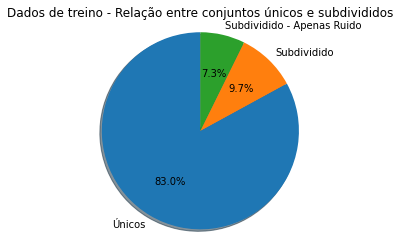

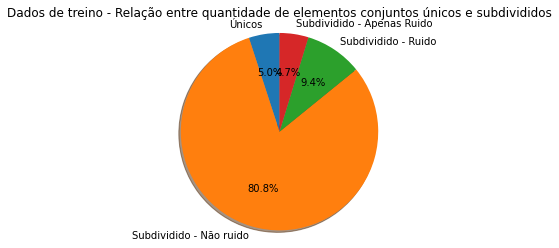

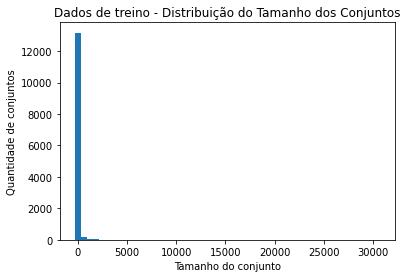

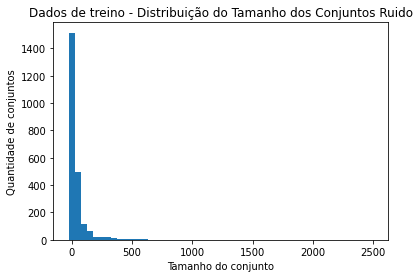

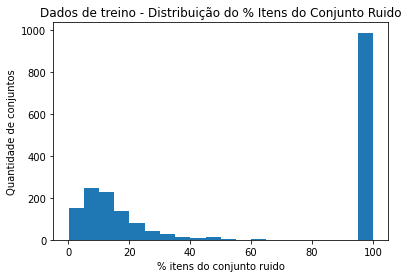

In [45]:
#dfs = [df_train, df_euclidean, df_cosine, df_chebyshev, df_manhattan, df_hdbscan]
dfs = [df_train]

# titles = ['Dados de treino', 
#           'Dados de treino + teste(Euclidiana)', 
#           'Dados de treino + teste(Cosseno)', 
#           'Dados de treino + teste(Chebyshev)', 
#           'Dados de treino + teste(Manhattan)', 
#           'Dados de treino + teste(HDBScan)']
titles = ['Dados de treino']

for df,title in zip(dfs, titles):
    qtd_single_cluster = 0
    qtd_divided_cluster = 0
    qtd_only_noise = 0
    qtd_most_divisions = 0
    
    qtd_elements_single_cluster = 0
    qtd_elements_divided_cluster = 0
    qtd_elements_only_noise = 0
    qtd_elements_most_divisions = 0
    qtd_elements_noise_most_divisions = 0
    
    dist_elements_all = []
    dist_elements_noise = []
    dist_percent_elements_noise = []
    
    for id, row in df.iterrows():
        
        dist_elements_all.append(int(row["qtd_all"]))
        
        if '_' in row["cluster"]:
            qtd_divided_cluster += 1
            qtd_elements_divided_cluster += int(row["qtd_all"])
            dist_elements_noise.append(int(row["qtd_noise"]))
            if (int(row["qtd_noise"])) > 0:
                dist_percent_elements_noise.append((int(row["qtd_noise"])/int(row["qtd_all"]))*100)

                
            if int(row["qtd_non_noise"]) == 0:
                qtd_only_noise += 1
                qtd_elements_only_noise += int(row["qtd_all"])
            else:
                qtd_most_divisions += 1
                qtd_elements_most_divisions += int(row["qtd_non_noise"])
                qtd_elements_noise_most_divisions += int(row["qtd_noise"])
            
        else:
            qtd_single_cluster += 1
            qtd_elements_single_cluster += int(row["qtd_all"])
            #dist_percent_elements_noise.append(0)
    
    labels = ['Únicos', 'Subdividido', 'Subdividido - Apenas Ruido']
    sizes = [qtd_single_cluster, qtd_most_divisions, qtd_only_noise]

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')
    plt.gca().set(title=title+' - Relação entre conjuntos únicos e subdivididos')
    plt.show()
    
    labels = ['Únicos', 'Subdividido - Não ruido','Subdividido - Ruido', 'Subdividido - Apenas Ruido']
    sizes = [qtd_elements_single_cluster, qtd_elements_most_divisions, qtd_elements_noise_most_divisions,qtd_elements_only_noise]

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')
    plt.gca().set(title=title+' - Relação entre quantidade de elementos conjuntos únicos e subdivididos')
    plt.show()

    plt.hist(x=dist_elements_all, bins=50, align='left')
    plt.gca().set(title=title+' - Distribuição do Tamanho dos Conjuntos', ylabel='Quantidade de conjuntos', xlabel='Tamanho do conjunto')
    plt.show()
    
    plt.hist(x=dist_elements_noise, bins=50, align='left')
    plt.gca().set(title=title+' - Distribuição do Tamanho dos Conjuntos Ruido', ylabel='Quantidade de conjuntos', xlabel='Tamanho do conjunto')
    plt.show()
    
    plt.hist(x=dist_percent_elements_noise, bins=20, align='mid')
    plt.gca().set(title=title+' - Distribuição do % Itens do Conjunto Ruido', ylabel='Quantidade de conjuntos', xlabel='% itens do conjunto ruido')
    plt.show()

In [42]:
train_noise_dist_data

[['globulina-1', 0, 121],
 ['citopatologico-1', 0, 3],
 ['barbantecolorido-1', 0, 1],
 ['halter-1', 0, 289],
 ['s137-1', 0, 2],
 ['ciclofemme-1', 0, 1],
 ['dolosal-1', 0, 9],
 ['aplicacao-1', 0, 16],
 ['magnesio_-1', 71, 0],
 ['cd-rw-1', 0, 30],
 ['recibo-1', 0, 101],
 ['guizo-1', 0, 2],
 ['orlipid-1', 0, 1],
 ['fenitoina_-1', 62, 708],
 ['hidroclorotiazida-1', 0, 552],
 ['bevacizumabe-1', 0, 1],
 ['oiti-1', 0, 19],
 ['barcha-1', 0, 2],
 ['truque-1', 0, 3],
 ['natrilix-1', 0, 21],
 ['relaxamento-1', 0, 1],
 ['bone-1', 0, 2349],
 ['reopro-1', 0, 1],
 ['item1325-1', 0, 2],
 ['motore-1', 0, 18],
 ['farmaceutico-1', 0, 5],
 ['tambor_-1', 51, 365],
 ['metopreno-1', 0, 2],
 ['goniometro-1', 0, 23],
 ['gol-1', 0, 326],
 ['lamina-1', 0, 4247],
 ['rituximab-1', 0, 12],
 ['bocao-1', 0, 2],
 ['germanato-1', 0, 1],
 ['luva_-1', 1728, 11197],
 ['eliquis-1', 0, 29],
 ['conjunto_-1', 102, 1141],
 ['item723-1', 0, 2],
 ['item619-1', 0, 2],
 ['desencapar-1', 0, 5],
 ['fertnon-1', 0, 1],
 ['prisineiro-1

In [ ]:
data = []
for n in train_noise_dist_data:
    data.append(n[1]/(n[2]+n[1]))

plt.hist(x=data, bins=20, align='mid')
plt.gca().set(title='Dados treino - Distribuição do % Itens do Conjunto Ruido', ylabel='Quantidade de conjuntos', xlabel='% itens do conjunto ruido')

In [11]:
train_noise_dist_data = []
all_noise_clusters = items_clusters_train[items_clusters_train['cluster'].str.contains('-1', na=False)].cluster.unique()
len_it = len(all_noise_clusters)
count = 0
for noise_cluster in all_noise_clusters:
    if count%100 ==0:
        print(count, len_it)
    count+=1
    qtd_elements_noise_cluster = items_clusters_train[items_clusters_train['cluster'] == noise_cluster].shape[0]
    non_noise_cluster = noise_cluster[0:-2]
    qtd_elements_non_noise_cluster = items_clusters_train[items_clusters_train['cluster'].str.contains(non_noise_cluster, na=False)].shape[0]
    train_noise_dist_data.append([noise_cluster, qtd_elements_noise_cluster, qtd_elements_non_noise_cluster-qtd_elements_noise_cluster])

0 1944
100 1944
200 1944
300 1944
400 1944
500 1944
600 1944
700 1944
800 1944
900 1944
1000 1944
1100 1944
1200 1944
1300 1944
1400 1944
1500 1944
1600 1944
1700 1944
1800 1944
1900 1944


In [20]:
cont_only_noise = 0
for t in train_noise_dist_data:
    if t[2] == 0:
        cont_only_noise +=1
        print(t)
cont_only_noise, len(train_noise_dist_data)

['cetim_-1', 52, 0]
['metotrexato_-1', 43, 0]
['manete_-1', 28, 0]
['araf_-1', 38, 0]
['ursacol_-1', 30, 0]
['hub_-1', 48, 0]
['fibrinolisina_-1', 35, 0]
['levobupivacaina_-1', 47, 0]
['composicao_-1', 29, 0]
['rhiner_-1', 65, 0]
['levantamento_-1', 35, 0]
['magnesio_-1', 71, 0]
['cintilografia_-1', 41, 0]
['analisador_-1', 57, 0]
['nutridrink_-1', 25, 0]
['criocauterio_-1', 65, 0]
['estufa_-1', 38, 0]
['granulado_-1', 26, 0]
['semente_-1', 26, 0]
['tirante_-1', 31, 0]
['haldol_-1', 96, 0]
['multimetro_-1', 29, 0]
['chaveiro_-1', 32, 0]
['adipometro_-1', 32, 0]
['jilo_-1', 94, 0]
['licenca_-1', 34, 0]
['tiopental_-1', 41, 0]
['tramal_-1', 25, 0]
['metileno_-1', 31, 0]
['louro_-1', 47, 0]
['fotokol_-1', 26, 0]
['latanoprosta_-1', 31, 0]
['multiuso_-1', 55, 0]
['cascalho_-1', 44, 0]
['lupa_-1', 39, 0]
['rucula_-1', 34, 0]
['protovit_-1', 35, 0]
['sorvete_-1', 76, 0]
['retro_-1', 37, 0]
['apresolina_-1', 24, 0]
['estaca_-1', 35, 0]
['neozine_-1', 45, 0]
['atrovent_-1', 44, 0]
['amilorida_

(986, 1944)

[Text(0.5, 1.0, 'Dados treino - Distribuição do Tamanho dos Conjuntos Ruido'),
 Text(0, 0.5, 'Quantidade de conjuntos'),
 Text(0.5, 0, 'Tamanho do conjunto')]

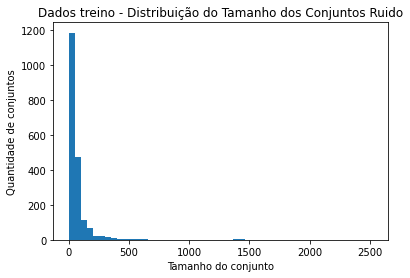

In [21]:

data = []
for n in train_noise_dist_data:
    data.append(n[1])

plt.hist(x=data, bins=50, align='mid')
plt.gca().set(title='Dados treino - Distribuição do Tamanho dos Conjuntos Ruido', ylabel='Quantidade de conjuntos', xlabel='Tamanho do conjunto')

[Text(0.5, 1.0, 'Dados teste - Distribuição da Proporção do Tamanho dos Conjuntos Ruido'),
 Text(0, 0.5, 'Distribuição'),
 Text(0.5, 0, 'Proporção do Tamanho dos conjuntos')]

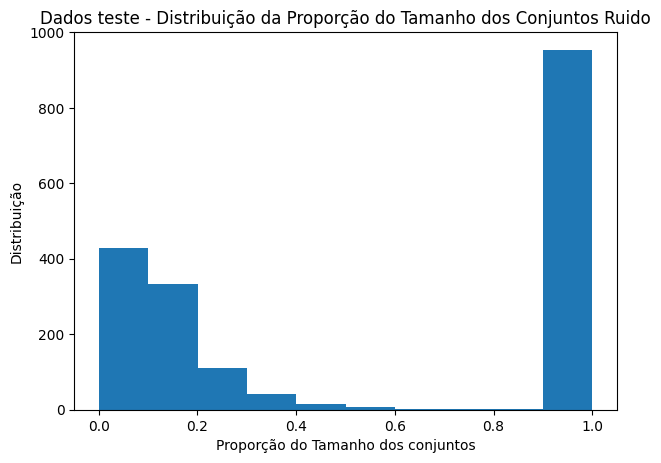

In [50]:
data = []
for n in test_noise_dist_data:
    data.append(n[1]/(n[2]+n[1]))

plt.hist(x=data, bins=10, align='mid')
plt.gca().set(title='Dados treino + teste(HDBSCAN) - Distribuição do % Itens do Conjunto Ruido', ylabel='Quantidade de conjuntos', xlabel='% itens do conjunto ruido')

In [14]:
# ['isoflurano_-1', 32, 0]
# ['glicerol_-1', 46, 0]
# ['gase_-1', 52, 0]
# ['coleta_-1', 87, 0]
# ['monitoramento_-1', 30, 0]
# ['esg_-1', 28, 0]
# ['virabrequim_-1', 52, 0]
# ['arrebite_-1', 56, 0]
# ['elevador_-1', 28, 0]
# ['periodo.o_-1', 23, 0]
# ['vancomicina_-1', 42, 0]
# ['roto_-1', 39, 0]
# ['fragmentador_-1', 60, 0]
# ['succinilcolina_-1', 44, 0]
# ['limitao_-1', 51, 0]
# ['candido_-1', 20, 0]
# ['grosso_-1', 45, 0]
# ['soja_-1', 42, 0]
# ['salsa_-1', 39, 0]
# ['goiaba_-1', 63, 0]
# ['goiabada_-1', 65, 0]

items_clusters_train[items_clusters_train['cluster'].str.contains('papel_')].head(20)

,item_id,seq_dim_licitacao,outlier,cluster,dsc_unidade_medida,description,price
874991,40033,1037334,1,vancomicina_-1,un,vancomicina frasco ampola 10 ml,4.50
874992,141235,1053157,1,vancomicina_-1,fr,vancomicina cloridrato 500 mg injetavel,7.00
874993,147128,1054633,1,vancomicina_-1,ampola,vancomicina cloridrato 500 mg frasco ampola,6.18
874994,148814,1054956,1,vancomicina_-1,ampola,vancomicina cloridrato 500 mg frasco ampola,5.25
874995,151557,1055450,1,vancomicina_-1,ampola,vancomicina cloridrato 500 mg frasco ampola,4.05
874996,163800,1059072,1,vancomicina_-1,frasco,vancomicina 500 mg,4.23
874997,176058,1058722,1,vancomicina_-1,frasco,vancomicina 500 mg,6.40
874998,178472,1058819,1,vancomicina_-1,frasco,vancomicina cloridrato 500 mg,6.65
874999,266442,1072460,1,vancomicina_-1,fr,vancomicina cloridrato 500 mg,6.35
875000,267960,1072623,1,vancomicina_-1,fr,vancomicina cloridrato 500 mg,6.39


[Text(0.5, 1.0, 'Dados treino - Distribuição do Tamanho dos Conjuntos Ruido'),
 Text(0, 0.5, 'Quantidade de conjuntos'),
 Text(0.5, 0, 'Tamanho do conjunto')]

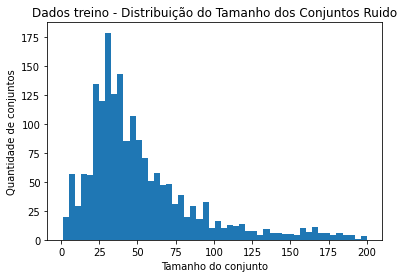

In [22]:
data = []
for n in train_noise_dist_data:
    if n[1] <= 200:
        data.append(n[1])

plt.hist(x=data, bins=50, align='mid')
plt.gca().set(title='Dados treino - Distribuição do Tamanho dos Conjuntos Ruido', ylabel='Quantidade de conjuntos', xlabel='Tamanho do conjunto')

[Text(0.5, 1.0, 'Dados treino - Distribuição do % Itens do Conjunto Ruido'),
 Text(0, 0.5, 'Quantidade de conjuntos'),
 Text(0.5, 0, '% itens do conjunto ruido')]

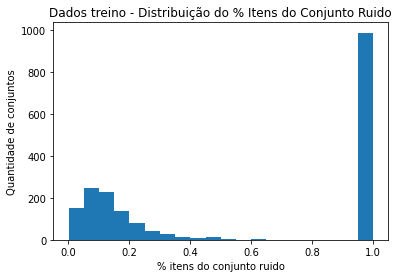

In [31]:
data = []
for n in train_noise_dist_data:
    data.append(n[1]/(n[2]+n[1]))

plt.hist(x=data, bins=20, align='mid')
plt.gca().set(title='Dados treino - Distribuição do % Itens do Conjunto Ruido', ylabel='Quantidade de conjuntos', xlabel='% itens do conjunto ruido')

In [28]:
test_noise_dist_data = []
all_noise_clusters = items_clusters_train[items_clusters_train['cluster'].str.contains('-1', na=False)].cluster.unique()
len_it = len(all_noise_clusters)
count = 0
for noise_cluster in all_noise_clusters:
    if count%100 ==0:
        print(count, len_it)
    count+=1
    non_noise_cluster = noise_cluster[0:-2]
    
    qtd_elements_noise_cluster_test = items_clusters_test[items_clusters_test['cluster'] == noise_cluster].shape[0]
    qtd_elements_cluster_test = items_clusters_test[items_clusters_test['cluster'].str.contains(non_noise_cluster, na=False)].shape[0]
    
    qtd_elements_noise_cluster_train = items_clusters_train[items_clusters_train['cluster'] == noise_cluster].shape[0]
    qtd_elements_cluster_train = items_clusters_train[items_clusters_train['cluster'].str.contains(non_noise_cluster, na=False)].shape[0]

    qtd_elements_noise_cluster = qtd_elements_noise_cluster_test + qtd_elements_noise_cluster_train
    qtd_elements_non_noise_cluster = (qtd_elements_cluster_train+qtd_elements_cluster_test)-qtd_elements_noise_cluster
    
    test_noise_dist_data.append([noise_cluster, qtd_elements_noise_cluster, qtd_elements_non_noise_cluster])

0 1944
100 1944
200 1944
300 1944
400 1944
500 1944
600 1944


KeyboardInterrupt: 

[Text(0.5, 1.0, 'Dados teste - Distribuição do Tamanho dos Conjuntos Ruido'),
 Text(0, 0.5, 'Distribuição'),
 Text(0.5, 0, 'Tamanho dos conjuntos')]

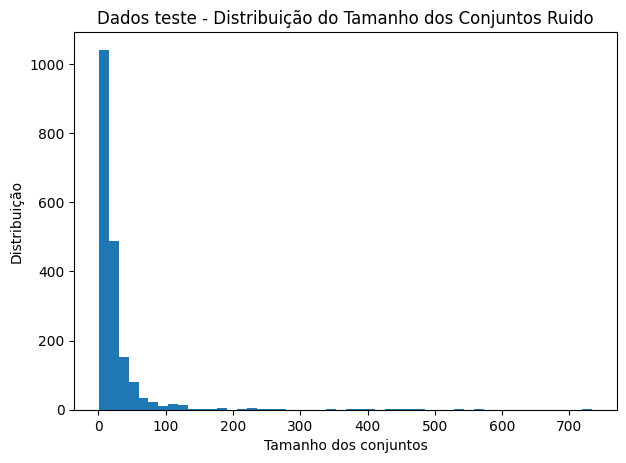

In [47]:
data = []
for n in test_noise_dist_data:
    data.append(n[1])

plt.hist(x=data, bins=50, align='mid')
plt.gca().set(title='Dados treino + teste(HDBSCAN) - Distribuição do Tamanho dos Conjuntos Ruido', ylabel='Quantidade de conjuntos', xlabel='Tamanho do conjunto')

[Text(0.5, 1.0, 'Dados teste - Distribuição do Tamanho dos Conjuntos Ruido'),
 Text(0, 0.5, 'Distribuição'),
 Text(0.5, 0, 'Tamanho dos conjuntos')]

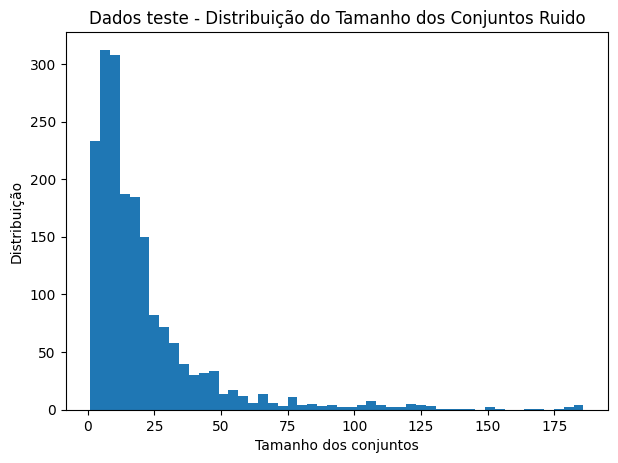

In [48]:
data = []
for n in test_noise_dist_data:
    if n[1] <= 200:
        data.append(n[1])

plt.hist(x=data, bins=50, align='mid')
plt.gca().set(title='Dados treino + teste(HDBSCAN) - Distribuição do Tamanho dos Conjuntos Ruido', ylabel='Quantidade de conjuntos', xlabel='Tamanho do conjunto')

euclidean 0 1693


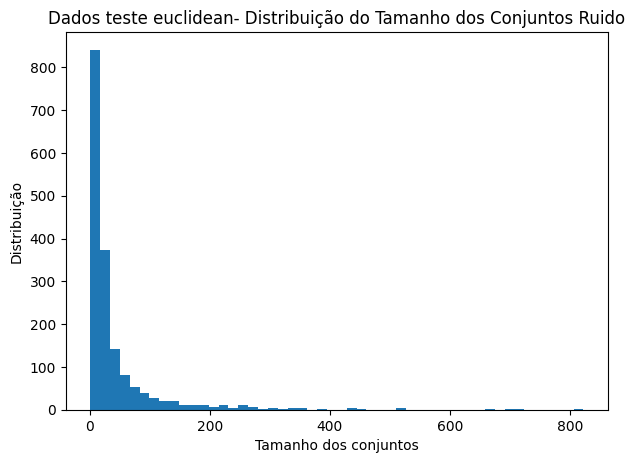

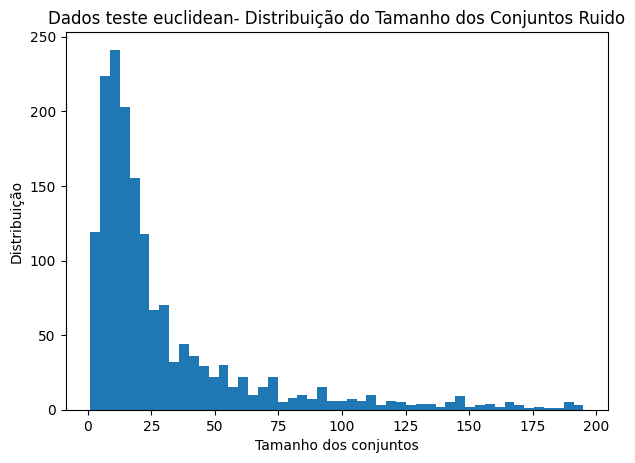

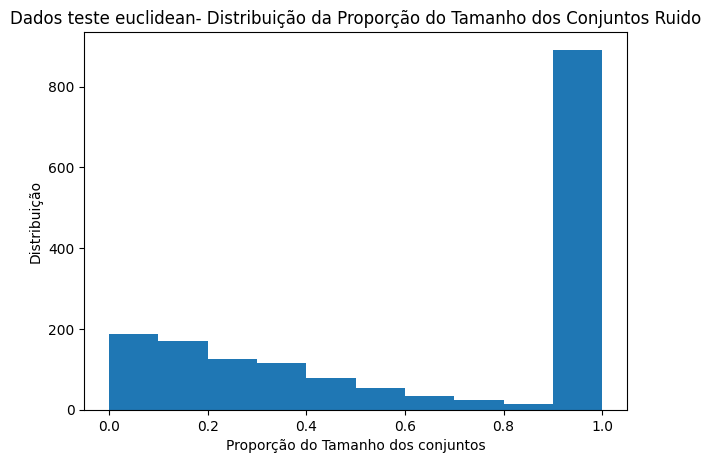

cosine 0 1704


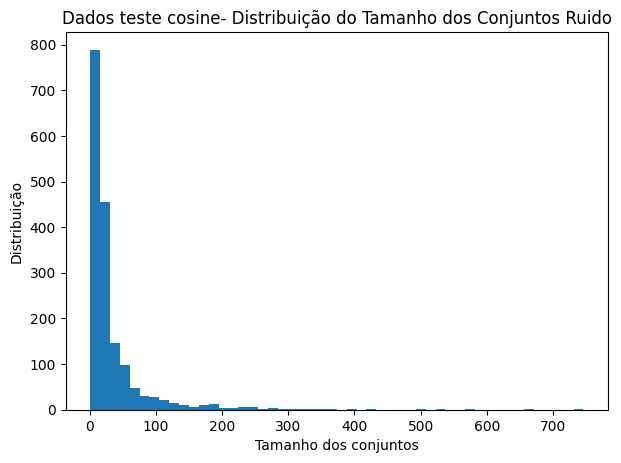

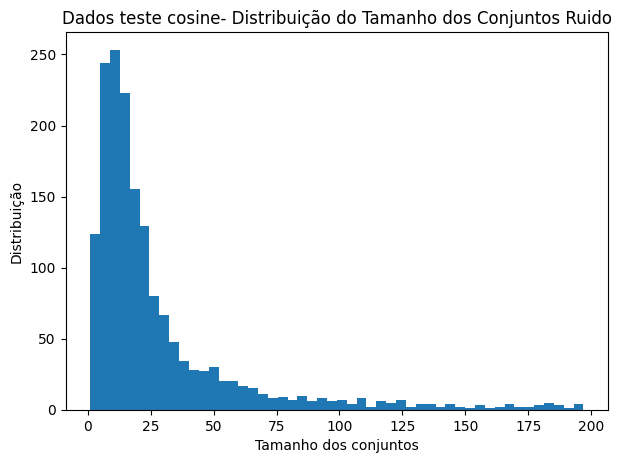

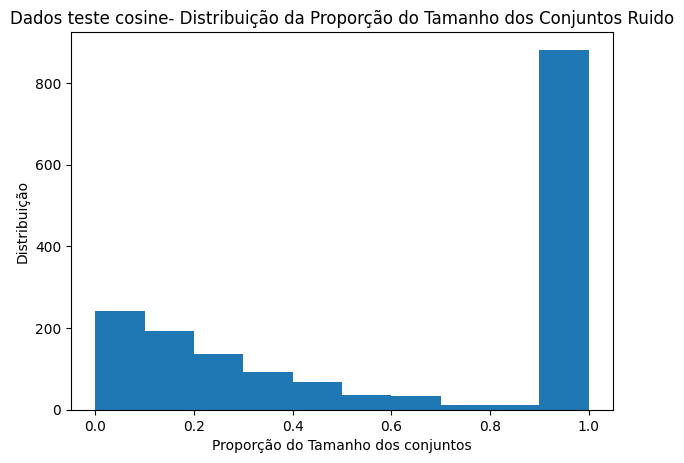

chebyshev 0 1736


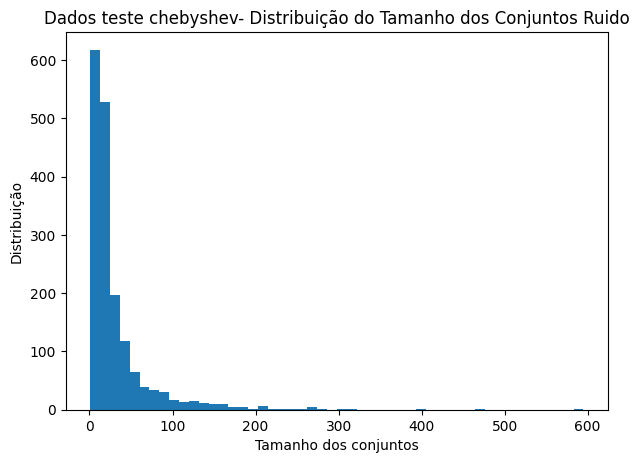

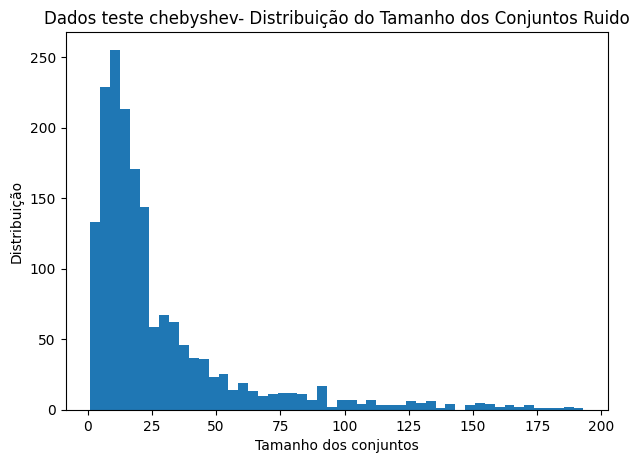

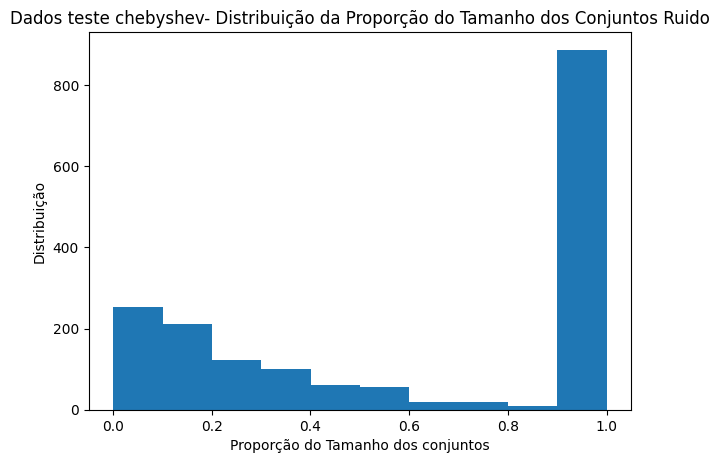

manhattan 0 1698


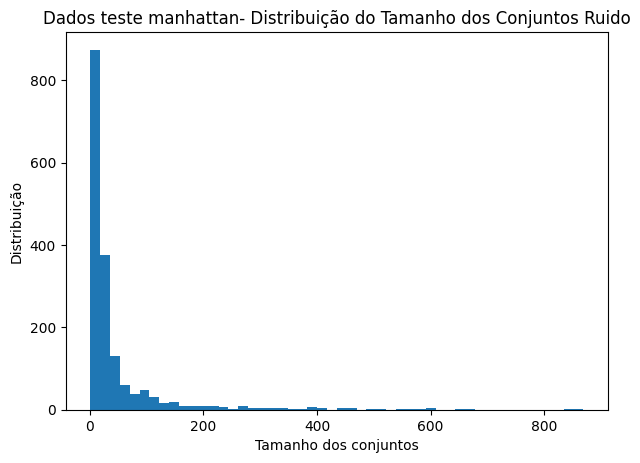

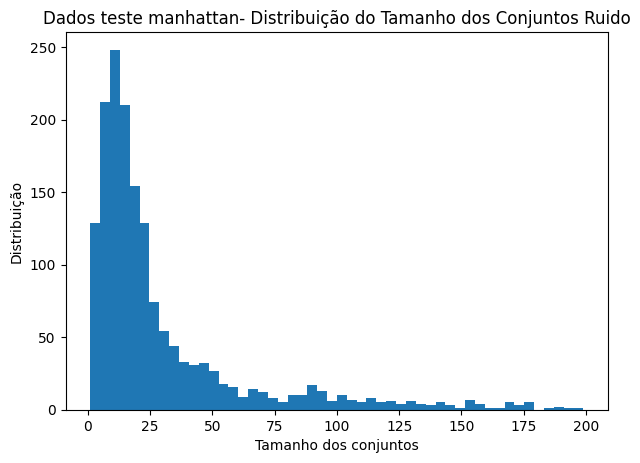

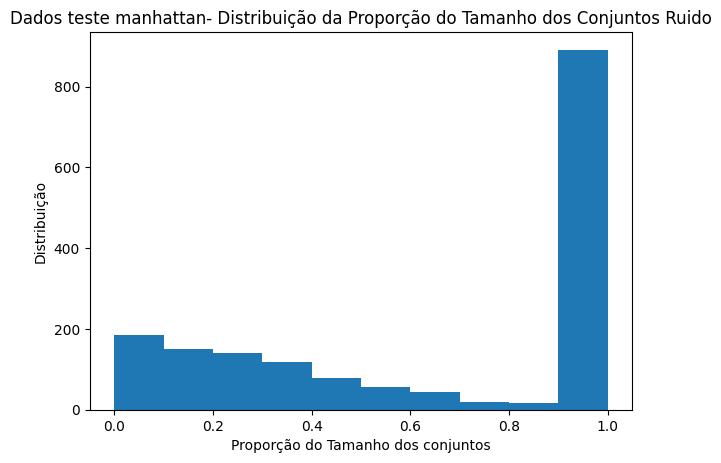

In [74]:
all_noise_clusters = items_clusters_train[items_clusters_train['cluster'].str.contains('-1', na=False)].cluster.unique()
for distance in distances:
    df = pd.DataFrame(data=np.array(dist_item_test_cluster[distance]), columns=["item_id", "cluster", "distance"])
    data_qtd_elements_noise_cluster = []
    data_qtd_all_elements_cluster = []
    data_qtd_elements_min_noise_cluster = []
    all_noise_clusters = df[df['cluster'].str.contains('-1', na=False)].cluster.unique()
    len_it = len(all_noise_clusters)
    count = 0
    for noise_cluster in all_noise_clusters:
        if count%10000 ==0:
            print(distance, count, len_it)
        count+=1
        qtd_elements_noise_cluster = df[df['cluster'] == noise_cluster].shape[0]
        non_noise_cluster = noise_cluster[0:-2]
        qtd_elements_non_noise_cluster = df[df['cluster'].str.contains(non_noise_cluster, na=False)].shape[0]

        data_qtd_elements_noise_cluster.append(qtd_elements_noise_cluster)
        if qtd_elements_noise_cluster <= 200:
            data_qtd_elements_min_noise_cluster.append(qtd_elements_noise_cluster)
        data_qtd_all_elements_cluster.append(qtd_elements_non_noise_cluster)
    
    plt.hist(x=data_qtd_elements_noise_cluster, bins=50, align='mid')
    plt.gca().set(title='Dados treino + teste('+distance+') - Distribuição do Tamanho dos Conjuntos Ruido', ylabel='Quantidade de conjuntos', xlabel='Tamanho do conjunto')
    plt.show()
    
    plt.hist(x=data_qtd_elements_min_noise_cluster, bins=50, align='mid')
    plt.gca().set(title='Dados treino + teste('+distance+') - Distribuição do Tamanho dos Conjuntos Ruido', ylabel='Quantidade de conjuntos', xlabel='Tamanho do conjunto')
    plt.show()
    
    plt.hist(x=np.asarray(data_qtd_elements_noise_cluster)/np.asarray(data_qtd_all_elements_cluster), bins=10, align='mid')
    plt.gca().set(title='Dados treino + teste('+distance+') - Distribuição do % Itens do Conjunto Ruido', ylabel='Quantidade de conjuntos', xlabel='% itens do conjunto ruido')
    plt.show()


In [13]:
item_list.items_df

,palavras,unidades_medida,numeros,cores,materiais,tamanho,quantidade,preco,dsc_unidade_medida,original,licitacao,original_prep,funcao,ano,item_id
0,"['projetor', 'multimidia', 'datashow', 'dever'...",[],[],[],[],[],[],2850.00,und,PROJETOR MULTIMÍDIA (DATASHOW) DEVE ESTAR EM L...,1031336,"['projetor', 'multimidia', 'datashow', 'dever'...",Saúde,2018,795754
1,"['ventilador', 'parede', 'composicao', 'pa']",['volt'],"['3', '110']",[],[],[],[],200.00,und,VENTILADOR DE PAREDE COMPOSIÇÃO 03 PÁS TIPO PA...,1031336,"['ventilador', 'parede', 'composicao', '3', 'p...",Saúde,2018,795783
2,"['impressor', 'laser', 'comum', 'especificacao...",[],[],[],[],[],[],2111.91,und,IMPRESSORA LASER (COMUM) ESPECIFICAÇÃO MÍNIMA:...,1031336,"['impressor', 'laser', 'comum', 'especificacao...",Saúde,2018,795784
3,"['tela', 'projecao', 'dever', 'estar', 'linha'...",[],[],[],[],[],[],800.00,und,TELA DE PROJEÇÃO. DEVE ESTAR EM LINHA DE PRODU...,1031336,"['tela', 'projecao', 'dever', 'estar', 'linha'...",Saúde,2018,795785
4,"['computador', 'portatil', 'notebook', 'especi...",[],[],[],[],[],[],3450.00,und,COMPUTADOR PORTÁTIL (NOTEBOOK) ESPECIFICAÇÃO M...,1031336,"['computador', 'portatil', 'notebook', 'especi...",Saúde,2018,795801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302949,"['cafe', 'manha', 'almoco']",[],[],[],[],[],[],13.00,un,CAFÉ DA MANHÃ E ALMOÇO,1031237,"['cafe', 'manha', 'almoco']",Saúde,2016,793040
302950,"['linha', 'charrete', 'vereda', 'cumprir', 've...",[],['21'],[],[],[],[],50.90,un,Linha 21 (CHARRETE) Vereda cumprida (vespertino),1031252,"['linha', '21', 'charrete', 'vereda', 'cumprir...",Saúde,2016,793361
302951,"['linha', 'charrete', 'riachinho', 'vespertino']",[],['20'],[],[],[],[],50.90,un,Linha 20 (CHARRETE) ? Riachinho (Vespertino),1031252,"['linha', '20', 'charrete', 'riachinho', 'vesp...",Saúde,2016,793362
302952,"['linha', 'trecho', 'carro', 'van', 'com', 'mi...",[],"['28', '2', '15']",[],[],[],[],3.50,un,LINHA 28 Trecho 2 / Carro 02 - (VAN COM NO MÍN...,1031252,"['linha', '28', 'trecho', '2', 'carro', 'van',...",Saúde,2016,793363


In [19]:
len_items=item_list.items_df.shape[0]
count_no_palavras = 0
max_len = 0
for item_id, row in item_list.items_df.iterrows():
    palavras = ast.literal_eval(row['palavras'])
    if len(palavras) ==0:
        count_no_palavras+=1
        if len(row.original) > max_len:
            max_len=len(row.original)
            print(row.original)

SERINGA 1 ML
PARAMONOCLOROFENOLCANFORADO 20ML
PLÁSTICO TRANSPARENTE 25X45 METROS
ELASTICO AMARELO nº 18, pct. c/ 50 unid
DESVENLAFAXINASUCCINATO 50 MG COMPRIMIMIDO.(100000000027930)
0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000410027 SERINGA DE 2,5ML


In [16]:
count_no_palavras,len_items

(895, 302954)

In [29]:
df = item_list.items_df[item_list.items_df['original'].isin([ 'ELASTICO DE LATEX: Elastico de latex, amarelo, n 18. Embalagem de 1Kg.','SERINGA 1 ML','PLÁSTICO TRANSPARENTE 25X45 METROS'])]
df[['original', 'palavras','numeros','cores','materiais','tamanho','quantidade']].head()
#df.head()

,original,palavras,numeros,cores,materiais,tamanho,quantidade
142,SERINGA 1 ML,[],['1'],[],[],[],['seringa']
38134,PLÁSTICO TRANSPARENTE 25X45 METROS,[],"['25', '45']",['transparente'],['plastico'],[],[]
91693,SERINGA 1 ML,[],['1'],[],[],[],['seringa']
114446,"ELASTICO DE LATEX: Elastico de latex, amarelo,...",[],"['18', '1']",['amarelo'],"['elastico', 'latex']",[],['embalagem']
159795,SERINGA 1 ML,[],['1'],[],[],[],['seringa']


In [8]:
for k in clusters_vectors.keys():
    if '-1' in k:
        print(k, clusters_vectors[k])

naloxona_-1 [7.172611236572266, 14.559084305396446, 10.047999455378605, 6.7944141534658575, 10.136155641995943, 0.20392510753411514, -0.46162753380261934, -1.3706537943619947, 11.59822706075815, 1.3809351004087007, 9.144487894498385, -0.6510547147347376, 4.494394339047945, 3.3230159282684326, 8.325083805964542]
aro_-1 [2.374047283615385, 9.549578598567418, 4.660391637257168, 4.841330494199481, 1.099401742219925, 4.9436405556542535, 5.773154888834272, 3.6177710124424527, 5.560386572565351, 10.192198242459979, 8.687463743346077, 0.27444565509046825, 8.249901107379369, 4.182433196476528, 4.2210663216454645]
ige_-1 [-7.755250040690104, 7.562771638234456, 9.025476264953614, 8.306857872009278, 6.068243344624837, 4.944770240783692, 6.079778385162354, 10.656359672546387, 0.4886951764424642, 5.34684689839681, 4.073228772481283, 2.2727482159932455, 5.9162522315979, -0.1766239657998085, 9.663977368672688]
lixa_-1 [5.527956315449306, 3.9537641065461293, 2.542600999821673, 5.274998326222975, 5.4543

papa_-1 [6.835432211386746, 10.06105180855455, 8.314247739726099, 6.920094336928992, 4.108597991281543, 6.964780314215298, 7.360227609502858, 2.4256818834029876, 4.413862146180252, 3.1168702799698402, 4.04158601678651, 3.1059941053390503, 1.459823047999164, 5.509338050053038, 11.144966931178653]
tratado_-1 [12.618368975321452, 0.9020251472791035, 5.503565311431885, 12.425497754414875, 5.982736365000407, 4.062133010228475, 4.974667485555013, 7.296276124318441, -2.7912229537963866, 6.672782643636068, 3.2671385447184247, 6.330433781941732, 2.8249903202056883, 2.3339451948801675, 7.351161034901937]
sem_-1 [5.341596603393555, 11.589574132646833, 9.176918983459473, 10.60352121080671, 5.529002257755825, 6.131253038133893, 12.490959576198033, 7.919032573699951, 10.619705336434501, 9.361257008143834, 7.025404930114746, 13.747220311846052, -2.144558702196394, 9.502293314252581, 13.837255341666085]
flexivel_-1 [8.559365584633568, 3.344090782512318, 2.941415856101296, 4.699294727498835, 5.33065756

In [ ]:
clusters_vectors